# ***Network intrusion detection with Genetically Optimized Ensemble Model***

Rapid advancements in the internet and communication areas have resulted in a massive expansion of network size and data. As a result, many new attacks are being developed, making it difficult for network security to detect breaches effectively. Furthermore, intruders with the intent of launching various assaults within the network cannot be overlooked. An intrusion detection system (IDS) is a tool that inspects network traffic to assure its confidentiality, integrity, and availability and thereby protects the network from possible invasions. Despite the researchers' best efforts, IDS continues to encounter difficulties in boosting detection accuracy while lowering false alarm rates and detecting fresh intrusions.
Machine learning (ML) based IDS systems have recently been implemented as viable solutions for quickly detecting intrusions across the network. In this study, we use a combination data analysis technique with four Robust genetic ensemble learning algorithms, including the Voting Classifier, Bagging Classifier, Gradient Boosting Classifier, and Random Forest based Bagging algorithm, as well as our own proposed genetic Robust genetic ensemble classifier. For each algorithm, a model is created and tested using a Network Dataset. To assess the performance of both algorithms in terms of their ability to anticipate the anomaly occurrence, we used graphs and performance rates to evaluate their outcomes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/NetworkTrafficData/Dataset/Train_data.csv")
test = pd.read_csv("/content/drive/MyDrive/NetworkTrafficData/Dataset/Test_data.csv")

In [ ]:
train.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    class  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  anomaly  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [ ]:
test.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   
4               0       0    0  ...              29                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate  
0                      1.00  
1                      1.00  
2                      0.00  
3                      0.00  
4                      0.71  

[5 rows x 41 columns]

In [ ]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0             

In [ ]:
train.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    class  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  anomaly  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [ ]:
print(test.head(4))

print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp   private  REJ          0          0     0   
1         0           tcp   private  REJ          0          0     0   
2         2           tcp  ftp_data   SF      12983          0     0   
3         0          icmp     eco_i   SF         20          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00  

# EXPLORATORY ANALYSIS

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
# Descriptive statistics
train.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.488811   
min        0.00000      0.000000           0.000000      0.000000   
25%        0.00000      0.000000           0.000000      0.000000   
50%        0.00000      0.000000           0.000000      0.000000   
75%        0.00000      0.000000           0.000000      1.000000   
max        1.00000     77.000000           4.000000      1.000000   

       num_compromised  ...  dst_host_count  dst_host_srv_count  \
count     25192.000000  ...    25192.000000        25192.000000   
mean          0.227850  ...      182.532074          115.063036   
std          10.417352  ...       98.993895          110.646850   
min           0.000000  ...        0.000000            0.000000   
25%           0.000000  ...       84.000000           10.000000   
50%           0.000000  ...      255.000000           61.000000   
75%           0.000000  ...      255.000000          255.000000   
max         884.000000  ...      255.000000          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count            25192.000000            25192.000000   
mean                 0.519791                0.082539   
std                  0.448944                0.187191   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.030000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                 25192.000000                 25192.000000   
mean                      0.147453                     0.031844   
std                       0.308367                     0.110575   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count          25192.000000              25192.000000          25192.000000   
mean               0.285800                  0.279846              0.117800   
std                0.445316                  0.446075              0.305869   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count              25192.000000  
mean                   0.118769  
std                    0.317333  
min                    0.000000  
25%                    0.000000  
50%                  

In [ ]:
a=train.describe()
a.to_csv('/content/drive/MyDrive/NetworkTrafficData/Results/description.csv')

In [ ]:
b=np.transpose(a)

In [ ]:
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [ ]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

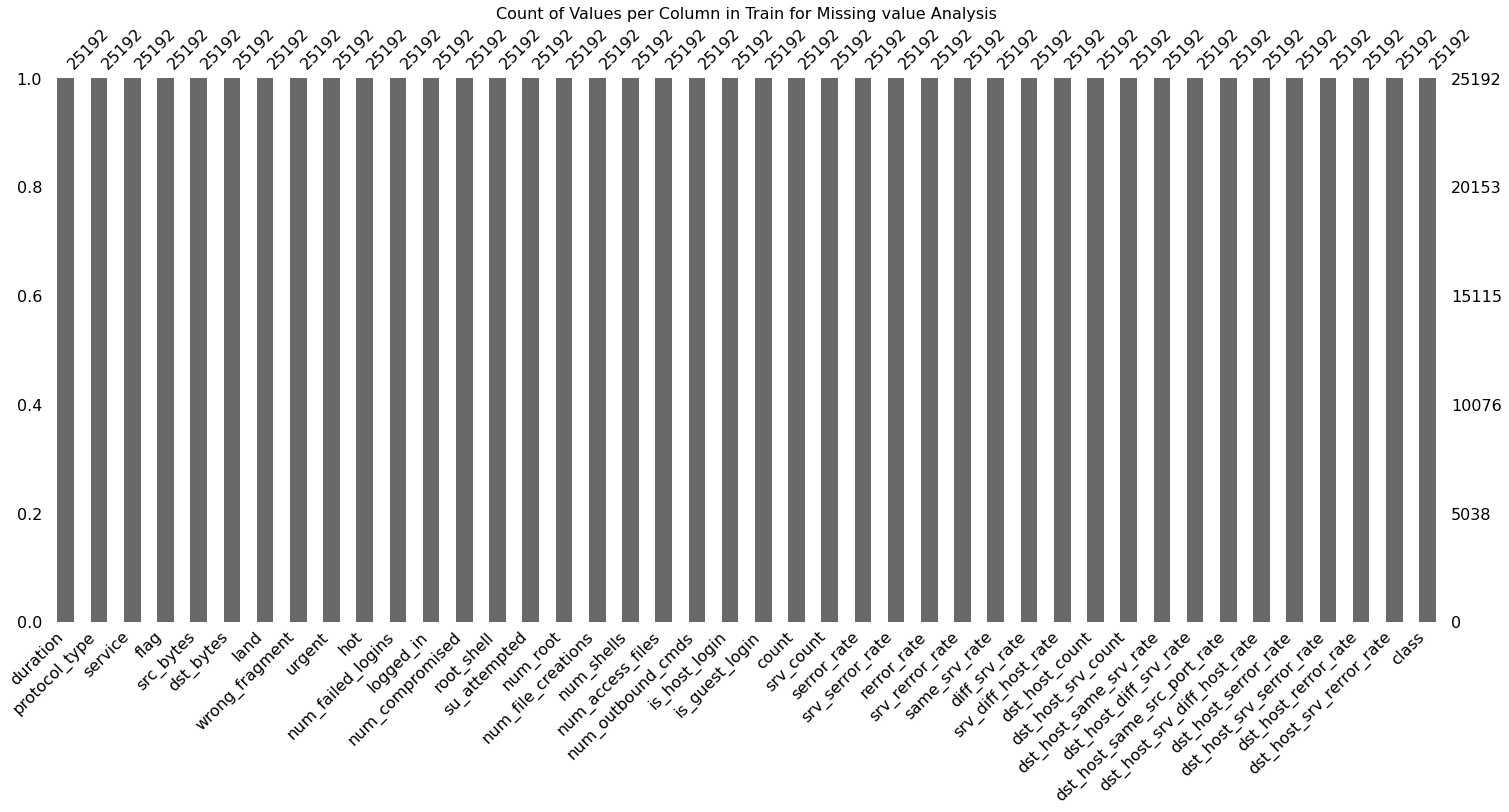

In [ ]:
import missingno as msno
msno.bar(train) # you can see pandas-profilin count part
plt.title('Count of Values per Column in Train for Missing value Analysis', size=16)
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Missing Value Graph/trainnagraph.png')
plt.show()

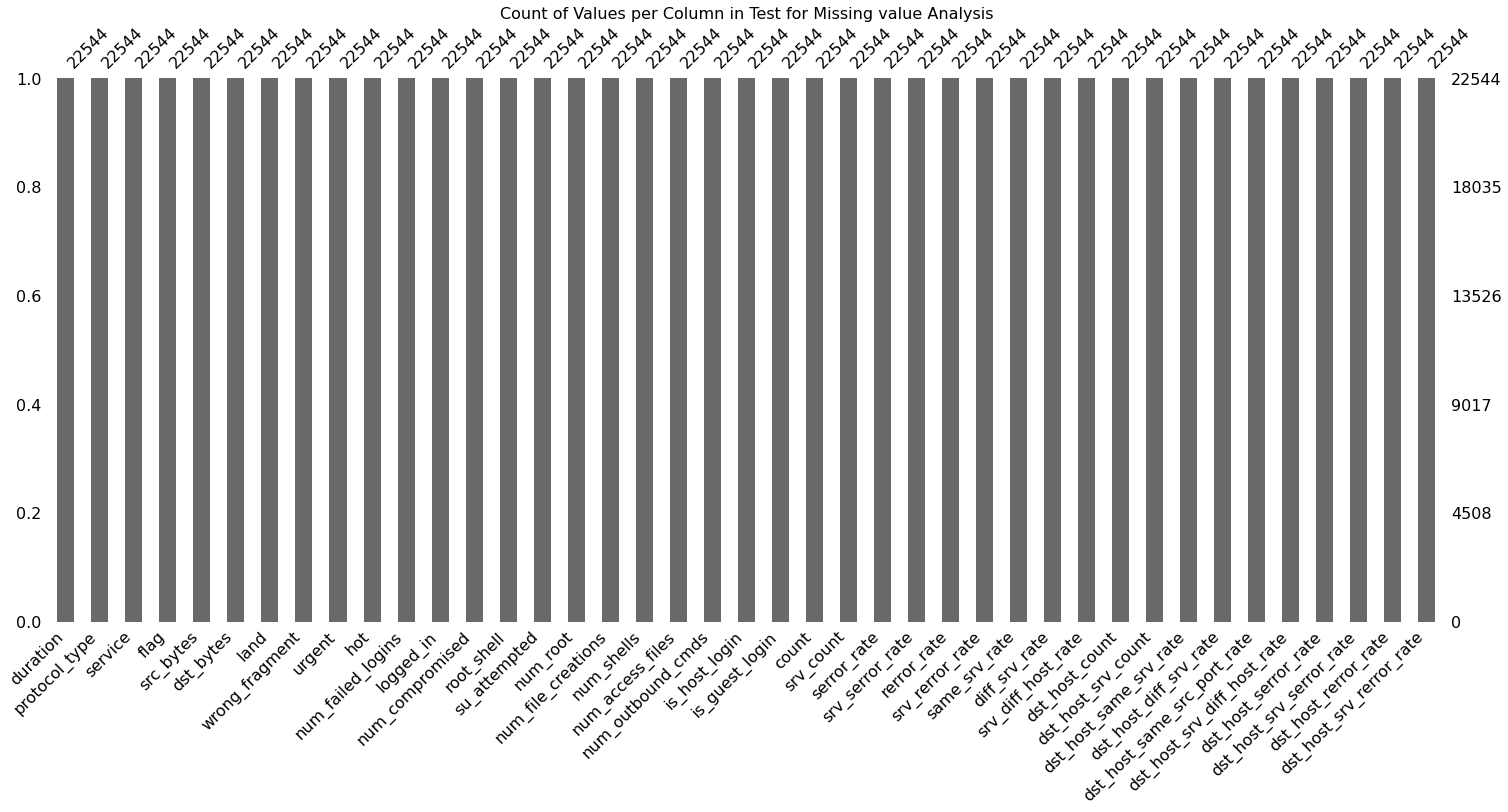

In [ ]:
msno.bar(test) # you can see pandas-profilin count part
plt.title('Count of Values per Column in Test for Missing value Analysis', size=16)
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Missing Value Graph/testnagraph.png')
plt.show()

In [ ]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
a.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
# Attack Class Distribution
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

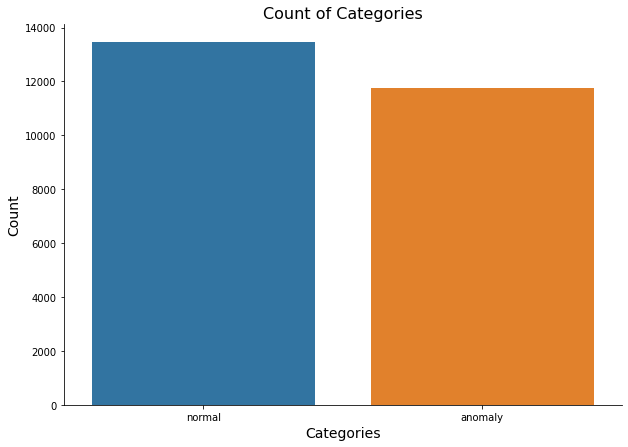

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Count of Categories', size=16)
sns.countplot(train['class'])
plt.ylabel('Count', size=14)
plt.xlabel('Categories', size=14)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Bar plots of Qualitative Features/CountofCategoriesgraph.png')
plt.show()

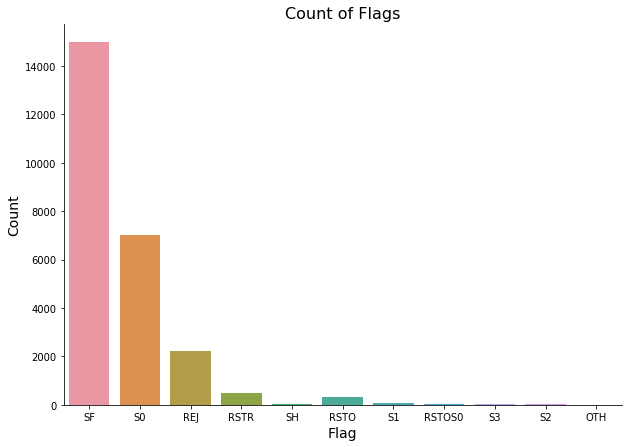

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Count of Flags', size=16)
sns.countplot(train['flag'])
plt.ylabel('Count', size=14)
plt.xlabel('Flag', size=14)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Bar plots of Qualitative Features/CountofFlagsgraph.png')
plt.show()

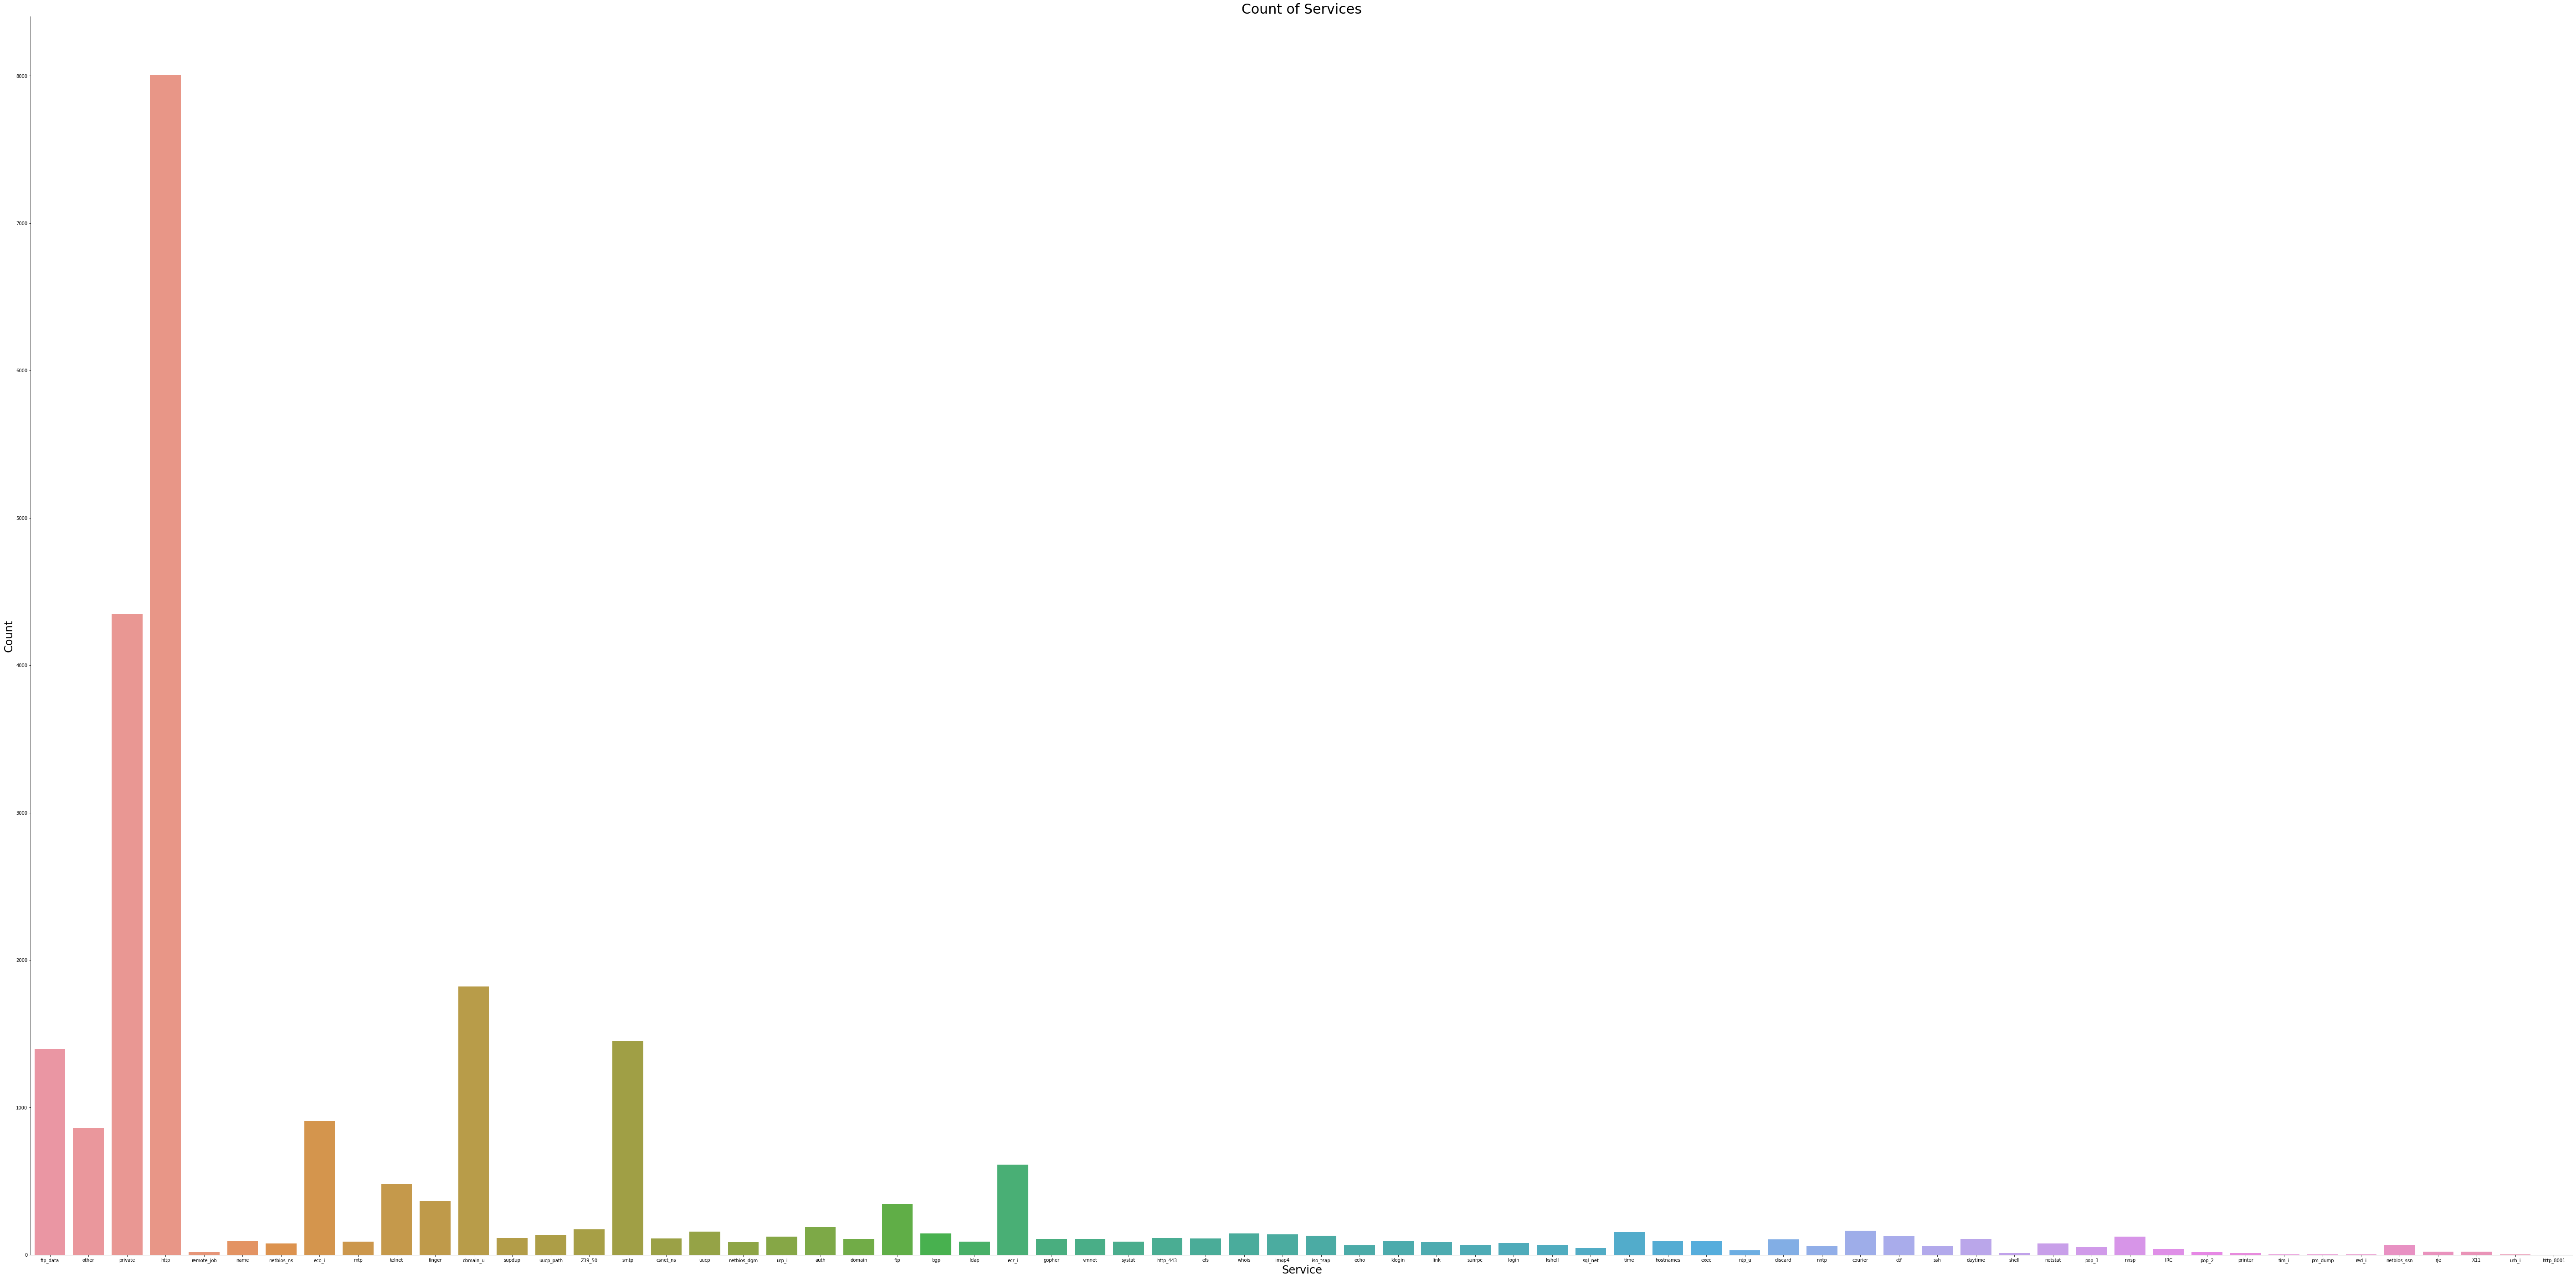

In [ ]:
plt.figure(figsize=(100, 50))
plt.title('Count of Services', size=30)
sns.countplot(train['service'])
plt.ylabel('Count', size=24)
plt.xlabel('Service', size=24)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Bar plots of Qualitative Features/CountofServicesgraph.png')
plt.show()

In [ ]:
columnnames=list(train.columns)
print(columnnames)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']


<Figure size 1584x1584 with 0 Axes>

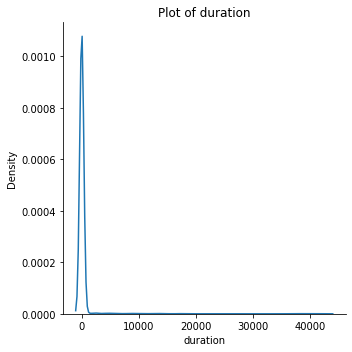

<Figure size 1584x1584 with 0 Axes>

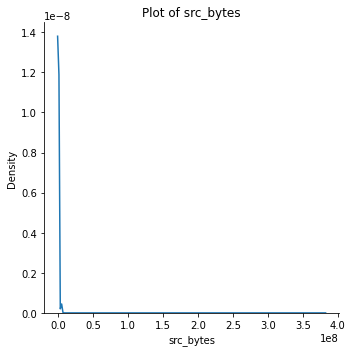

<Figure size 1584x1584 with 0 Axes>

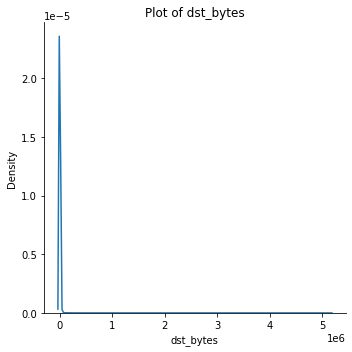

<Figure size 1584x1584 with 0 Axes>

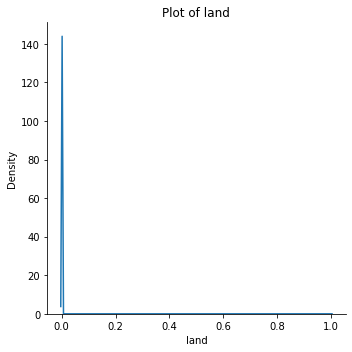

<Figure size 1584x1584 with 0 Axes>

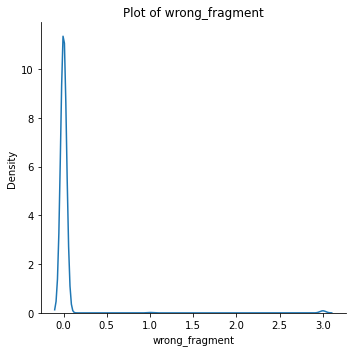

<Figure size 1584x1584 with 0 Axes>

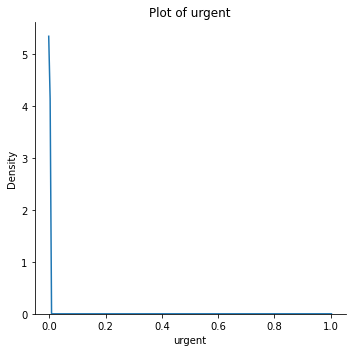

<Figure size 1584x1584 with 0 Axes>

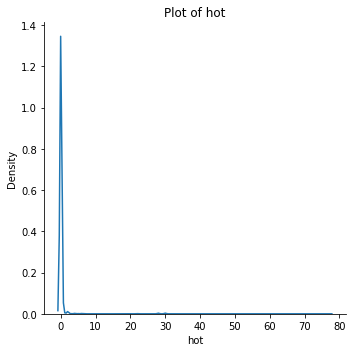

<Figure size 1584x1584 with 0 Axes>

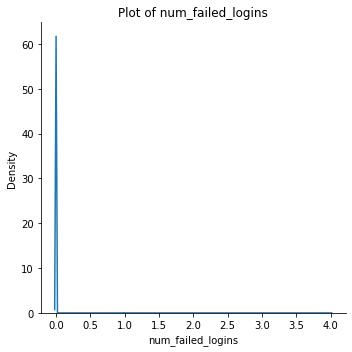

<Figure size 1584x1584 with 0 Axes>

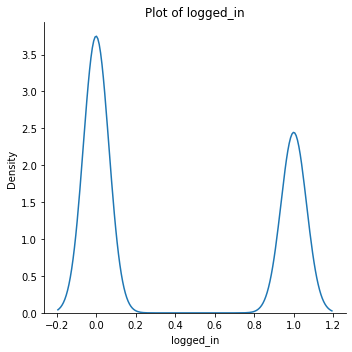

<Figure size 1584x1584 with 0 Axes>

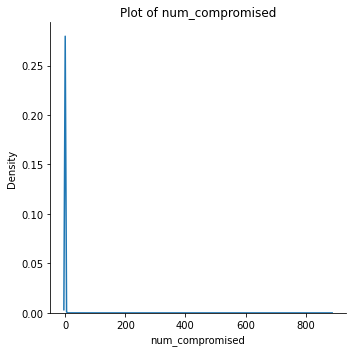

<Figure size 1584x1584 with 0 Axes>

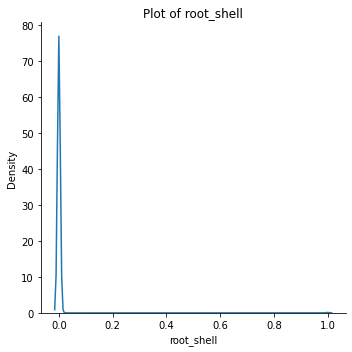

<Figure size 1584x1584 with 0 Axes>

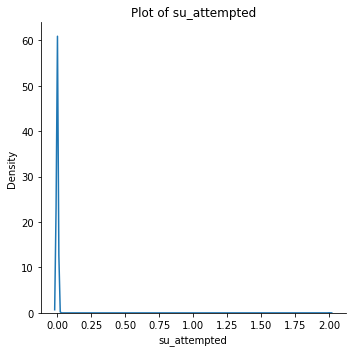

<Figure size 1584x1584 with 0 Axes>

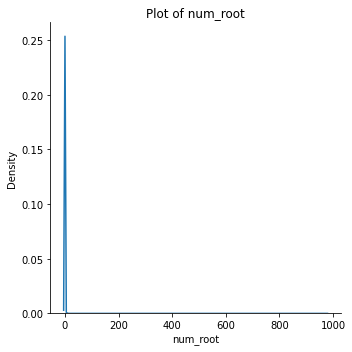

<Figure size 1584x1584 with 0 Axes>

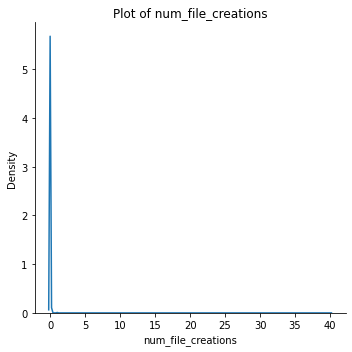

<Figure size 1584x1584 with 0 Axes>

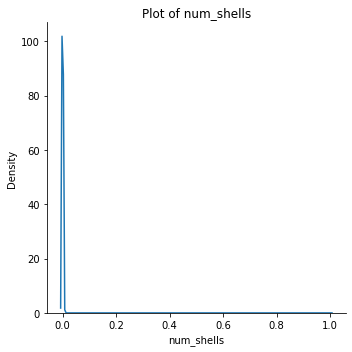

<Figure size 1584x1584 with 0 Axes>

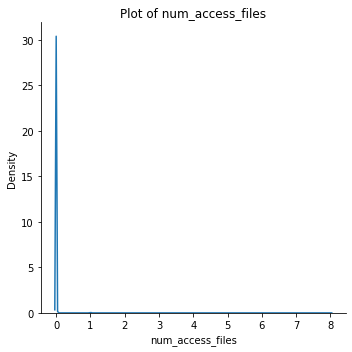

<Figure size 1584x1584 with 0 Axes>

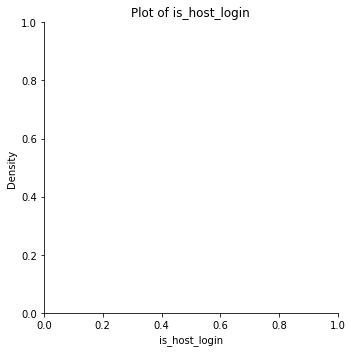

<Figure size 1584x1584 with 0 Axes>

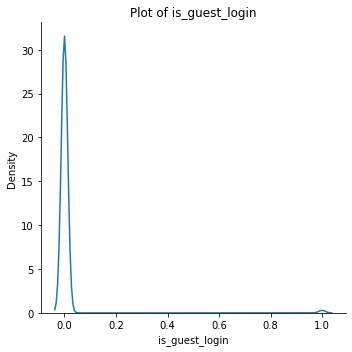

<Figure size 1584x1584 with 0 Axes>

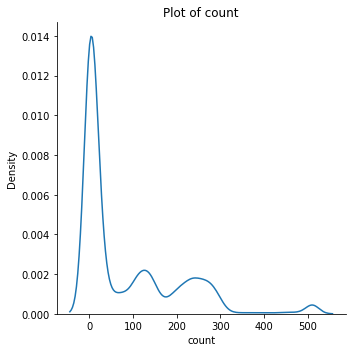

<Figure size 1584x1584 with 0 Axes>

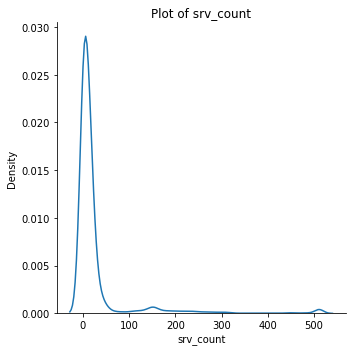

<Figure size 1584x1584 with 0 Axes>

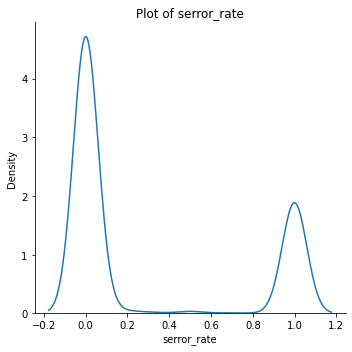

<Figure size 1584x1584 with 0 Axes>

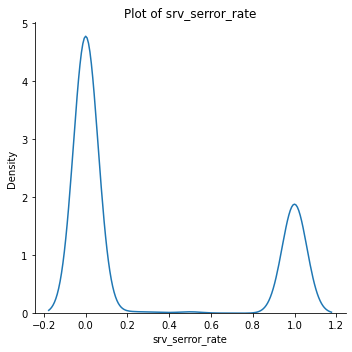

<Figure size 1584x1584 with 0 Axes>

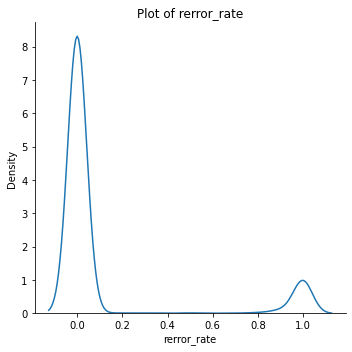

<Figure size 1584x1584 with 0 Axes>

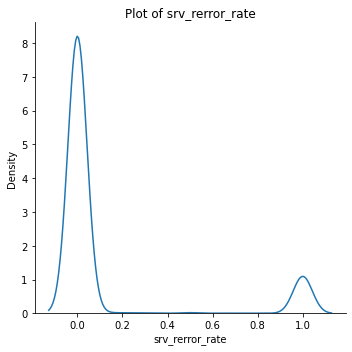

<Figure size 1584x1584 with 0 Axes>

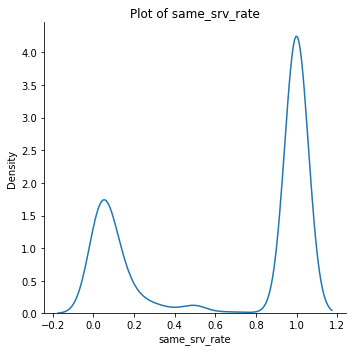

<Figure size 1584x1584 with 0 Axes>

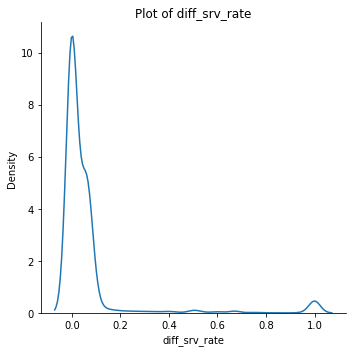

<Figure size 1584x1584 with 0 Axes>

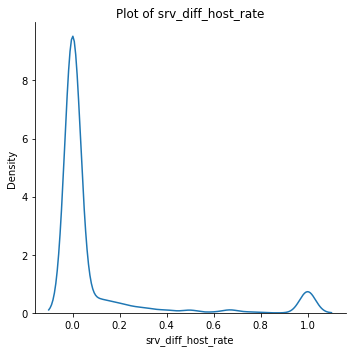

<Figure size 1584x1584 with 0 Axes>

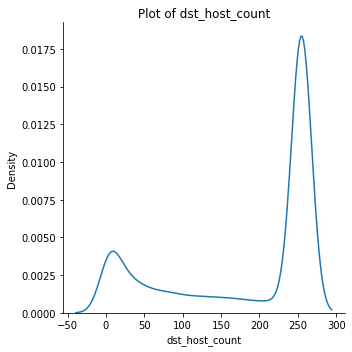

<Figure size 1584x1584 with 0 Axes>

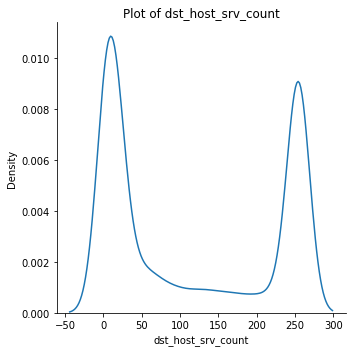

<Figure size 1584x1584 with 0 Axes>

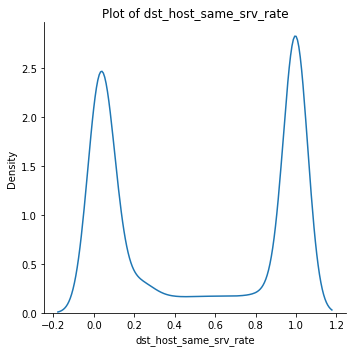

<Figure size 1584x1584 with 0 Axes>

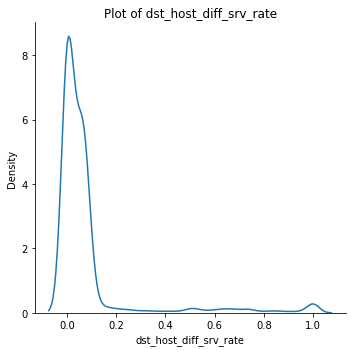

<Figure size 1584x1584 with 0 Axes>

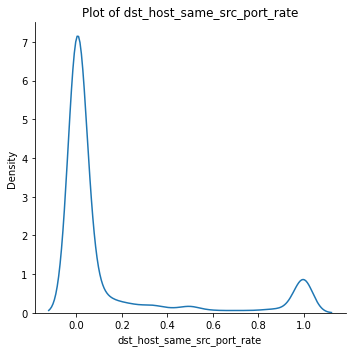

<Figure size 1584x1584 with 0 Axes>

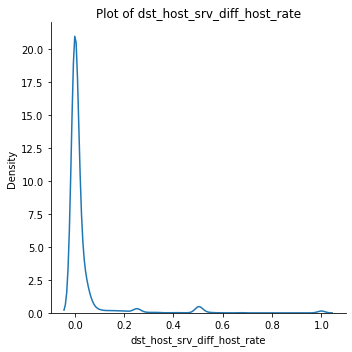

<Figure size 1584x1584 with 0 Axes>

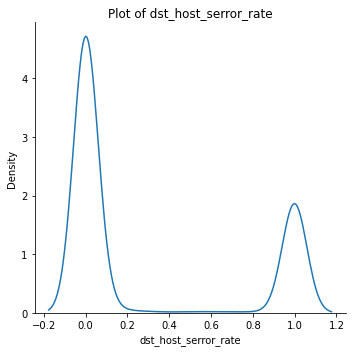

<Figure size 1584x1584 with 0 Axes>

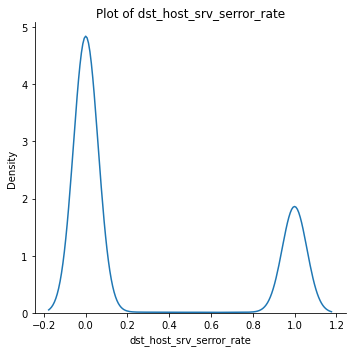

<Figure size 1584x1584 with 0 Axes>

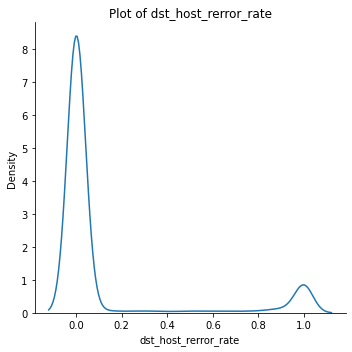

<Figure size 1584x1584 with 0 Axes>

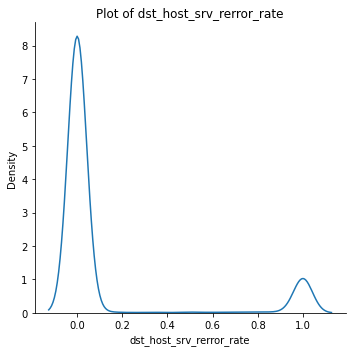

In [ ]:
columnnames=list(a.columns)
for columnname in columnnames:
  plt.figure(figsize=(22,22))
  sns.displot(train[columnname][1:], kind="kde")
  plt.title('Plot of '+columnname)
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Frequency Plot of Quantitative Features/Plot of'+columnname+'graph.png')
  plt.show()

<Figure size 1584x1584 with 0 Axes>

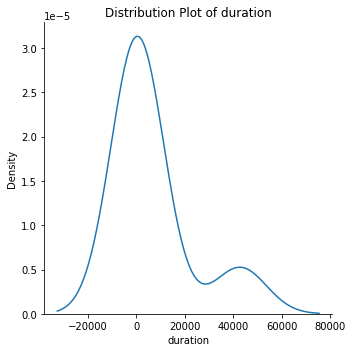

<Figure size 1584x1584 with 0 Axes>

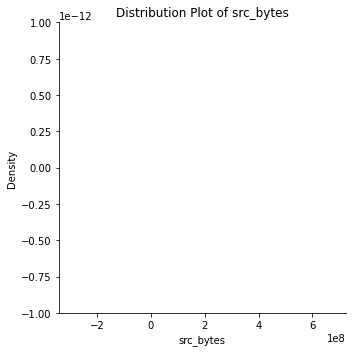

<Figure size 1584x1584 with 0 Axes>

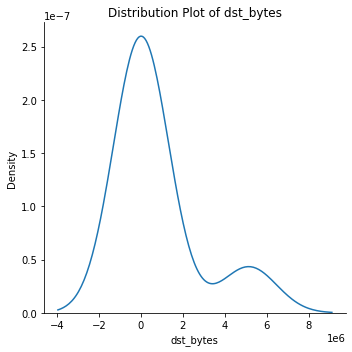

<Figure size 1584x1584 with 0 Axes>

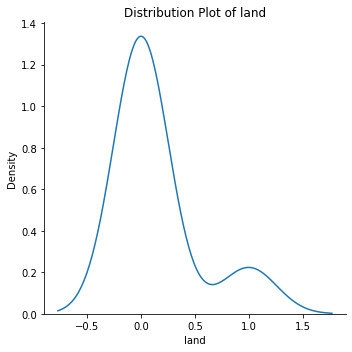

<Figure size 1584x1584 with 0 Axes>

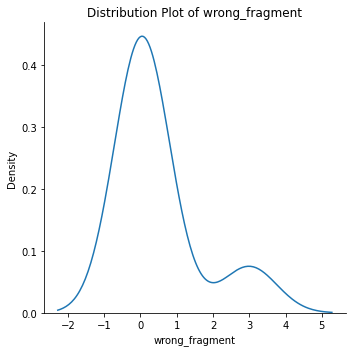

<Figure size 1584x1584 with 0 Axes>

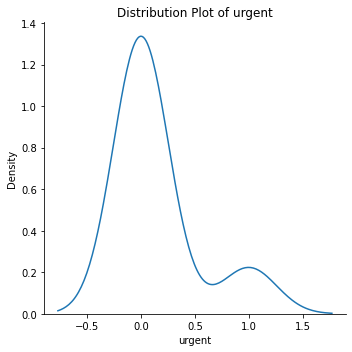

<Figure size 1584x1584 with 0 Axes>

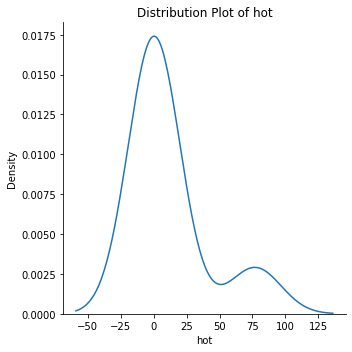

<Figure size 1584x1584 with 0 Axes>

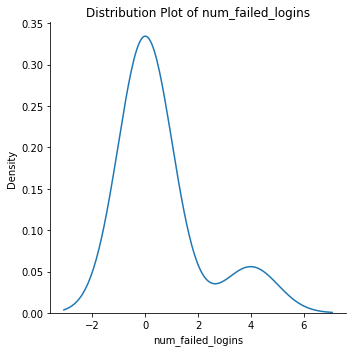

<Figure size 1584x1584 with 0 Axes>

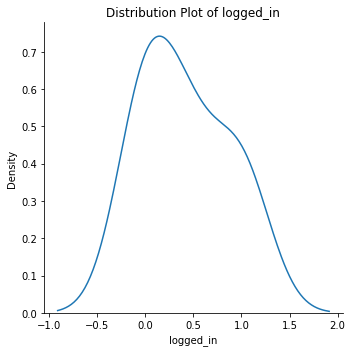

<Figure size 1584x1584 with 0 Axes>

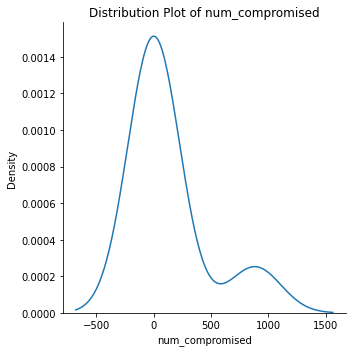

<Figure size 1584x1584 with 0 Axes>

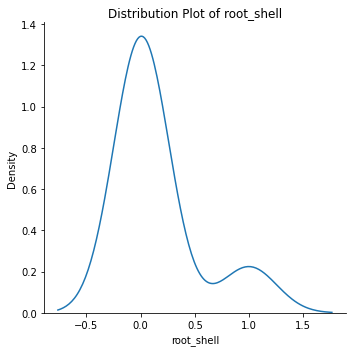

<Figure size 1584x1584 with 0 Axes>

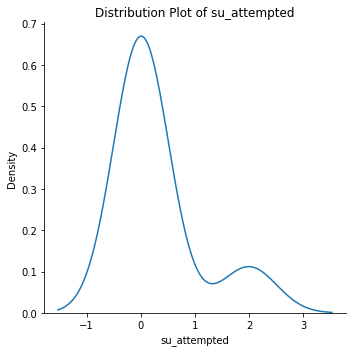

<Figure size 1584x1584 with 0 Axes>

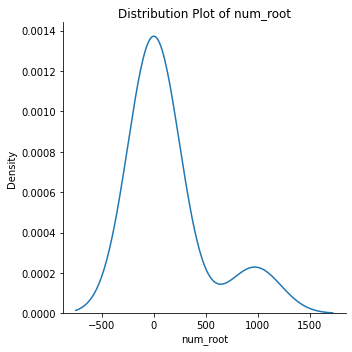

<Figure size 1584x1584 with 0 Axes>

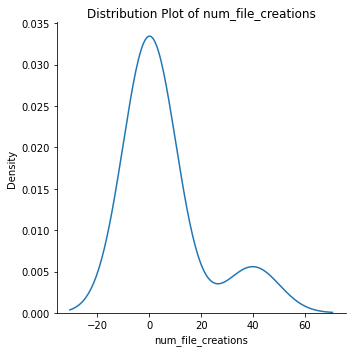

<Figure size 1584x1584 with 0 Axes>

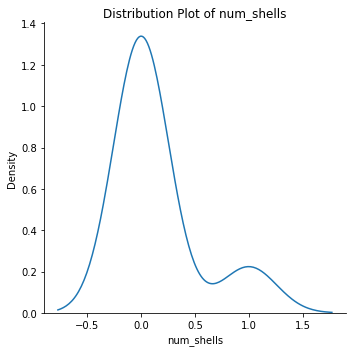

<Figure size 1584x1584 with 0 Axes>

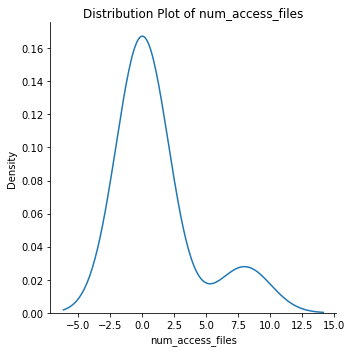

<Figure size 1584x1584 with 0 Axes>

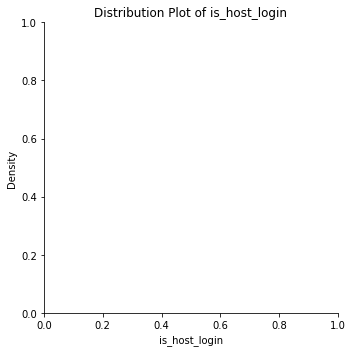

<Figure size 1584x1584 with 0 Axes>

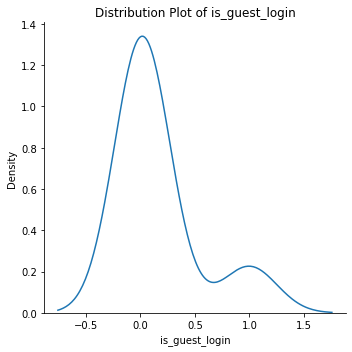

<Figure size 1584x1584 with 0 Axes>

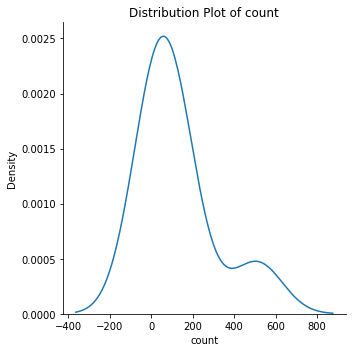

<Figure size 1584x1584 with 0 Axes>

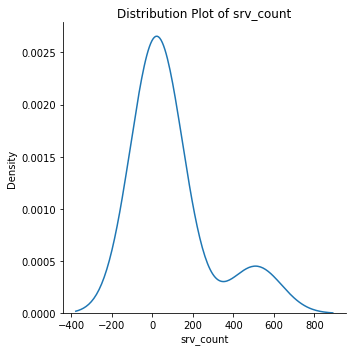

<Figure size 1584x1584 with 0 Axes>

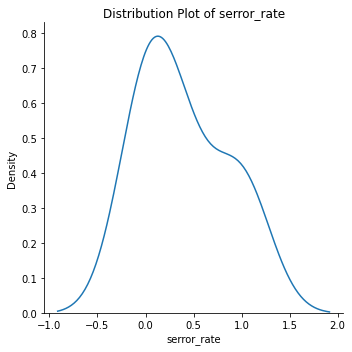

<Figure size 1584x1584 with 0 Axes>

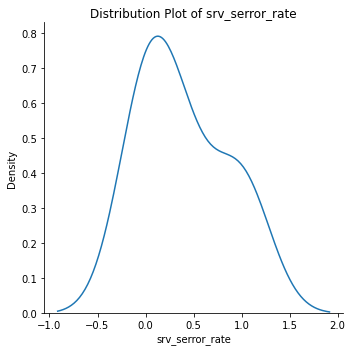

<Figure size 1584x1584 with 0 Axes>

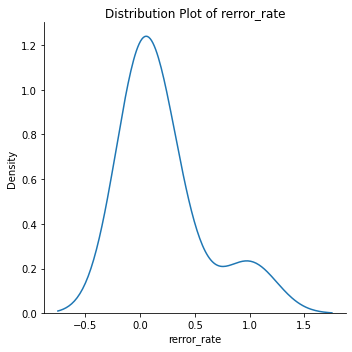

<Figure size 1584x1584 with 0 Axes>

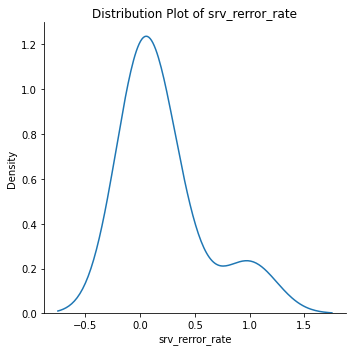

<Figure size 1584x1584 with 0 Axes>

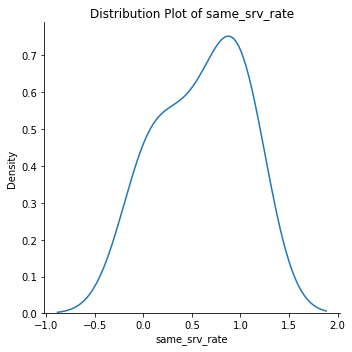

<Figure size 1584x1584 with 0 Axes>

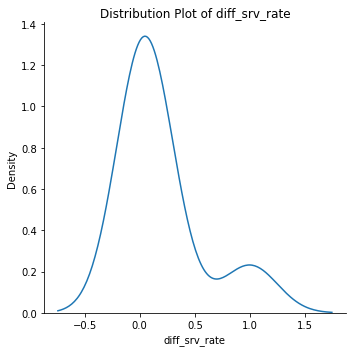

<Figure size 1584x1584 with 0 Axes>

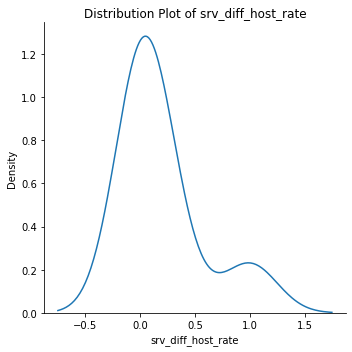

<Figure size 1584x1584 with 0 Axes>

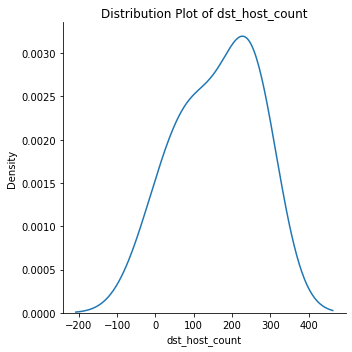

<Figure size 1584x1584 with 0 Axes>

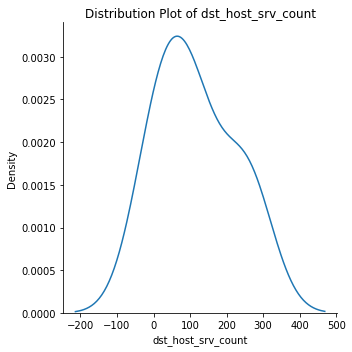

<Figure size 1584x1584 with 0 Axes>

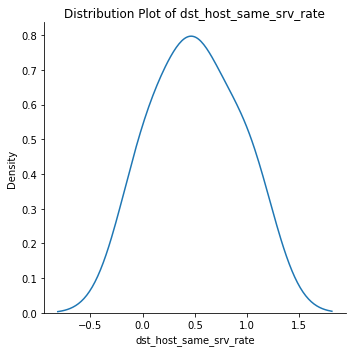

<Figure size 1584x1584 with 0 Axes>

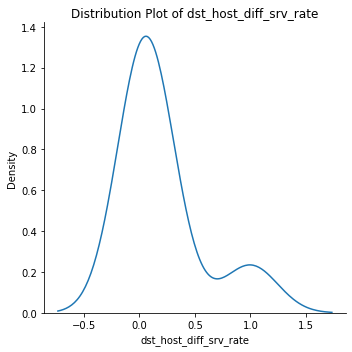

<Figure size 1584x1584 with 0 Axes>

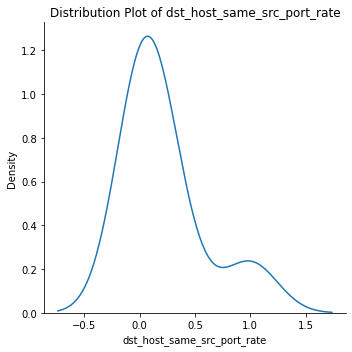

<Figure size 1584x1584 with 0 Axes>

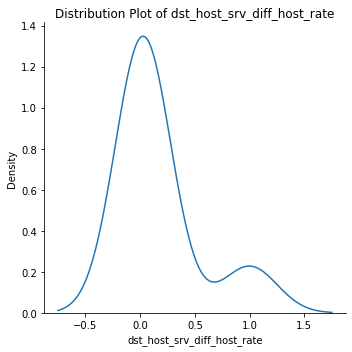

<Figure size 1584x1584 with 0 Axes>

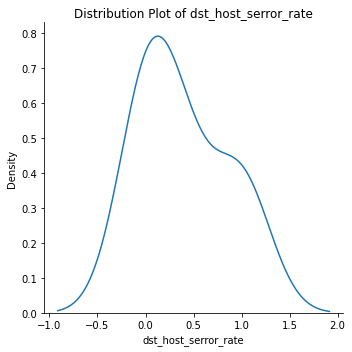

<Figure size 1584x1584 with 0 Axes>

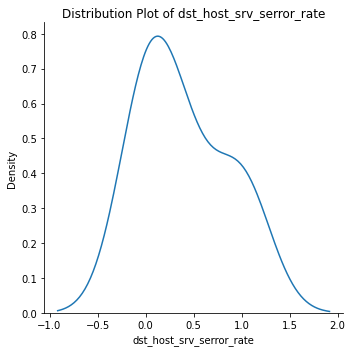

<Figure size 1584x1584 with 0 Axes>

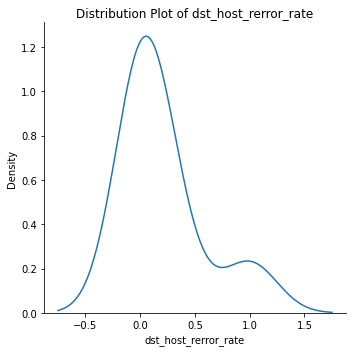

<Figure size 1584x1584 with 0 Axes>

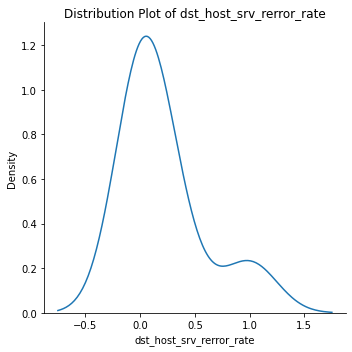

In [ ]:
columnnames=list(a.columns)
for columnname in columnnames:
  plt.figure(figsize=(22,22))
  sns.displot(a[columnname][1:], kind="kde")
  plt.title('Distribution Plot of '+columnname)
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Distribution Plots of Quantitative features/'+columnname+'graph.png')
  plt.show()

In [ ]:
type(train['protocol_type'])

pandas.core.series.Series

# SCALING NUMERICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)
print(sc_traindf)
print(sc_testdf)

       duration  src_bytes  dst_bytes     land  wrong_fragment    urgent  \
0     -0.113551  -0.009889  -0.039310 -0.00891       -0.091223 -0.006301   
1     -0.113551  -0.010032  -0.039310 -0.00891       -0.091223 -0.006301   
2     -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
3     -0.113551  -0.009996   0.052473 -0.00891       -0.091223 -0.006301   
4     -0.113551  -0.010010  -0.034582 -0.00891       -0.091223 -0.006301   
...         ...        ...        ...      ...             ...       ...   
25187 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25188 -0.113551  -0.009954  -0.039310 -0.00891       -0.091223 -0.006301   
25189 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25190 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25191 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   

            hot  num_failed_logins  logged_in  num_compromised  ...  \
0     -0.091933 

In [ ]:
sc_traindf.head()

duration  src_bytes  dst_bytes     land  wrong_fragment    urgent  \
0 -0.113551  -0.009889  -0.039310 -0.00891       -0.091223 -0.006301   
1 -0.113551  -0.010032  -0.039310 -0.00891       -0.091223 -0.006301   
2 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
3 -0.113551  -0.009996   0.052473 -0.00891       -0.091223 -0.006301   
4 -0.113551  -0.010010  -0.034582 -0.00891       -0.091223 -0.006301   

        hot  num_failed_logins  logged_in  num_compromised  ...  \
0 -0.091933           -0.02622  -0.807626        -0.021873  ...   
1 -0.091933           -0.02622  -0.807626        -0.021873  ...   
2 -0.091933           -0.02622  -0.807626        -0.021873  ...   
3 -0.091933           -0.02622   1.238197        -0.021873  ...   
4 -0.091933           -0.02622   1.238197        -0.021873  ...   

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0       -0.328634           -0.813985               -0.779157   
1        0.732059           -1.030895               -1.157831   
2        0.732059           -0.804947               -0.935081   
3       -1.540854            1.264742                1.069663   
4        0.732059            1.264742                1.069663   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0               -0.280673                     0.073120   
1                2.764403                     2.375620   
2               -0.173828                    -0.478183   
3               -0.440940                    -0.380894   
4               -0.440940                    -0.478183   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                    -0.287993             -0.641804   
1                    -0.287993             -0.641804   
2                    -0.287993              1.603834   
3                     0.073759             -0.574435   
4                    -0.287993             -0.641804   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  
0                 -0.627365             -0.221668                 -0.374281  
1                 -0.627365             -0.385140                 -0.374281  
2                  1.614454             -0.385140                 -0.374281  
3                 -0.604947             -0.385140                 -0.342768  
4                 -0.627365             -0.385140                 -0.374281  

[5 rows x 37 columns]

In [ ]:
sc_testdf.head()

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0 -0.155534  -0.021988  -0.096896 -0.017624       -0.059104 -0.019459   
1 -0.155534  -0.021988  -0.096896 -0.017624       -0.059104 -0.019459   
2 -0.154113   0.005473  -0.096896 -0.017624       -0.059104 -0.019459   
3 -0.155534  -0.021946  -0.096896 -0.017624       -0.059104 -0.019459   
4 -0.154823  -0.021988  -0.096189 -0.017624       -0.059104 -0.019459   

        hot  num_failed_logins  logged_in  num_compromised  ...  \
0 -0.113521          -0.143999  -0.890373        -0.016494  ...   
1 -0.113521          -0.143999  -0.890373        -0.016494  ...   
2 -0.113521          -0.143999  -0.890373        -0.016494  ...   
3 -0.113521          -0.143999  -0.890373        -0.016494  ...   
4 -0.113521          -0.143999  -0.890373        -0.016494  ...   

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0        0.650093           -1.169697               -1.305370   
1        0.650093           -1.250212               -1.397181   
2       -0.636681           -0.489800                0.002934   
3       -2.029801           -0.749234                0.898090   
4       -1.753304           -0.489800               -0.685647   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0               -0.138370                    -0.431856   
1               -0.138370                    -0.431856   
2               -0.228985                     1.559906   
3               -0.410217                     2.833328   
4                0.360018                    -0.333901   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                    -0.229980             -0.358118   
1                    -0.229980             -0.358118   
2                     0.004234             -0.358118   
3                     3.049016             -0.358118   
4                     0.004234             -0.358118   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  
0                  -0.35275              1.979791                  1.929116  
1                  -0.35275              1.979791                  1.929116  
2                  -0.35275             -0.602719                 -0.565483  
3                  -0.35275             -0.602719                 -0.565483  
4                  -0.35275              1.540764                  1.205682  

[5 rows x 37 columns]

# ENCODING CATEGORICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()
print(enctrain)
print(cat_Ytrain)

       protocol_type  service  flag
0                  1       19     9
1                  2       41     9
2                  1       46     5
3                  1       22     9
4                  1       22     9
...              ...      ...   ...
25187              1       16     2
25188              1       19     9
25189              1       46     1
25190              1       38     5
25191              1       17     5

[25192 rows x 3 columns]
       class
0          1
1          1
2          0
3          1
4          1
...      ...
25187      0
25188      0
25189      0
25190      0
25191      0

[25192 rows x 1 columns]


In [ ]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['class']
train_x.shape

(25192, 40)

In [ ]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape

(22544, 40)

In [ ]:
train_x.head()

duration  src_bytes  dst_bytes     land  wrong_fragment    urgent  \
0 -0.113551  -0.009889  -0.039310 -0.00891       -0.091223 -0.006301   
1 -0.113551  -0.010032  -0.039310 -0.00891       -0.091223 -0.006301   
2 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
3 -0.113551  -0.009996   0.052473 -0.00891       -0.091223 -0.006301   
4 -0.113551  -0.010010  -0.034582 -0.00891       -0.091223 -0.006301   

        hot  num_failed_logins  logged_in  num_compromised  ...  \
0 -0.091933           -0.02622  -0.807626        -0.021873  ...   
1 -0.091933           -0.02622  -0.807626        -0.021873  ...   
2 -0.091933           -0.02622  -0.807626        -0.021873  ...   
3 -0.091933           -0.02622   1.238197        -0.021873  ...   
4 -0.091933           -0.02622   1.238197        -0.021873  ...   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0               -0.280673                     0.073120   
1                2.764403                     2.375620   
2               -0.173828                    -0.478183   
3               -0.440940                    -0.380894   
4               -0.440940                    -0.478183   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                    -0.287993             -0.641804   
1                    -0.287993             -0.641804   
2                    -0.287993              1.603834   
3                     0.073759             -0.574435   
4                    -0.287993             -0.641804   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                 -0.627365             -0.221668                 -0.374281   
1                 -0.627365             -0.385140                 -0.374281   
2                  1.614454             -0.385140                 -0.374281   
3                 -0.604947             -0.385140                 -0.342768   
4                 -0.627365             -0.385140                 -0.374281   

   protocol_type  service  flag  
0              1       19     9  
1              2       41     9  
2              1       46     5  
3              1       22     9  
4              1       22     9  

[5 rows x 40 columns]

In [ ]:
test_df.head()

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0 -0.155534  -0.021988  -0.096896 -0.017624       -0.059104 -0.019459   
1 -0.155534  -0.021988  -0.096896 -0.017624       -0.059104 -0.019459   
2 -0.154113   0.005473  -0.096896 -0.017624       -0.059104 -0.019459   
3 -0.155534  -0.021946  -0.096896 -0.017624       -0.059104 -0.019459   
4 -0.154823  -0.021988  -0.096189 -0.017624       -0.059104 -0.019459   

        hot  num_failed_logins  logged_in  num_compromised  ...  \
0 -0.113521          -0.143999  -0.890373        -0.016494  ...   
1 -0.113521          -0.143999  -0.890373        -0.016494  ...   
2 -0.113521          -0.143999  -0.890373        -0.016494  ...   
3 -0.113521          -0.143999  -0.890373        -0.016494  ...   
4 -0.113521          -0.143999  -0.890373        -0.016494  ...   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0               -0.138370                    -0.431856   
1               -0.138370                    -0.431856   
2               -0.228985                     1.559906   
3               -0.410217                     2.833328   
4                0.360018                    -0.333901   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                    -0.229980             -0.358118   
1                    -0.229980             -0.358118   
2                     0.004234             -0.358118   
3                     3.049016             -0.358118   
4                     0.004234             -0.358118   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                  -0.35275              1.979791                  1.929116   
1                  -0.35275              1.979791                  1.929116   
2                  -0.35275             -0.602719                 -0.565483   
3                  -0.35275             -0.602719                 -0.565483   
4                  -0.35275              1.540764                  1.205682   

   protocol_type  service  flag  
0              1       45     1  
1              1       45     1  
2              1       19     9  
3              0       13     9  
4              1       55     2  

[5 rows x 40 columns]

In [ ]:
train_y

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

# FEATURE SELECTION

In [ ]:
def corr_heatmap(data, idx_s, idx_e):
    plt.figure(figsize=(22,10))
    y = data['class']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['class'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.title('Heat Map of Correlation Matrix of Netwrok Traffic Data', fontsize = 22)
    plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Correlation Matrix Results/fullcorrelationgraph.png')
    plt.show()

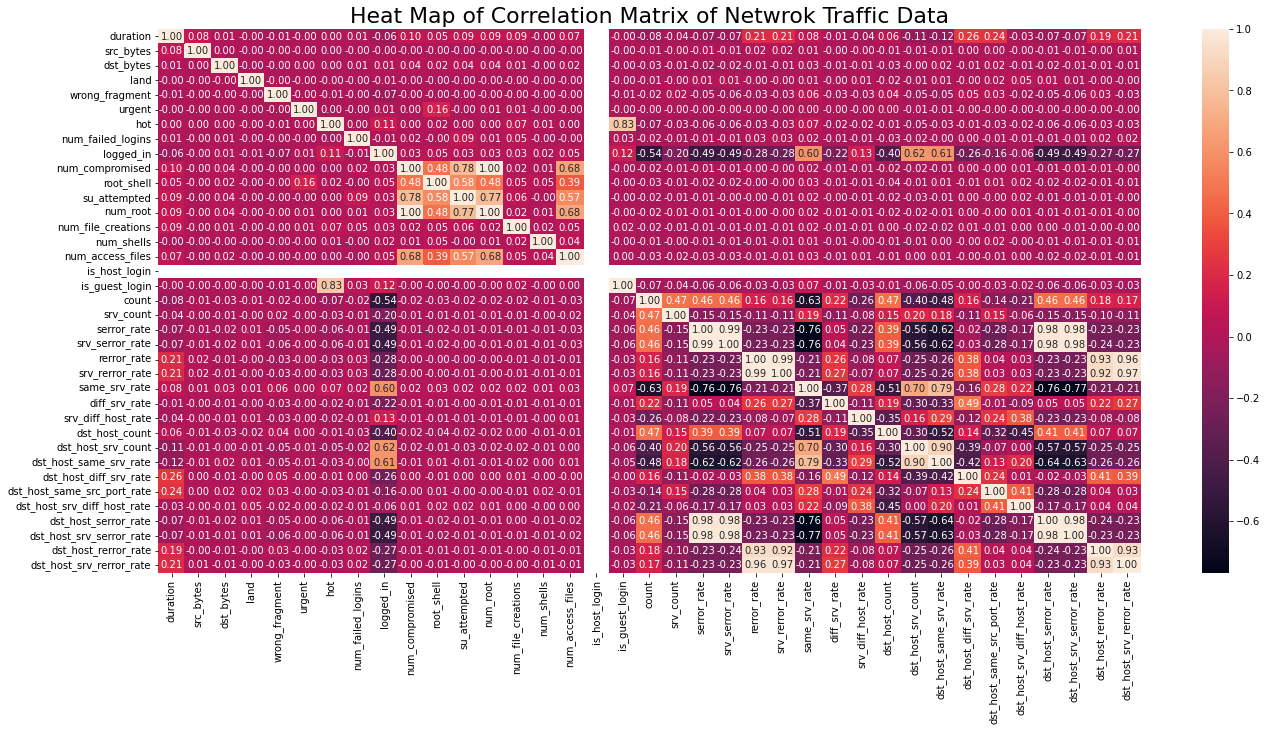

In [ ]:
corr_heatmap(train, 0, len(train)-1)

Correlation Matrix                              duration  src_bytes  dst_bytes      land  \
duration                     1.000000   0.084864   0.013258 -0.001012   
src_bytes                    0.084864   1.000000   0.003611 -0.000090   
dst_bytes                    0.013258   0.003611   1.000000 -0.000350   
land                        -0.001012  -0.000090  -0.000350  1.000000   
wrong_fragment              -0.010358  -0.000916  -0.003586 -0.000813   
urgent                      -0.000486  -0.000062   0.000345 -0.000056   
hot                          0.004202   0.000995   0.002539 -0.000819   
num_failed_logins            0.011108  -0.000260   0.005197 -0.000234   
logged_in                   -0.063703  -0.002040   0.012704 -0.007196   
num_compromised              0.095215  -0.000196   0.035852 -0.000195   
root_shell                   0.050547  -0.000383   0.020214 -0.000351   
su_attempted                 0.094243  -0.000267   0.035041 -0.000247   
num_root                     0.0

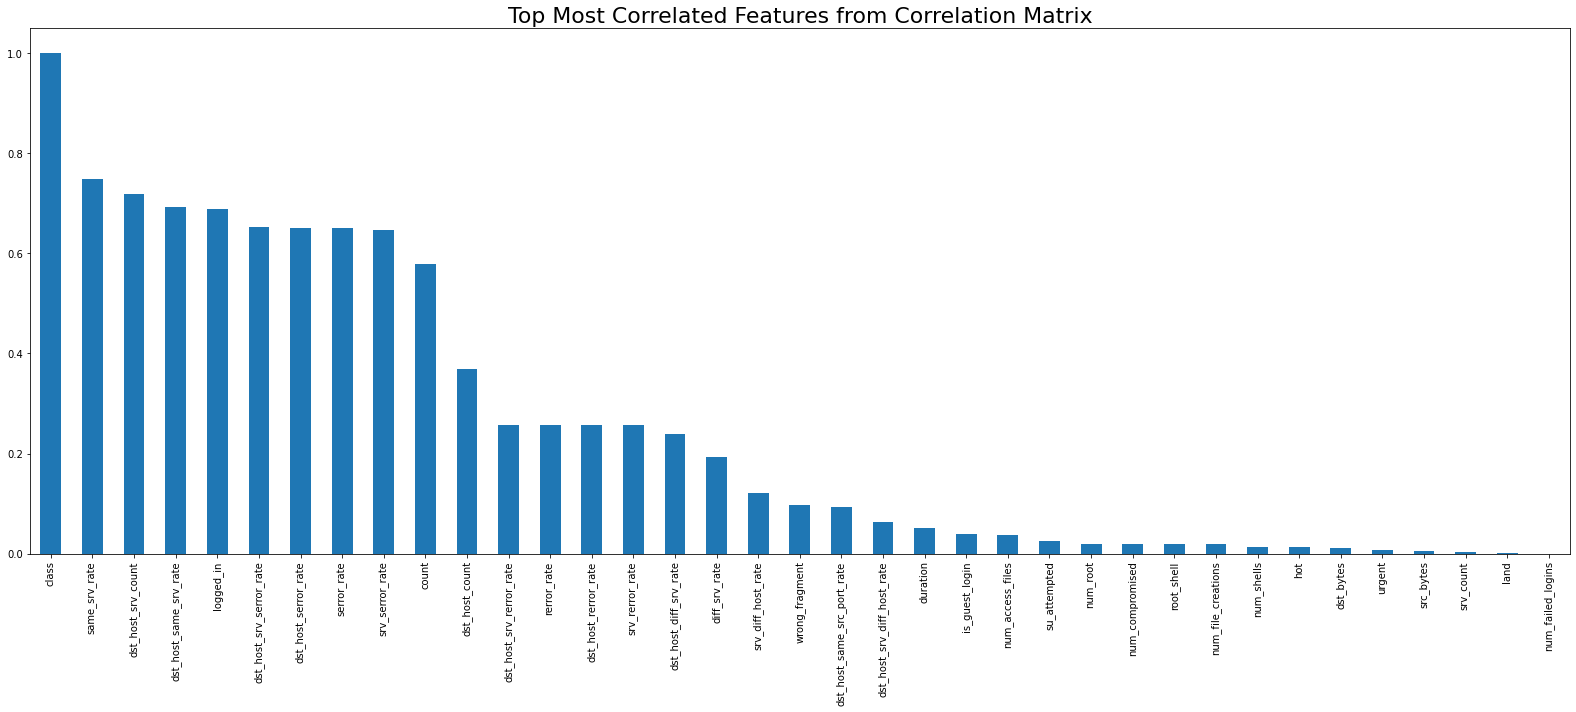

In [ ]:
# Correlation Matrix Heatmap
from sklearn import preprocessing
target=train
le = preprocessing.LabelEncoder()
target['class']=le.fit_transform(target['class'])
corrmat = target.corr()
print("Correlation Matrix",corrmat)
# Correlation with output variable
cor_target = abs(corrmat['class'])
cor_target.to_csv('/content/drive/MyDrive/NetworkTrafficData/Results/cor_targetfeatures.csv')
# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5]
print("Most Correlated:",relevant_features)
most_corr1 = pd.DataFrame(columns=['Most Correlated Features','Score'])
most_corr1['Most Correlated Features']=relevant_features.index
most_corr1['Score']=relevant_features.values
most_corr1.to_csv('/content/drive/MyDrive/NetworkTrafficData/Results/mostcorrelatedfeatures.csv')
plt.figure(figsize=(22,10))
cor_target=cor_target.sort_values(ascending=False)
cor_target=cor_target.dropna()
cor_target.plot.bar();
plt.title('Top Most Correlated Features from Correlation Matrix', fontsize = 22)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Correlation Matrix Results/correlationgraph.png')
plt.show()

In [ ]:
most_corr1

Most Correlated Features     Score
0                 logged_in  0.688084
1                     count  0.578790
2               serror_rate  0.649952
3           srv_serror_rate  0.647817
4             same_srv_rate  0.749237
5        dst_host_srv_count  0.719292
6    dst_host_same_srv_rate  0.692212
7      dst_host_serror_rate  0.651050
8  dst_host_srv_serror_rate  0.653759
9                     class  1.000000

[0.003 0.164 0.126 0.    0.005 0.    0.01  0.    0.052 0.004 0.    0.
 0.    0.    0.    0.    0.    0.001 0.045 0.018 0.004 0.008 0.005 0.004
 0.06  0.04  0.004 0.016 0.061 0.053 0.039 0.034 0.021 0.031 0.026 0.017
 0.005 0.036 0.023 0.084]


<Figure size 1584x720 with 0 Axes>

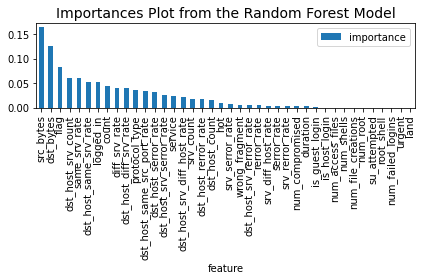

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
print(score)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.figure(figsize=(22,10))
importances.plot.bar()
plt.title('Importances Plot from the Random Forest Model', fontsize = 14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Features Selected from Random Forest/importancesgraph.png')

In [ ]:
importances.to_csv('/content/drive/MyDrive/NetworkTrafficData/Results/mostimportentfeatures.csv')

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'protocol_type',
 'service',
 'flag']

In [ ]:
cor_target.index

Index(['class', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'logged_in', 'dst_host_srv_serror_rate',
       'dst_host_serror_rate', 'serror_rate', 'srv_serror_rate', 'count',
       'dst_host_count', 'dst_host_srv_rerror_rate', 'rerror_rate',
       'dst_host_rerror_rate', 'srv_rerror_rate', 'dst_host_diff_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'wrong_fragment',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'duration', 'is_guest_login', 'num_access_files', 'su_attempted',
       'num_root', 'num_compromised', 'root_shell', 'num_file_creations',
       'num_shells', 'hot', 'dst_bytes', 'urgent', 'src_bytes', 'srv_count',
       'land', 'num_failed_logins'],
      dtype='object')

In [ ]:
list1 = selected_features
list2 = cor_target.index
Final_Selected_Common_Features=list(set(list1).intersection(list2))
Final_Selected_Common_Features

['dst_bytes',
 'dst_host_srv_count',
 'srv_count',
 'logged_in',
 'count',
 'dst_host_same_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'same_srv_rate',
 'src_bytes',
 'diff_srv_rate',
 'dst_host_same_src_port_rate']

In [ ]:
MostcorrelatedFeatures=most_corr1['Most Correlated Features'][:-1]
MostcorrelatedFeatures

0                   logged_in
1                       count
2                 serror_rate
3             srv_serror_rate
4               same_srv_rate
5          dst_host_srv_count
6      dst_host_same_srv_rate
7        dst_host_serror_rate
8    dst_host_srv_serror_rate
Name: Most Correlated Features, dtype: object

# DATASET PARTITION

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17634, 40) (7558, 40) (17634,) (7558,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(train_x[selected_features],train_y,train_size=0.70)

In [ ]:
print(X_train1.shape,X_test1.shape,Y_train1.shape,Y_test1.shape)

(17634, 15) (7558, 15) (17634,) (7558,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train2,X_test2,Y_train2,Y_test2 = train_test_split(train_x[MostcorrelatedFeatures],train_y,train_size=0.70)

In [ ]:
print(X_train2.shape,X_test2.shape,Y_train2.shape,Y_test1.shape)

(17634, 9) (7558, 9) (17634,) (7558,)


# All FEATURES FITTING MODELS

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train);

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
!pip install pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from random import randint
from colorama import init, Fore, Style
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import scikitplot as skplt
import numpy as np
from sklearn.metrics import accuracy_score

def majority_voting_score(X, y, estimators, classes):
    voting_matrix = np.zeros((X.shape[0], len(classes)))
    for estimator in estimators:
        predictions = estimator.predict(X)
        for i in range(X.shape[0]):
            voting_matrix[i, predictions[i]] += 1
    voting_score = classes.take(np.argmax(voting_matrix, axis=1))
    return accuracy_score(y, voting_score)

def get_individual_score(individual, estimators, X, y, classes):
    selected_estimators = [estimator for estimator, isSelected in zip(estimators, individual) if isSelected]
    individual_score = majority_voting_score(X, y, selected_estimators, classes)
    return individual_score

def _get_population_scores(pop_slice, estimators, X, y, classes):
    return [get_individual_score(individual, estimators, X, y, classes) for individual in pop_slice]

class GeneticOptimizer(object):
    """
    Class to wrap evolutionary genetic optimization operations
    """
    def __init__(self,
                 estimators,
                 classes,
                 data,
                 target,
                 val,
                 temp,
                 temp2,
                 pop_size=30,
                 mutation_rate=0.1,
                 crossover_rate=0.9,
                 iterations=1000,
                 elitism=False,
                 n_point_crossover=False,
                 n_jobs=1):
        self.estimators = estimators
        self.classes = classes
        self.X = data
        self.y = target
        self.val = val
        self.y_test=temp2
        self.pop_size = pop_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.iteration = iterations
        self.n_jobs = n_jobs
        self.elitism = elitism
        self.n_point_crossover = n_point_crossover
        self.no_score_change = 0
        self.duplicates_count = 0
        self.y_val=temp
        self.pop_history = []
        self.best_so_far = (0.0, [])
        self.individual_list =[]
        self.best_so_far_generation = 1



        self.__generate_random_population()




    def __generate_random_population(self):

        print("\nGenerating random population")
        print("Population size = %d" % self.pop_size)
        print("Individual size (genes) = %d" % len(self.estimators))
        self.pop = []
        for _ in range(self.pop_size):
            individual = []
            for _ in range(len(self.estimators)):
                individual.append(randint(0, 1))
            self.pop.append(individual)
            self.__update_pop_history(individual)

    def __compute_starts(self):
        n_individuals_per_job = (len(self.pop) // self.n_jobs) * np.ones(self.n_jobs, dtype=np.int)
        n_individuals_per_job[:len(self.pop) % self.n_jobs] += 1
        starts = np.cumsum(n_individuals_per_job)
        return ([0] + starts.tolist())

    def __parallel_score_processing(self):
        starts = self.__compute_starts()
        scores = Parallel(
            n_jobs=self.n_jobs, verbose=0)(
            delayed(_get_population_scores)(self.pop[starts[i]:starts[i + 1]],
                                            self.estimators,
                                            self.X,
                                            self.y,
                                            self.classes) for i in range(self.n_jobs))
        scores = [score for score_list in scores for score in score_list]
        return scores

    def __calculate_fitness_probabilities(self, scores):
        scores_mean = np.mean(scores)
        scores_std = np.std(scores)

        new_scores = [((score + (score - scores_mean) * 1000)**((score - scores_mean)/scores_std)) if ((score + (score - scores_mean) * 1000)**((score - scores_mean)/scores_std)) > 0 else 0.1 for score in scores]
        print("New Score:",new_scores)
        scores_sum = np.sum(new_scores)
        reproduction_prob = [score/scores_sum for score in new_scores]
        return reproduction_prob

    def __generate_child(self, pair, n_point_crossover):
        parent_1 = pair[0]
        parent_2 = pair[1]
        if n_point_crossover:
            n_cuts = randint(1, len(self.estimators) // 2)
            cut_indexes = sorted([randint(1, len(parent_1[1])-2) for i in list(range(n_cuts))] + [0, len(parent_1[1])])
            child_lists = [parent_1[1][cut_indexes[cut_indexes.index(i)-1]:i] if (cut_indexes[1:].index(i) % 2 == 0) else parent_2[1][cut_indexes[cut_indexes.index(i)-1]:i] for i in cut_indexes[1:]]
            child = [e for sublist in child_lists for e in sublist]
        else:
            cut_index = randint(1, len(pair[0][1]) - 2)
            child = parent_1[1][:cut_index] + parent_2[1][cut_index:]
        return child

    def __crossover(self, pair, n_point_crossover, crossover_pop=None):
        if np.random.rand() <= self.crossover_rate:
            child = self.__generate_child(pair, n_point_crossover)
            original_child = child[:]
            while child in self.pop_history:
            # while child in crossover_pop:
                self.children_rejected += 1
                child = self.__soft_mutate(child)
            if original_child != child:
                self.forced_mutations += 1
        else:
            self.skipped_crossover += 1
            r = np.random.rand()
            if r < 0.5:
                child = pair[0][1]
            else:
                child = pair[1][1]
        self.__update_pop_history(child)
        return child

    def __soft_mutate(self, individual):
        index_mutation = randint(0, len(individual) - 1)
        individual[index_mutation] ^= 1
        return individual

    def __mutate(self, individual):
        if np.random.rand() <= self.mutation_rate:
            self.natural_mutations += 1
            n_mutations = randint(1, len(individual) // 2)
            index_history = []
            for _ in range(n_mutations):
                index_mutation = randint(0, len(individual) - 1)
                while index_mutation in index_history:
                    index_mutation = randint(0, len(individual) - 1)
                index_history.append(index_mutation)
                individual[index_mutation] ^= 1
        return individual

    def __random_selection(self, sorted_pop, sel_prob):
        pair_indexes = np.random.choice(len(sorted_pop), 2, replace=False, p=sel_prob).tolist()
        pair = [sorted_pop[pair_indexes[0]], sorted_pop[pair_indexes[1]]]
        while pair[0][1] == pair[1][1]:
            pair_indexes = np.random.choice(len(sorted_pop), 2, replace=False, p=sel_prob).tolist()
            pair = [sorted_pop[pair_indexes[0]], sorted_pop[pair_indexes[1]]]
        return pair

    def __adjust_sel_sensivity(self, sel_sensivity):
        return min(sel_sensivity + (self.no_score_change * 0.010), 0.950)

    def __reproduce_population(self, fitness_prob, n_point_crossover=False, sel_sensivity=None, elitism=False):
        sorted_pop = [pop for _, pop in sorted(zip(fitness_prob, self.pop))]
        sorted_pop = [(idx, ind) for idx, ind in zip(list(range(len(sorted_pop))), sorted_pop)]

        if sel_sensivity:
            sel_sensivity = self.__adjust_sel_sensivity(sel_sensivity)
            print("** sel_sensivity = %f" % sel_sensivity)
            a = np.arange(1, len(sorted_pop) + 1)
            sel_prob = [((sel_sensivity - 1) / ((sel_sensivity**len(a)) - (1))) * (sel_sensivity**(len(a)-i)) for i in a]
        else:
            sel_prob = sorted(fitness_prob)

        if elitism:
            n_promoted = 1
            elite = [e[1][:] for e in sorted_pop[-n_promoted:]]
        else:
            n_promoted = 0

        new_pop = []
        crossover_pop = []

        if elitism:
            for e in elite:
                if e not in self.pop_history:
                    self.__update_pop_history(e)

        for i in range(len(self.pop) - n_promoted):
            pair = self.__random_selection(sorted_pop, sel_prob)
            child = self.__crossover(pair, n_point_crossover, crossover_pop)
            crossover_pop.append(child)

        new_pop = [self.__mutate(individual) for individual in crossover_pop]
        if elitism:
            new_pop += elite
        return new_pop

    def __update_duplicates(self):
        duplicates = dict(Counter([''.join([str(s) for s in i]) for i in self.pop]))
        self.duplicates_count = np.sum([duplicates[k] - 1 for k in duplicates.keys()])

    def __get_population_diversity(self):
        return ((len(self.pop) - self.duplicates_count) / len(self.pop))

    def __rank_population(self):
        scores = self.__parallel_score_processing()
        sorted_pop = [individual for _, individual in sorted(zip(scores, self.pop), reverse=True)]
        return sorted_pop, scores

    def __remove_outperformers(self, scores):
        mean_score = np.mean(scores)
        i = 0
        new_pop = []
        for individual in self.pop:
            if scores[i] < mean_score:
                new_individual = []
                for _ in range(len(self.estimators)):
                    new_individual.append(randint(0, 1))
                self.pop[i] = new_individual
            i += 1


    def __calculate_population_stats(self, initial_score, prev_score):
        sorted_pop, scores = self.__rank_population()
        best_individual = sorted_pop[0]
        best_score = get_individual_score(best_individual, self.estimators, self.X, self.y, self.classes)
        improvement = False
        if best_score > self.best_so_far[0]:
            improvement = True
            self.best_so_far = (best_score, best_individual)
            self.best_so_far_generation = self.global_step
        score_diff = (best_score - initial_score) * 100
        if best_score > prev_score:
            self.no_score_change = 0
            print("Best in population: " + Fore.GREEN + Style.BRIGHT + "%f%%" % (best_score * 100) + Style.RESET_ALL + " (%f%%)" % (score_diff) + " (%d) " % self.no_score_change)
        elif best_score < prev_score:
            print("Best in population: " + Fore.RED + Style.BRIGHT + "%f%%" % (best_score * 100) + Style.RESET_ALL + " (%f%%)" % (score_diff) + " (%d) " % self.no_score_change)
        else:
            self.no_score_change += 1
            print("Best in population: " + Fore.CYAN + Style.BRIGHT + "%f%%" % (best_score * 100) + Style.RESET_ALL + " (%f%%)" % (score_diff) + " (%d) " % self.no_score_change)

        print("Average score:      %f%%" % (np.mean(scores) * 100))
        print("Standard dev.:       %f%%" % (np.std(scores) * 100))
        pop_diversity = self.__get_population_diversity()
        print("Chromossomes:       %d" % len(self.pop_history))
        print("Pop. diversity:     %.2f%%" % (pop_diversity * 100) + " (%d duplicates)" % self.duplicates_count)
        # print("Best score so far:  %f%%" % (self.best_so_far[0] * 100) + " (%f%%)" % ((self.best_so_far[0] - initial_score)*100))

        if improvement:
            print("Best score so far:  " + Fore.GREEN + Style.BRIGHT + "%f%%" % (self.best_so_far[0] * 100) + Style.RESET_ALL + " (%f%%)" % ((self.best_so_far[0] - initial_score)*100) + " (%d) " % self.best_so_far_generation)
        else:
            if best_individual:
                print("Best score so far:  " + Fore.CYAN + Style.BRIGHT + "%f%%" % (self.best_so_far[0] * 100) + Style.RESET_ALL + " (%f%%)" % ((self.best_so_far[0] - initial_score)*100) + " (%d) " % self.best_so_far_generation)
            else:
                print("Accurate")
        print("Score (validation): %f%%" % ((self.best_so_far[0] - self.val[0]) * 100))


        # self.__remove_outperformers(scores)

        return best_score, scores, best_individual

    def __update_pop_history(self, individual):
        self.pop_history += [individual]

    def run_genetic_evolution(self):
        # self.weights = get_weights(self.X, self.y, self.estimators, self.classes)
        initial_score = majority_voting_score(self.X, self.y, self.estimators, self.classes)
        print("\nInitial score = %f%%" % (initial_score * 100))
        self.best_so_far = (initial_score, [])
        # input()
        prev_score = 0

        print("\n________________________________________________________________________________")
        print("Generation: 0")
        scores = self.__parallel_score_processing()
        #plt.ion()  # something about plotting
        #x = np.linspace(*self.y, 200)
        #print("x",x)
        #plt.plot(x, F(x))

        fitness_list=list()
        individual_list=list()
        for i in range(self.iteration):

            try:
                fitness_prob = self.__calculate_fitness_probabilities(scores)
                fitness_list.append(fitness_prob)
                print("\nReproducing population...        ")
                self.natural_mutations = 0
                self.forced_mutations = 0
                self.skipped_crossover = 0
                self.children_rejected = 0
                self.global_step = i


                # self.pop = self.__reproduce_population(fitness_prob, sel_sensivity=0.95, elitism=True)
                self.pop = self.__reproduce_population(fitness_prob, n_point_crossover=self.n_point_crossover, elitism=self.elitism)
                self.__update_duplicates()
                print("Natural mutations: %d" % (self.natural_mutations) + " (%.2f%%)" % ((self.natural_mutations / len(self.pop)) * 100))
                print("Forced mutations:  %d" % (self.forced_mutations) + " (%.2f%%)" % ((self.forced_mutations / len(self.pop)) * 100))
                print("Skipped crossover: %d" % (self.skipped_crossover) + " (%.2f%%)" % ((self.skipped_crossover / len(self.pop)) * 100))
                print("Children rejected: %d" % (self.children_rejected))

                print("\nCalculating statistics...   ")
                prev_score, scores, best_individual = self.__calculate_population_stats(initial_score, prev_score)
                individual_list.append(best_individual)
               # skplt.metrics.plot_confusion_matrix(
                #    self.y_val,
                #    best_individual,
                #    figsize=(10, 6), title="Confusion matrix\n after Gentic optimization")
                #plt.xlim(-0.5, len(np.unique(self.y_val)) - 0.5)
                #plt.ylim(len(np.unique(self.y_val)) - 0.5, -0.5)
                #plt.show()


                print("\n")
                print("Generation: %d" % (i + 1))
            except KeyboardInterrupt:
                break


        self.individual_list=np.asarray(individual_list)
        print("Best individual shape:",len(individual_list))

        print("\n\n\n================================================================================")
        print("\nFinished genetic optimization")

        print("\n\n=======================================================================")
        print("Optimization  Results")
        print("=======================================================================")

        return self.best_so_far, initial_score


In [ ]:
import numpy as np
import string
import pickle
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
import sys
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier  # For Classification
from sklearn.ensemble import GradientBoostingRegressor  # For Regression

import seaborn as sns
import numpy
import math
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
numpy.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 2000)

import numpy as np
from sklearn.metrics import accuracy_score

def majority_voting_score(X, y, estimators, classes):
    voting_matrix = np.zeros((X.shape[0], len(classes)))
    for estimator in estimators:
        predictions = estimator.predict(X)
        for i in range(X.shape[0]):
            voting_matrix[i, predictions[i]] += 1
    voting_score = classes.take(np.argmax(voting_matrix, axis=1))
    return accuracy_score(y, voting_score)


X_train= X_train
y_train= Y_train
X_test= X_test
X_val = X_test
y_test=Y_test
y_val=Y_test
n_estimators = 10
pop_size = n_estimators // 2
iterations = 20
mutation_rate = 0.1
crossover_rate = 1
n_jobs = 8
elitism = True
n_point_crossover = False

max_samples_ratio = 0.9
print("\nGenerating estimators from Bagging method...")
#bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)
bagging.fit(X_train, y_train)
predictions = bagging.predict(X_test)
basicbagging=bagging
print("Bagging Score:", bagging.score)
val_initial_score= 80
gen_opt = GeneticOptimizer(estimators=bagging.estimators_,
                           classes=bagging.classes_,
                           data=X_test,
                           target=y_test,
                           val=(val_initial_score, X_val, y_val),
                           pop_size=pop_size,
                           mutation_rate=mutation_rate,
                           crossover_rate=crossover_rate,
                           iterations=iterations,
                           elitism=elitism,
                           n_point_crossover=n_point_crossover,
                           n_jobs=n_jobs,
                           temp=y_val,temp2=y_test)

best_found, test_initial_score= gen_opt.run_genetic_evolution()

print()
print("Best individual score found: %f%% (Gain: %f%%)" % (best_found[0] * 100, (best_found[0] - test_initial_score) * 100))
# print("Estimators combination for the best score:")
# print(best_found[1])
print("Number of estimators: %d" % (len([estimator for estimator in best_found[1] if estimator])))

print("\nTesting best combination on validation set...")
final_score = get_individual_score(best_found[1], bagging.estimators_, X_val, y_val, bagging.classes_)
print("Final score: %f%% (Gain: %f%%)" % (final_score * 100, (final_score - val_initial_score) * 100))

filename = 'optimized_model_%d.ens' % int(time.time())
pickle.dump((bagging, best_found[1]), open(filename, 'wb'))
print("\nSaved optimized model as [%s]" % filename)
Genbagging=bagging
print("\n================================================================================")


Generating estimators from Bagging method...
Bagging Score: <bound method ClassifierMixin.score of BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.9)>

Generating random population
Population size = 5
Individual size (genes) = 10

Initial score = 99.775073%

________________________________________________________________________________
Generation: 0
New Score: [1.0476692969763417, 1.0951112465486954, 1.0476692969763417, 1.0476692969763417, 1.0951112465486954]

Reproducing population...        
Natural mutations: 0 (0.00%)
Forced mutations:  0 (0.00%)
Skipped crossover: 0 (0.00%)
Children rejected: 0

Calculating statistics...   
Best in population: 99.761842% (-0.013231%) (0) 
Average score:      99.753903%
Standard dev.:       0.010585%
Chromossomes:       9
Pop. diversity:     100.00% (0 duplicates)
Best score so far:  99.775073% (0.000000%) (1) 
Score (validation): -7900.224927%


Generation: 1
New Score: [1.0572145657447094, 1.0572145657447094, 1.0289274

In [ ]:
test_initial_score

0.9977507277057422

In [ ]:
Basicbagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)
Basicbagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.9)

In [ ]:
import joblib

def save_model(model,modelname):
  model_path = '/content/drive/MyDrive/NetworkTrafficData/model/'
  modelfilename=modelname+'_model.sav'
  joblib.dump(model, model_path+modelfilename)

save_model(KNN_Classifier,'KNN_Classifier')
save_model(LGR_Classifier,'LGR_Classifier')
save_model(BNB_Classifier, 'BNB_Classifier')
save_model(DTC_Classifier , 'DTC_Classifier')
save_model(Basicbagging, 'Basic_Bagging')
save_model(Genbagging, 'Genetic_Bagging')

# EVALUATE MODELS

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

def mlresults(modelname ,v, y_test,pred,X_test):
  scores = cross_val_score(v, X_test, Y_test, cv=10)
  le = preprocessing.LabelEncoder()
  target=le.fit_transform(y_test)
  predicted = le.fit_transform(pred)
  accuracy = metrics.accuracy_score(target, predicted)
  confusion_matrix = metrics.confusion_matrix(target, predicted)
  print('============================== {} Model Test Results =============================='.format(modelname))
  print()
  # Plot ROC curve
  plt.figure(figsize=(15,15))
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(y_test))
  cm_display.plot()
  plt.title('Confusion Matrix of '+modelname, fontsize = 16)
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/All Features/Confusion Matrix/'+modelname+'confusionmatrixgraph.png')
  plt.show()
  y_pred_prob_lr = BNB_Classifier.predict_proba(X_test)[:,1]
  fpr_lr, tpr_lr, thresholds_lr = roc_curve(target, y_pred_prob_lr)
  roc_auc_lr = auc(fpr_lr, tpr_lr)
  precision_lr, recall_lr, th_lr = precision_recall_curve(target, y_pred_prob_lr)
  # Plot ROC curve
  plt.figure(figsize=(15,10))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_lr, tpr_lr, label=modelname % roc_auc_lr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves from the '+modelname, fontsize = 22)
  plt.legend(loc='best')
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/All Features/Rocs of Models/'+modelname+'rocgraph.png')
  plt.show()
  classification = metrics.classification_report(target, predicted)
  accuracy = metrics.accuracy_score(target, predicted)
  mse=mean_squared_error(target, predicted)
  mae = metrics.mean_absolute_error(target, predicted)
  rs=r2_score(target, predicted)
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Mean squared error: ", mse)
  print()
  print('Variance score: %.2f' % rs)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification)

  return scores.mean(),accuracy,mse,mae,rs

============================== Naive Baye Classifier Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

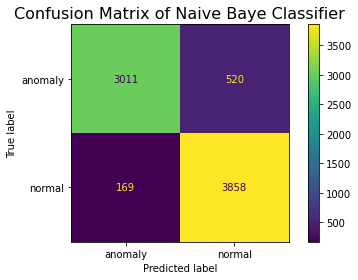

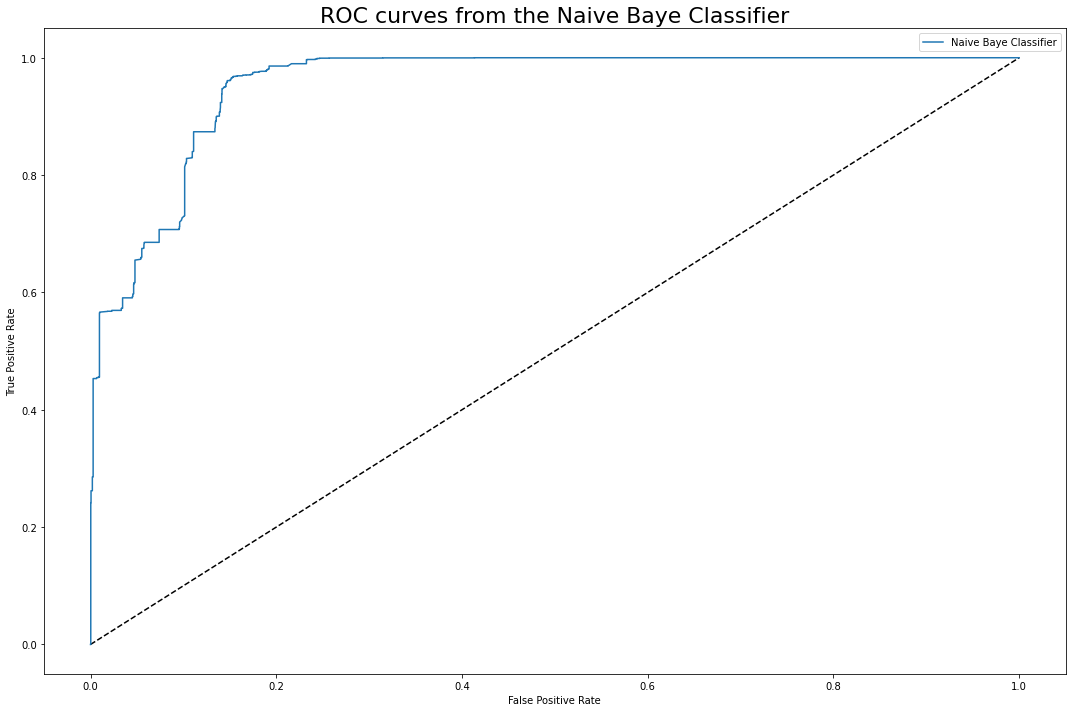

Cross Validation Mean Score:
 0.9100297838046183

Model Accuracy:
 0.9088383170150833

Mean squared error:  0.09116168298491664

Variance score: 0.63

Confusion matrix:
 [[3011  520]
 [ 169 3858]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      3531
           1       0.88      0.96      0.92      4027

    accuracy                           0.91      7558
   macro avg       0.91      0.91      0.91      7558
weighted avg       0.91      0.91      0.91      7558

============================== Decision Tree Classifier Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

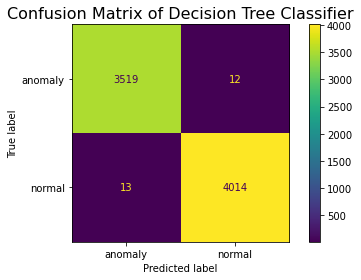

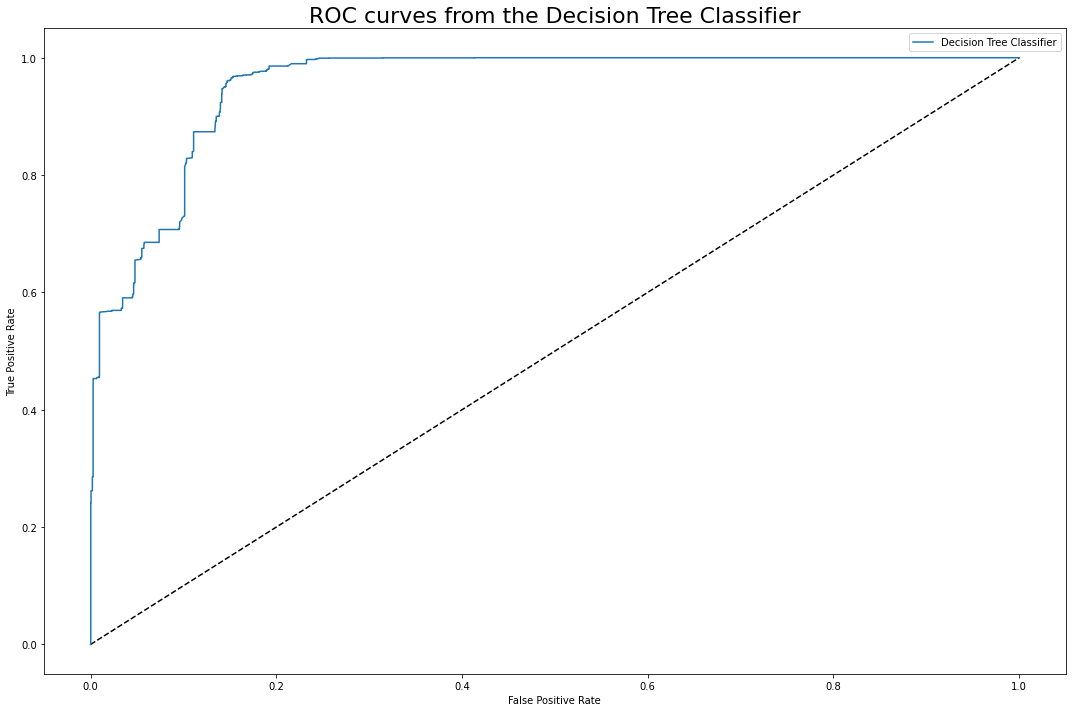

Cross Validation Mean Score:
 0.9929871404043589

Model Accuracy:
 0.9966922466260916

Mean squared error:  0.003307753373908441

Variance score: 0.99

Confusion matrix:
 [[3519   12]
 [  13 4014]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3531
           1       1.00      1.00      1.00      4027

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

============================== KNeighborsClassifier Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

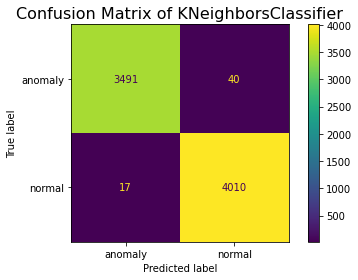

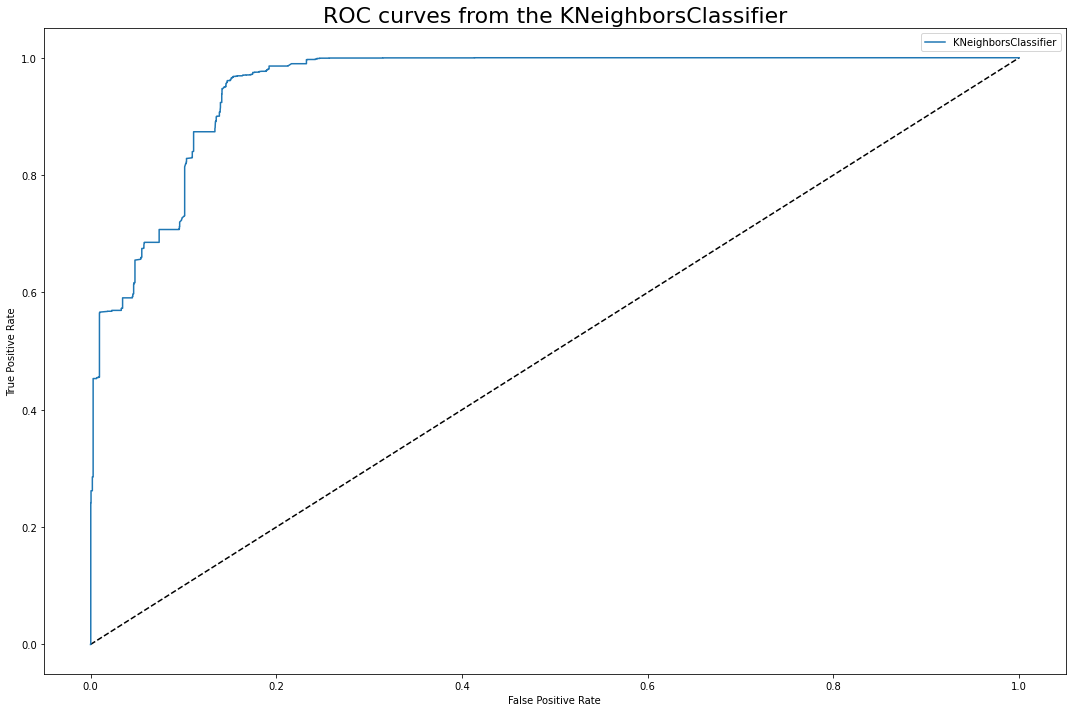

Cross Validation Mean Score:
 0.988489435509303

Model Accuracy:
 0.9924583223074888

Mean squared error:  0.007541677692511246

Variance score: 0.97

Confusion matrix:
 [[3491   40]
 [  17 4010]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3531
           1       0.99      1.00      0.99      4027

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

============================== LogisticRegression Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

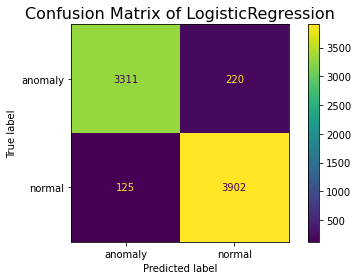

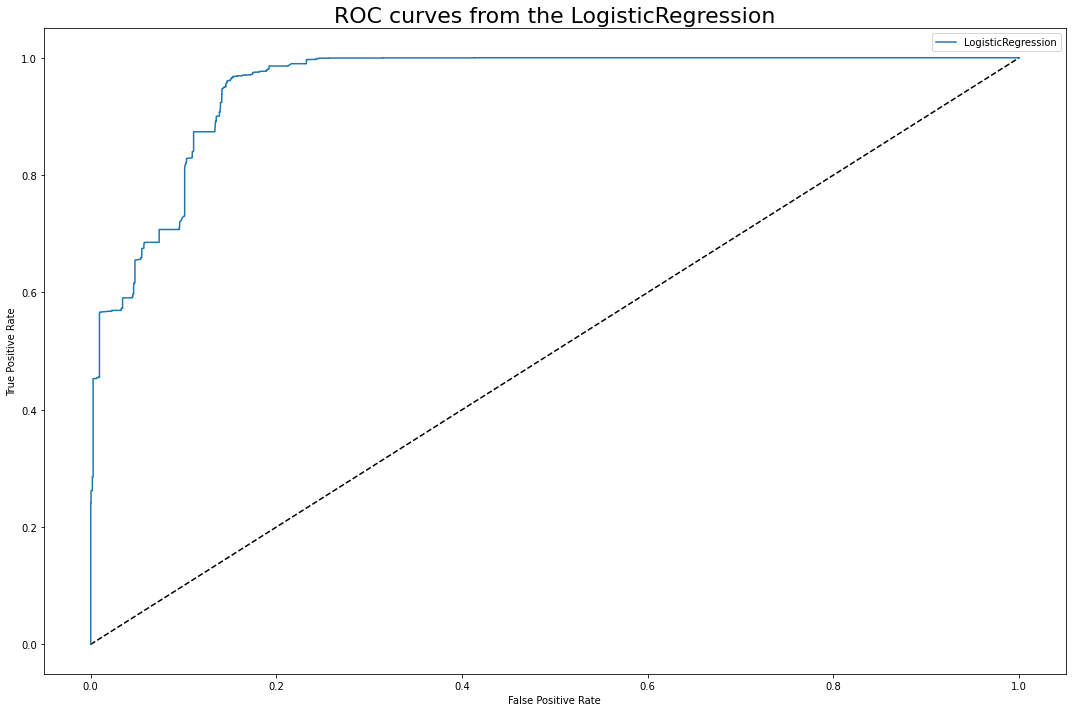

Cross Validation Mean Score:
 0.9527642874662743

Model Accuracy:
 0.9543530034400635

Mean squared error:  0.04564699655993649

Variance score: 0.82

Confusion matrix:
 [[3311  220]
 [ 125 3902]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      3531
           1       0.95      0.97      0.96      4027

    accuracy                           0.95      7558
   macro avg       0.96      0.95      0.95      7558
weighted avg       0.95      0.95      0.95      7558

============================== Basic Bagging Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

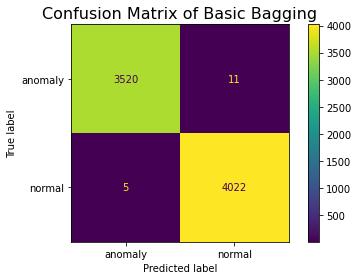

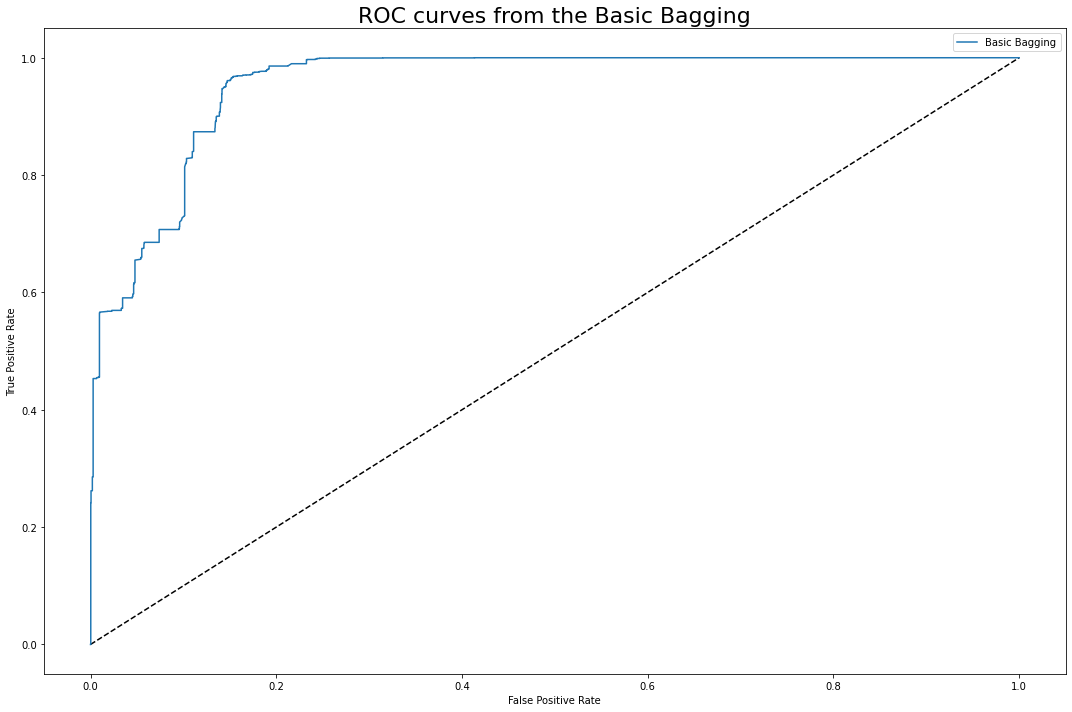

Cross Validation Mean Score:
 0.9956336942429658

Model Accuracy:
 0.9978830378406987

Mean squared error:  0.0021169621593014024

Variance score: 0.99

Confusion matrix:
 [[3520   11]
 [   5 4022]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3531
           1       1.00      1.00      1.00      4027

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

============================== Genetically Optimized Random Forest Bagging Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

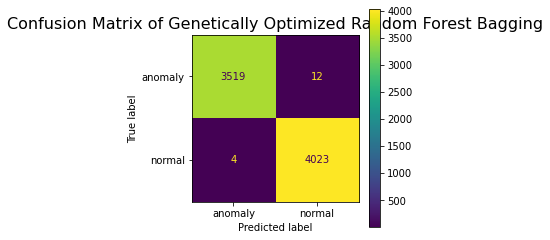

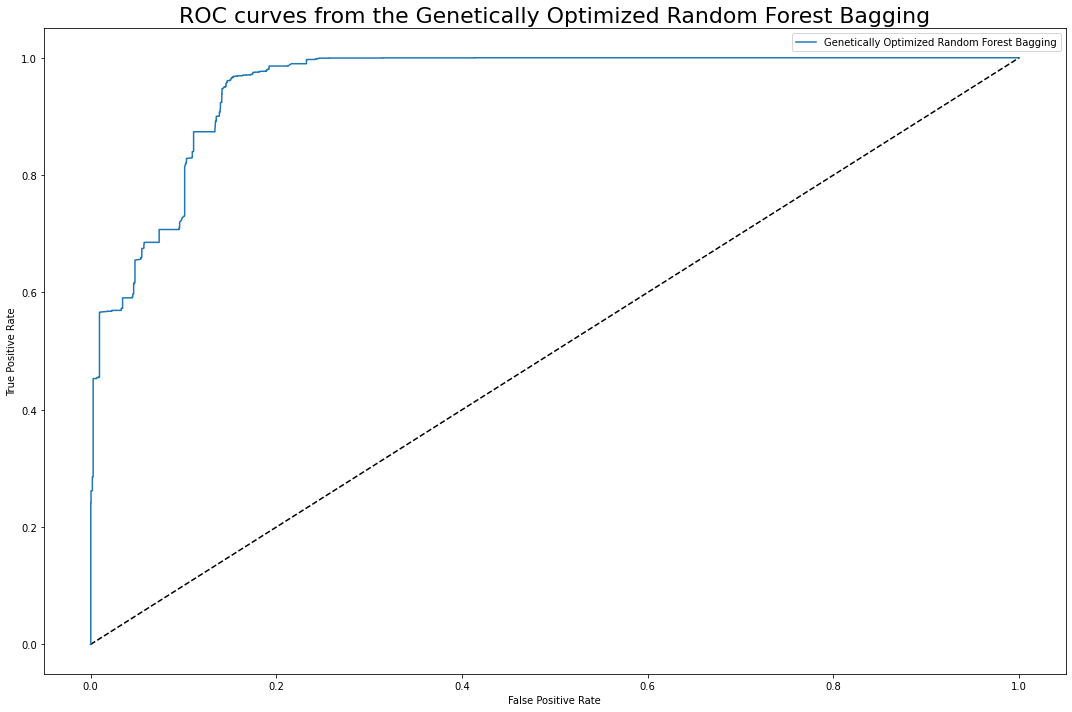

Cross Validation Mean Score:
 0.9955014191106907

Model Accuracy:
 0.9978830378406987

Mean squared error:  0.0021169621593014024

Variance score: 0.99

Confusion matrix:
 [[3519   12]
 [   4 4023]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3531
           1       1.00      1.00      1.00      4027

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [ ]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('Basic Bagging', Basicbagging))
models.append(('Genetically Optimized Random Forest Bagging', Genbagging ))
accuracy_score=list()
mse_values=list()
variance_score=list()
modelnames= list()
resultscore=pd.DataFrame(columns=['Model','Cross Validation Score','Accuracy','Mean Square Error','Mean Absolute Error','Root2 Score'])
j=0
for i, v in models:
    scores,accuracy,mse,mae,rs=mlresults(i,v, Y_test,v.predict(X_test),X_test)
    accuracy_score.append(accuracy)
    mse_values.append(mse)
    variance_score.append(rs)
    resultscore.loc[j] =[i,scores,accuracy,mse,mae,rs]
    j=j+1
    modelnames.append(i)

In [ ]:
resultscore.to_csv('/content/drive/MyDrive/NetworkTrafficData/Results/All Features/Resulttable.csv')
resultscore

Model  Cross Validation Score  Accuracy  Mean Square Error  Mean Absolute Error  Root2 Score
0                        Naive Baye Classifier                0.910030  0.908838           0.091162             0.091162     0.633776
1                     Decision Tree Classifier                0.992987  0.996692           0.003308             0.003308     0.986712
2                         KNeighborsClassifier                0.988489  0.992458           0.007542             0.007542     0.969703
3                           LogisticRegression                0.952764  0.954353           0.045647             0.045647     0.816622
4                                Basic Bagging                0.995634  0.997883           0.002117             0.002117     0.991496
5  Genetically Optimized Random Forest Bagging                0.995501  0.997883           0.002117             0.002117     0.991496

### Function for genesentiments the graph

In [ ]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(20, 10))

    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.ylabel('Score', size=14)
    plt.xlabel('Models', size=14)
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/All Features/'+title+'graph.png')

### Cross Validation Score

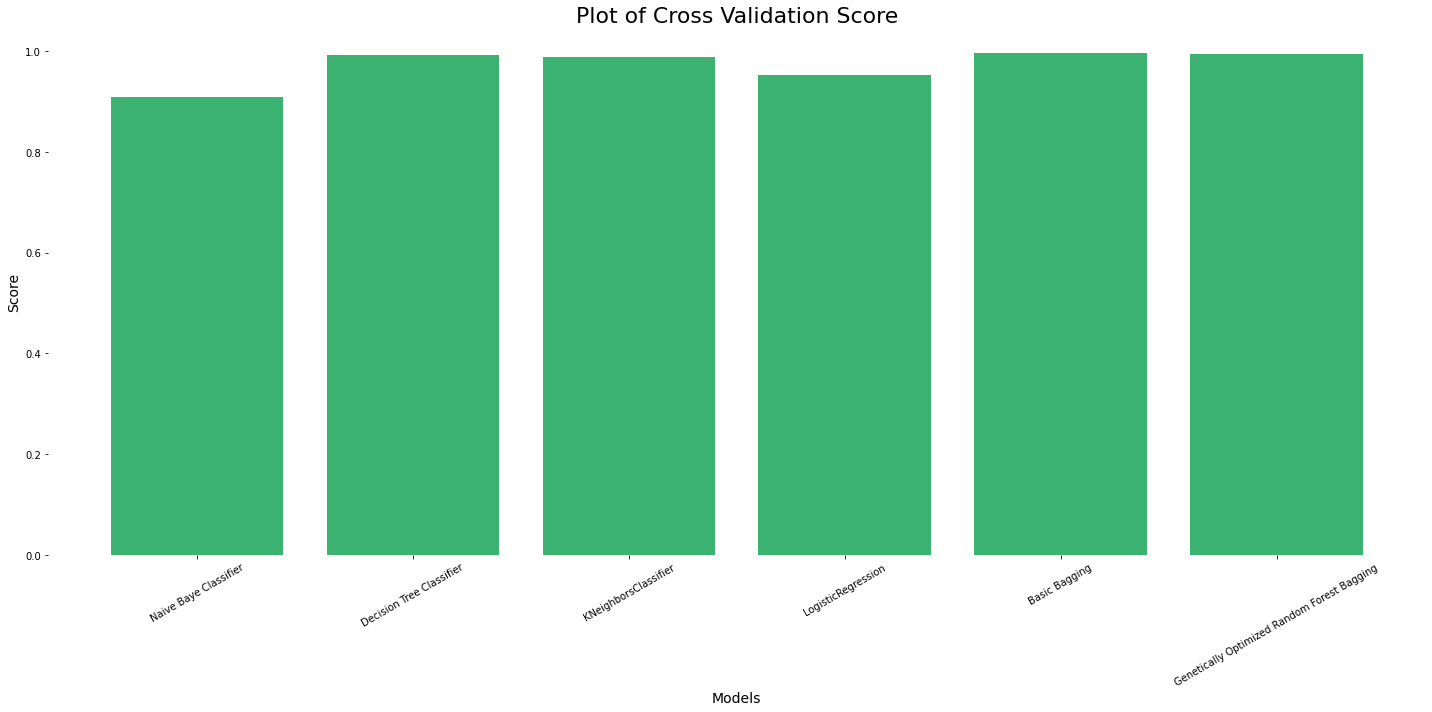

In [ ]:
ticks = modelnames
generate_plot("Plot of Cross Validation Score", ticks, resultscore['Cross Validation Score'], 1)

### Accuracy graph

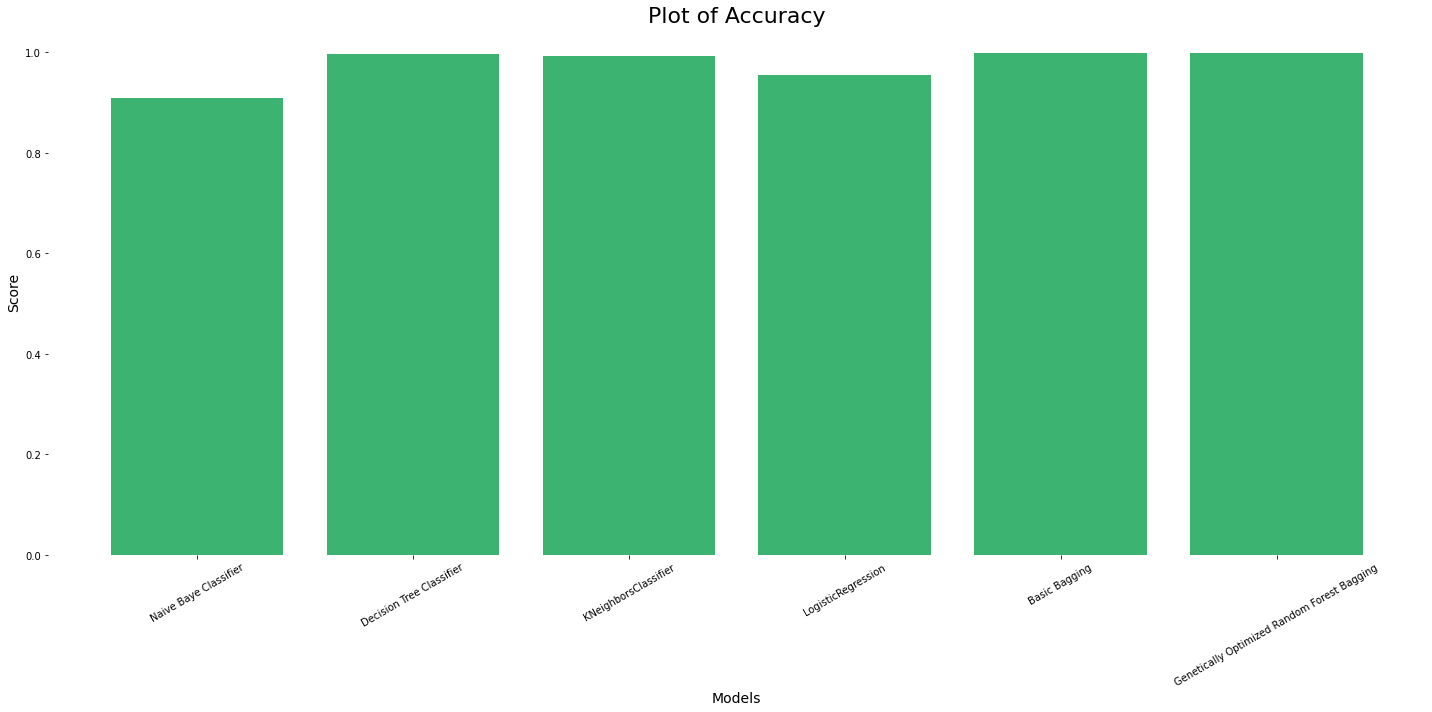

In [ ]:
ticks = modelnames
generate_plot("Plot of Accuracy", ticks, resultscore['Accuracy'], 1)

### Mean squared error graph

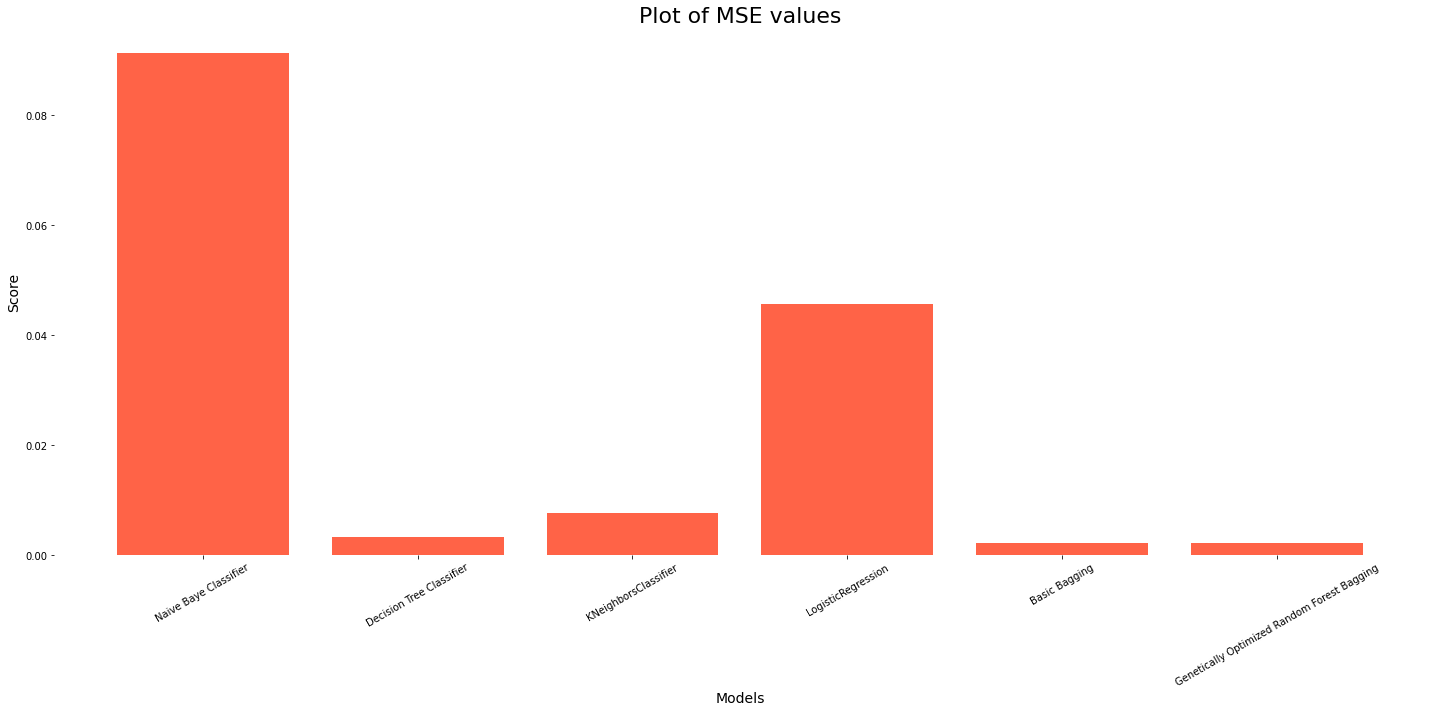

In [ ]:
ticks = modelnames
generate_plot("Plot of MSE values", ticks, resultscore['Mean Square Error'], 2)

### Mean Absolute Error graph

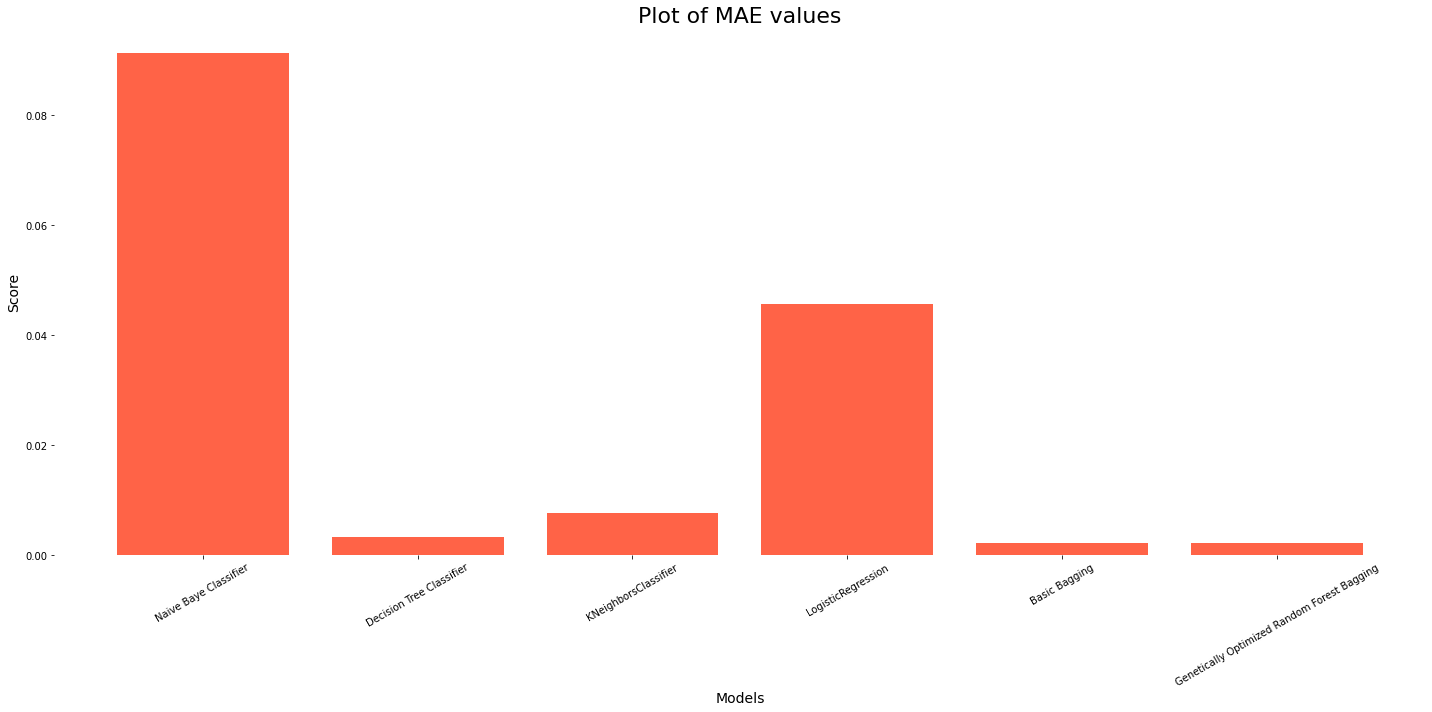

In [ ]:
ticks = modelnames
generate_plot("Plot of MAE values", ticks, resultscore['Mean Absolute Error'], 2)

### Root Square score graph

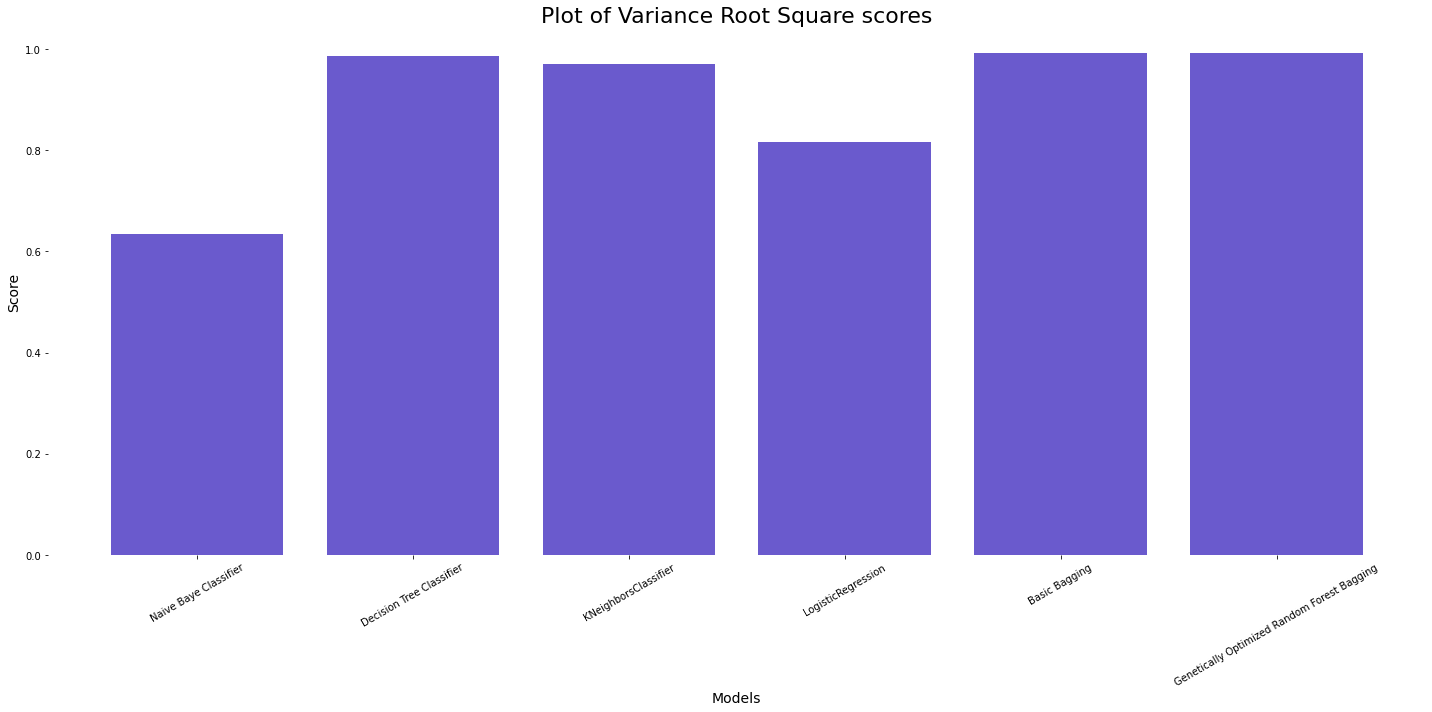

In [ ]:
ticks = modelnames
generate_plot("Plot of Variance Root Square scores", ticks, resultscore['Root2 Score'],0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
# Logistic regression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_test=le.fit_transform(Y_test)
classes= list(le.classes_)
y_pred_prob_lr = BNB_Classifier.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(Y_test, y_pred_prob_lr)

# SVM with rbf
y_pred_prob_SVMrbf = DTC_Classifier.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(Y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(Y_test, y_pred_prob_SVMrbf)

# SVM with linear
y_pred_prob_SVMlinear = KNN_Classifier.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(Y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(Y_test, y_pred_prob_SVMlinear)

# KNN
y_pred_prob_KNN = LGR_Classifier.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(Y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(Y_test, y_pred_prob_KNN)


# Decision Tree
y_pred_prob_Tree = DTC_Classifier.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(Y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(Y_test, y_pred_prob_Tree)

# Random forest
y_pred_prob_rf = KNN_Classifier.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(Y_test, y_pred_prob_rf)


# Naive Bayes

y_pred_prob_nb = Genbagging.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(Y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(Y_test, y_pred_prob_nb)


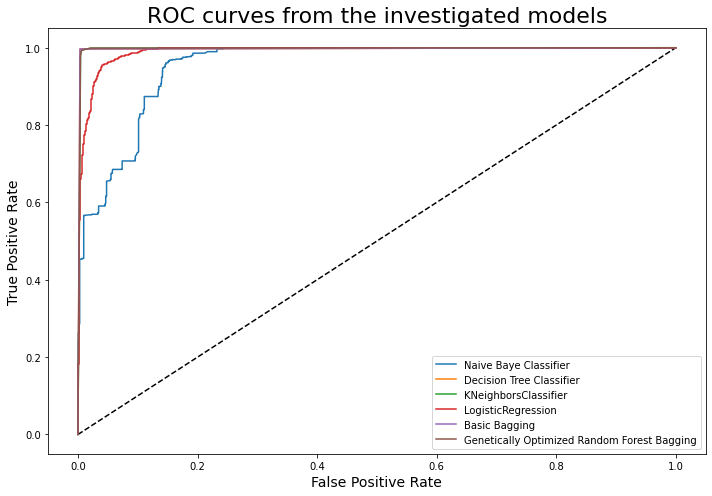

In [ ]:
ticks = ['Naive Baye Classifier','Decision Tree Classifier', 'KNeighborsClassifier','LogisticRegression','Basic Bagging','Genetically Optimized Random Forest Bagging']
# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label=ticks[0] % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label=ticks[1] % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label=ticks[2] % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label=ticks[3] % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label=ticks[4] % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label=ticks[5] % roc_auc_rf)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('ROC curves from the investigated models', fontsize = 22)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/All Features/comparisonrocgraph.png')
plt.show()

# RANDOM FOREST SElECTED FEATURES FITTING MODELS

In [ ]:
X_train=X_train1
Y_train=Y_train1
X_test=X_test1
Y_test=Y_test1
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train);

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
!pip install pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from random import randint
from colorama import init, Fore, Style
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import scikitplot as skplt
import numpy as np
from sklearn.metrics import accuracy_score

def majority_voting_score(X, y, estimators, classes):
    voting_matrix = np.zeros((X.shape[0], len(classes)))
    for estimator in estimators:
        predictions = estimator.predict(X)
        for i in range(X.shape[0]):
            voting_matrix[i, predictions[i]] += 1
    voting_score = classes.take(np.argmax(voting_matrix, axis=1))
    return accuracy_score(y, voting_score)

def get_individual_score(individual, estimators, X, y, classes):
    selected_estimators = [estimator for estimator, isSelected in zip(estimators, individual) if isSelected]
    individual_score = majority_voting_score(X, y, selected_estimators, classes)
    return individual_score

def _get_population_scores(pop_slice, estimators, X, y, classes):
    return [get_individual_score(individual, estimators, X, y, classes) for individual in pop_slice]

class GeneticOptimizer(object):
    """
    Class to wrap evolutionary genetic optimization operations
    """
    def __init__(self,
                 estimators,
                 classes,
                 data,
                 target,
                 val,
                 temp,
                 temp2,
                 pop_size=30,
                 mutation_rate=0.1,
                 crossover_rate=0.9,
                 iterations=1000,
                 elitism=False,
                 n_point_crossover=False,
                 n_jobs=1):
        self.estimators = estimators
        self.classes = classes
        self.X = data
        self.y = target
        self.val = val
        self.y_test=temp2
        self.pop_size = pop_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.iteration = iterations
        self.n_jobs = n_jobs
        self.elitism = elitism
        self.n_point_crossover = n_point_crossover
        self.no_score_change = 0
        self.duplicates_count = 0
        self.y_val=temp
        self.pop_history = []
        self.best_so_far = (0.0, [])
        self.individual_list =[]
        self.best_so_far_generation = 1



        self.__generate_random_population()




    def __generate_random_population(self):

        print("\nGenerating random population")
        print("Population size = %d" % self.pop_size)
        print("Individual size (genes) = %d" % len(self.estimators))
        self.pop = []
        for _ in range(self.pop_size):
            individual = []
            for _ in range(len(self.estimators)):
                individual.append(randint(0, 1))
            self.pop.append(individual)
            self.__update_pop_history(individual)

    def __compute_starts(self):
        n_individuals_per_job = (len(self.pop) // self.n_jobs) * np.ones(self.n_jobs, dtype=np.int)
        n_individuals_per_job[:len(self.pop) % self.n_jobs] += 1
        starts = np.cumsum(n_individuals_per_job)
        return ([0] + starts.tolist())

    def __parallel_score_processing(self):
        starts = self.__compute_starts()
        scores = Parallel(
            n_jobs=self.n_jobs, verbose=0)(
            delayed(_get_population_scores)(self.pop[starts[i]:starts[i + 1]],
                                            self.estimators,
                                            self.X,
                                            self.y,
                                            self.classes) for i in range(self.n_jobs))
        scores = [score for score_list in scores for score in score_list]
        return scores

    def __calculate_fitness_probabilities(self, scores):
        scores_mean = np.mean(scores)
        scores_std = np.std(scores)

        new_scores = [((score + (score - scores_mean) * 1000)**((score - scores_mean)/scores_std)) if ((score + (score - scores_mean) * 1000)**((score - scores_mean)/scores_std)) > 0 else 0.1 for score in scores]
        print("New Score:",new_scores)
        scores_sum = np.sum(new_scores)
        reproduction_prob = [score/scores_sum for score in new_scores]
        return reproduction_prob

    def __generate_child(self, pair, n_point_crossover):
        parent_1 = pair[0]
        parent_2 = pair[1]
        if n_point_crossover:
            n_cuts = randint(1, len(self.estimators) // 2)
            cut_indexes = sorted([randint(1, len(parent_1[1])-2) for i in list(range(n_cuts))] + [0, len(parent_1[1])])
            child_lists = [parent_1[1][cut_indexes[cut_indexes.index(i)-1]:i] if (cut_indexes[1:].index(i) % 2 == 0) else parent_2[1][cut_indexes[cut_indexes.index(i)-1]:i] for i in cut_indexes[1:]]
            child = [e for sublist in child_lists for e in sublist]
        else:
            cut_index = randint(1, len(pair[0][1]) - 2)
            child = parent_1[1][:cut_index] + parent_2[1][cut_index:]
        return child

    def __crossover(self, pair, n_point_crossover, crossover_pop=None):
        if np.random.rand() <= self.crossover_rate:
            child = self.__generate_child(pair, n_point_crossover)
            original_child = child[:]
            while child in self.pop_history:
            # while child in crossover_pop:
                self.children_rejected += 1
                child = self.__soft_mutate(child)
            if original_child != child:
                self.forced_mutations += 1
        else:
            self.skipped_crossover += 1
            r = np.random.rand()
            if r < 0.5:
                child = pair[0][1]
            else:
                child = pair[1][1]
        self.__update_pop_history(child)
        return child

    def __soft_mutate(self, individual):
        index_mutation = randint(0, len(individual) - 1)
        individual[index_mutation] ^= 1
        return individual

    def __mutate(self, individual):
        if np.random.rand() <= self.mutation_rate:
            self.natural_mutations += 1
            n_mutations = randint(1, len(individual) // 2)
            index_history = []
            for _ in range(n_mutations):
                index_mutation = randint(0, len(individual) - 1)
                while index_mutation in index_history:
                    index_mutation = randint(0, len(individual) - 1)
                index_history.append(index_mutation)
                individual[index_mutation] ^= 1
        return individual

    def __random_selection(self, sorted_pop, sel_prob):
        pair_indexes = np.random.choice(len(sorted_pop), 2, replace=False, p=sel_prob).tolist()
        pair = [sorted_pop[pair_indexes[0]], sorted_pop[pair_indexes[1]]]
        while pair[0][1] == pair[1][1]:
            pair_indexes = np.random.choice(len(sorted_pop), 2, replace=False, p=sel_prob).tolist()
            pair = [sorted_pop[pair_indexes[0]], sorted_pop[pair_indexes[1]]]
        return pair

    def __adjust_sel_sensivity(self, sel_sensivity):
        return min(sel_sensivity + (self.no_score_change * 0.010), 0.950)

    def __reproduce_population(self, fitness_prob, n_point_crossover=False, sel_sensivity=None, elitism=False):
        sorted_pop = [pop for _, pop in sorted(zip(fitness_prob, self.pop))]
        sorted_pop = [(idx, ind) for idx, ind in zip(list(range(len(sorted_pop))), sorted_pop)]

        if sel_sensivity:
            sel_sensivity = self.__adjust_sel_sensivity(sel_sensivity)
            print("** sel_sensivity = %f" % sel_sensivity)
            a = np.arange(1, len(sorted_pop) + 1)
            sel_prob = [((sel_sensivity - 1) / ((sel_sensivity**len(a)) - (1))) * (sel_sensivity**(len(a)-i)) for i in a]
        else:
            sel_prob = sorted(fitness_prob)

        if elitism:
            n_promoted = 1
            elite = [e[1][:] for e in sorted_pop[-n_promoted:]]
        else:
            n_promoted = 0

        new_pop = []
        crossover_pop = []

        if elitism:
            for e in elite:
                if e not in self.pop_history:
                    self.__update_pop_history(e)

        for i in range(len(self.pop) - n_promoted):
            pair = self.__random_selection(sorted_pop, sel_prob)
            child = self.__crossover(pair, n_point_crossover, crossover_pop)
            crossover_pop.append(child)

        new_pop = [self.__mutate(individual) for individual in crossover_pop]
        if elitism:
            new_pop += elite
        return new_pop

    def __update_duplicates(self):
        duplicates = dict(Counter([''.join([str(s) for s in i]) for i in self.pop]))
        self.duplicates_count = np.sum([duplicates[k] - 1 for k in duplicates.keys()])

    def __get_population_diversity(self):
        return ((len(self.pop) - self.duplicates_count) / len(self.pop))

    def __rank_population(self):
        scores = self.__parallel_score_processing()
        sorted_pop = [individual for _, individual in sorted(zip(scores, self.pop), reverse=True)]
        return sorted_pop, scores

    def __remove_outperformers(self, scores):
        mean_score = np.mean(scores)
        i = 0
        new_pop = []
        for individual in self.pop:
            if scores[i] < mean_score:
                new_individual = []
                for _ in range(len(self.estimators)):
                    new_individual.append(randint(0, 1))
                self.pop[i] = new_individual
            i += 1


    def __calculate_population_stats(self, initial_score, prev_score):
        sorted_pop, scores = self.__rank_population()
        best_individual = sorted_pop[0]
        best_score = get_individual_score(best_individual, self.estimators, self.X, self.y, self.classes)
        improvement = False
        if best_score > self.best_so_far[0]:
            improvement = True
            self.best_so_far = (best_score, best_individual)
            self.best_so_far_generation = self.global_step
        score_diff = (best_score - initial_score) * 100
        if best_score > prev_score:
            self.no_score_change = 0
            print("Best in population: " + Fore.GREEN + Style.BRIGHT + "%f%%" % (best_score * 100) + Style.RESET_ALL + " (%f%%)" % (score_diff) + " (%d) " % self.no_score_change)
        elif best_score < prev_score:
            print("Best in population: " + Fore.RED + Style.BRIGHT + "%f%%" % (best_score * 100) + Style.RESET_ALL + " (%f%%)" % (score_diff) + " (%d) " % self.no_score_change)
        else:
            self.no_score_change += 1
            print("Best in population: " + Fore.CYAN + Style.BRIGHT + "%f%%" % (best_score * 100) + Style.RESET_ALL + " (%f%%)" % (score_diff) + " (%d) " % self.no_score_change)

        print("Average score:      %f%%" % (np.mean(scores) * 100))
        print("Standard dev.:       %f%%" % (np.std(scores) * 100))
        pop_diversity = self.__get_population_diversity()
        print("Chromossomes:       %d" % len(self.pop_history))
        print("Pop. diversity:     %.2f%%" % (pop_diversity * 100) + " (%d duplicates)" % self.duplicates_count)
        # print("Best score so far:  %f%%" % (self.best_so_far[0] * 100) + " (%f%%)" % ((self.best_so_far[0] - initial_score)*100))

        if improvement:
            print("Best score so far:  " + Fore.GREEN + Style.BRIGHT + "%f%%" % (self.best_so_far[0] * 100) + Style.RESET_ALL + " (%f%%)" % ((self.best_so_far[0] - initial_score)*100) + " (%d) " % self.best_so_far_generation)
        else:
            if best_individual:
                print("Best score so far:  " + Fore.CYAN + Style.BRIGHT + "%f%%" % (self.best_so_far[0] * 100) + Style.RESET_ALL + " (%f%%)" % ((self.best_so_far[0] - initial_score)*100) + " (%d) " % self.best_so_far_generation)
            else:
                print("Accurate")
        print("Score (validation): %f%%" % ((self.best_so_far[0] - self.val[0]) * 100))


        # self.__remove_outperformers(scores)

        return best_score, scores, best_individual

    def __update_pop_history(self, individual):
        self.pop_history += [individual]

    def run_genetic_evolution(self):
        # self.weights = get_weights(self.X, self.y, self.estimators, self.classes)
        initial_score = majority_voting_score(self.X, self.y, self.estimators, self.classes)
        print("\nInitial score = %f%%" % (initial_score * 100))
        self.best_so_far = (initial_score, [])
        # input()
        prev_score = 0

        print("\n________________________________________________________________________________")
        print("Generation: 0")
        scores = self.__parallel_score_processing()
        #plt.ion()  # something about plotting
        #x = np.linspace(*self.y, 200)
        #print("x",x)
        #plt.plot(x, F(x))

        fitness_list=list()
        individual_list=list()
        for i in range(self.iteration):

            try:
                fitness_prob = self.__calculate_fitness_probabilities(scores)
                fitness_list.append(fitness_prob)
                print("\nReproducing population...        ")
                self.natural_mutations = 0
                self.forced_mutations = 0
                self.skipped_crossover = 0
                self.children_rejected = 0
                self.global_step = i


                # self.pop = self.__reproduce_population(fitness_prob, sel_sensivity=0.95, elitism=True)
                self.pop = self.__reproduce_population(fitness_prob, n_point_crossover=self.n_point_crossover, elitism=self.elitism)
                self.__update_duplicates()
                print("Natural mutations: %d" % (self.natural_mutations) + " (%.2f%%)" % ((self.natural_mutations / len(self.pop)) * 100))
                print("Forced mutations:  %d" % (self.forced_mutations) + " (%.2f%%)" % ((self.forced_mutations / len(self.pop)) * 100))
                print("Skipped crossover: %d" % (self.skipped_crossover) + " (%.2f%%)" % ((self.skipped_crossover / len(self.pop)) * 100))
                print("Children rejected: %d" % (self.children_rejected))

                print("\nCalculating statistics...   ")
                prev_score, scores, best_individual = self.__calculate_population_stats(initial_score, prev_score)
                individual_list.append(best_individual)
               # skplt.metrics.plot_confusion_matrix(
                #    self.y_val,
                #    best_individual,
                #    figsize=(10, 6), title="Confusion matrix\n after Gentic optimization")
                #plt.xlim(-0.5, len(np.unique(self.y_val)) - 0.5)
                #plt.ylim(len(np.unique(self.y_val)) - 0.5, -0.5)
                #plt.show()


                print("\n")
                print("Generation: %d" % (i + 1))
            except KeyboardInterrupt:
                break


        self.individual_list=np.asarray(individual_list)
        print("Best individual shape:",len(individual_list))

        print("\n\n\n================================================================================")
        print("\nFinished genetic optimization")

        print("\n\n=======================================================================")
        print("Optimization  Results")
        print("=======================================================================")

        return self.best_so_far, initial_score


In [ ]:

import numpy as np
import string
import pickle
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
import sys
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier  # For Classification
from sklearn.ensemble import GradientBoostingRegressor  # For Regression

import seaborn as sns
import numpy
import math
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
numpy.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 2000)

import numpy as np
from sklearn.metrics import accuracy_score

def majority_voting_score(X, y, estimators, classes):
    voting_matrix = np.zeros((X.shape[0], len(classes)))
    for estimator in estimators:
        predictions = estimator.predict(X)
        for i in range(X.shape[0]):
            voting_matrix[i, predictions[i]] += 1
    voting_score = classes.take(np.argmax(voting_matrix, axis=1))
    return accuracy_score(y, voting_score)


X_train= X_train
y_train= Y_train
X_test= X_test
X_val = X_test
y_test=Y_test
y_val=Y_test
n_estimators = 10
pop_size = n_estimators // 2
iterations = 20
mutation_rate = 0.1
crossover_rate = 1
n_jobs = 8
elitism = True
n_point_crossover = False

max_samples_ratio = 0.9
print("\nGenerating estimators from Bagging method...")
#bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)
bagging.fit(X_train, y_train)
predictions = bagging.predict(X_test)
basicbagging=bagging
print("Bagging Score:", bagging.score)
val_initial_score= 80
gen_opt = GeneticOptimizer(estimators=bagging.estimators_,
                           classes=bagging.classes_,
                           data=X_test,
                           target=y_test,
                           val=(val_initial_score, X_val, y_val),
                           pop_size=pop_size,
                           mutation_rate=mutation_rate,
                           crossover_rate=crossover_rate,
                           iterations=iterations,
                           elitism=elitism,
                           n_point_crossover=n_point_crossover,
                           n_jobs=n_jobs,
                           temp=y_val,temp2=y_test)

best_found, test_initial_score= gen_opt.run_genetic_evolution()

print()
print("Best individual score found: %f%% (Gain: %f%%)" % (best_found[0] * 100, (best_found[0] - test_initial_score) * 100))
# print("Estimators combination for the best score:")
# print(best_found[1])
print("Number of estimators: %d" % (len([estimator for estimator in best_found[1] if estimator])))

print("\nTesting best combination on validation set...")
final_score = get_individual_score(best_found[1], bagging.estimators_, X_val, y_val, bagging.classes_)
print("Final score: %f%% (Gain: %f%%)" % (final_score * 100, (final_score - val_initial_score) * 100))

filename = 'optimized_model_%d.ens' % int(time.time())
pickle.dump((bagging, best_found[1]), open(filename, 'wb'))
print("\nSaved optimized model as [%s]" % filename)
Genbagging=bagging
print("\n================================================================================")


Generating estimators from Bagging method...
Bagging Score: <bound method ClassifierMixin.score of BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.9)>

Generating random population
Population size = 5
Individual size (genes) = 10

Initial score = 99.655994%

________________________________________________________________________________
Generation: 0
New Score: [1.0038888319829689, 1.0828505105514263, 1.0828505105514263, 1.6114288723768833, 1.0828505105514263]

Reproducing population...        
Natural mutations: 1 (20.00%)
Forced mutations:  0 (0.00%)
Skipped crossover: 0 (0.00%)
Children rejected: 0

Calculating statistics...   
Best in population: 99.669225% (0.013231%) (0) 
Average score:      99.653347%
Standard dev.:       0.015430%
Chromossomes:       9
Pop. diversity:     100.00% (0 duplicates)
Best score so far:  99.669225% (0.013231%) (0) 
Score (validation): -7900.330775%


Generation: 1
New Score: [1.1603151971728236, 1.5332318796256799, 1.0827401

In [ ]:
test_initial_score

0.9965599364911352

In [ ]:
Basicbagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)
Basicbagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.9)

In [ ]:
import joblib

def save_model(model,modelname):
  model_path = '/content/drive/MyDrive/NetworkTrafficData/model/'
  modelfilename=modelname+'_model.sav'
  joblib.dump(model, model_path+modelfilename)

save_model(KNN_Classifier,'KNN_Classifier')
save_model(LGR_Classifier,'LGR_Classifier')
save_model(BNB_Classifier, 'BNB_Classifier')
save_model(DTC_Classifier , 'DTC_Classifier')
save_model(Basicbagging, 'Basic_Bagging')
save_model(Genbagging, 'Genetic_Bagging')

# EVALUATE MODELS

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

def mlresults(modelname ,v, y_test,pred,X_test):
  scores = cross_val_score(v, X_test, Y_test, cv=10)
  le = preprocessing.LabelEncoder()
  target=le.fit_transform(y_test)
  predicted = le.fit_transform(pred)
  accuracy = metrics.accuracy_score(target, predicted)
  confusion_matrix = metrics.confusion_matrix(target, predicted)
  print('============================== {} Model Test Results =============================='.format(modelname))
  print()
  # Plot ROC curve
  plt.figure(figsize=(15,15))
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(y_test))
  cm_display.plot()
  plt.title('Confusion Matrix of '+modelname, fontsize = 16)
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Random Forest Selected Features/Confusion Matrix/'+modelname+'confusionmatrixgraph.png')
  plt.show()
  y_pred_prob_lr = BNB_Classifier.predict_proba(X_test)[:,1]
  fpr_lr, tpr_lr, thresholds_lr = roc_curve(target, y_pred_prob_lr)
  roc_auc_lr = auc(fpr_lr, tpr_lr)
  precision_lr, recall_lr, th_lr = precision_recall_curve(target, y_pred_prob_lr)
  # Plot ROC curve
  plt.figure(figsize=(15,10))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_lr, tpr_lr, label=modelname % roc_auc_lr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves from the '+modelname, fontsize = 22)
  plt.legend(loc='best')
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Random Forest Selected Features/Rocs of Models/'+modelname+'rocgraph.png')
  plt.show()
  classification = metrics.classification_report(target, predicted)
  accuracy = metrics.accuracy_score(target, predicted)
  mse=mean_squared_error(target, predicted)
  mae = metrics.mean_absolute_error(target, predicted)
  rs=r2_score(target, predicted)
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Mean squared error: ", mse)
  print()
  print('Variance score: %.2f' % rs)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification)

  return scores.mean(),accuracy,mse,mae,rs

============================== Naive Baye Classifier Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

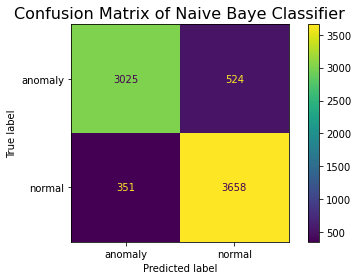

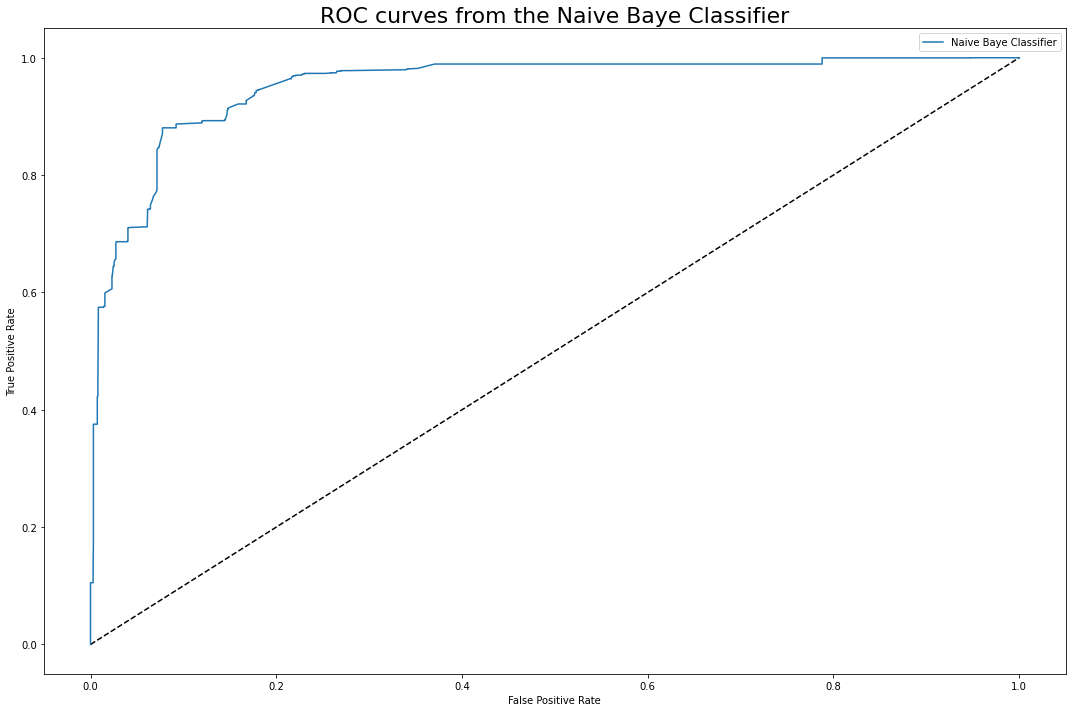

Cross Validation Mean Score:
 0.8798601913171449

Model Accuracy:
 0.8842286319132046

Mean squared error:  0.11577136808679545

Variance score: 0.54

Confusion matrix:
 [[3025  524]
 [ 351 3658]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      3549
           1       0.87      0.91      0.89      4009

    accuracy                           0.88      7558
   macro avg       0.89      0.88      0.88      7558
weighted avg       0.88      0.88      0.88      7558

============================== Decision Tree Classifier Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

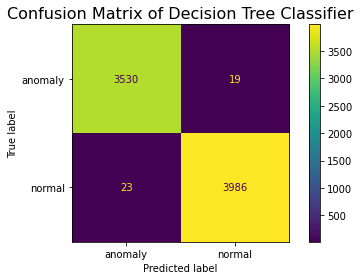

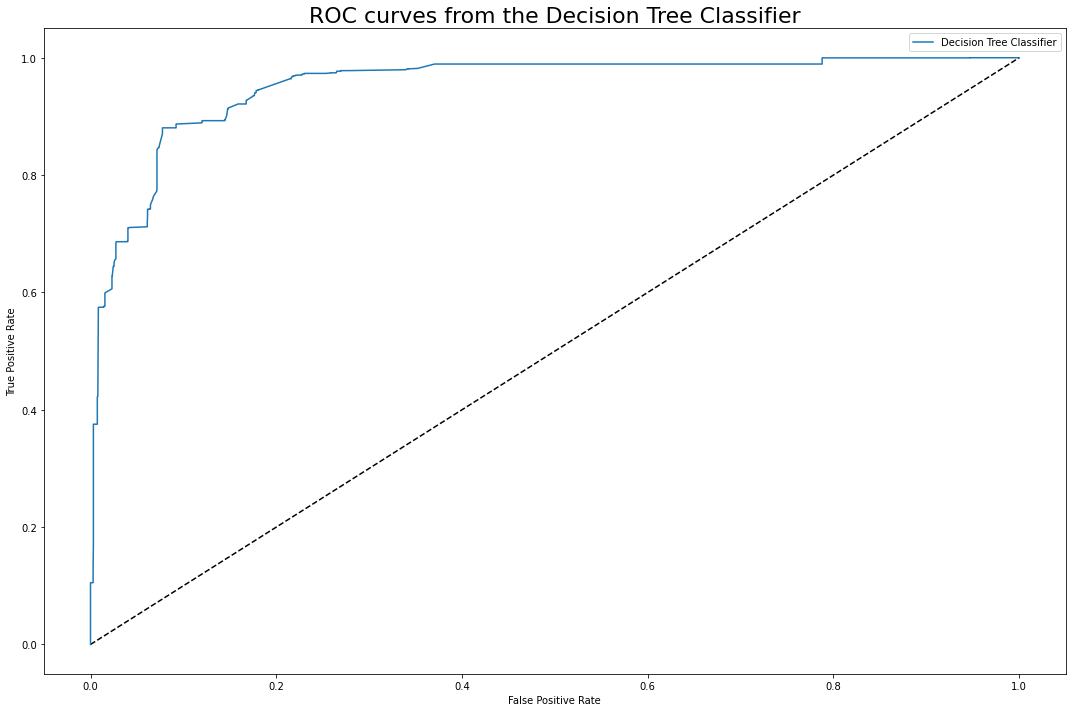

Cross Validation Mean Score:
 0.990077087494306

Model Accuracy:
 0.9944429743318338

Mean squared error:  0.005557025668166181

Variance score: 0.98

Confusion matrix:
 [[3530   19]
 [  23 3986]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3549
           1       1.00      0.99      0.99      4009

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

============================== KNeighborsClassifier Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

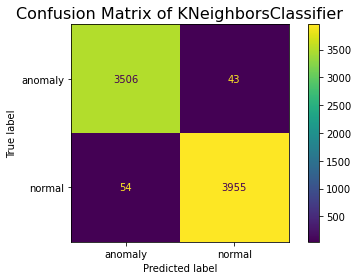

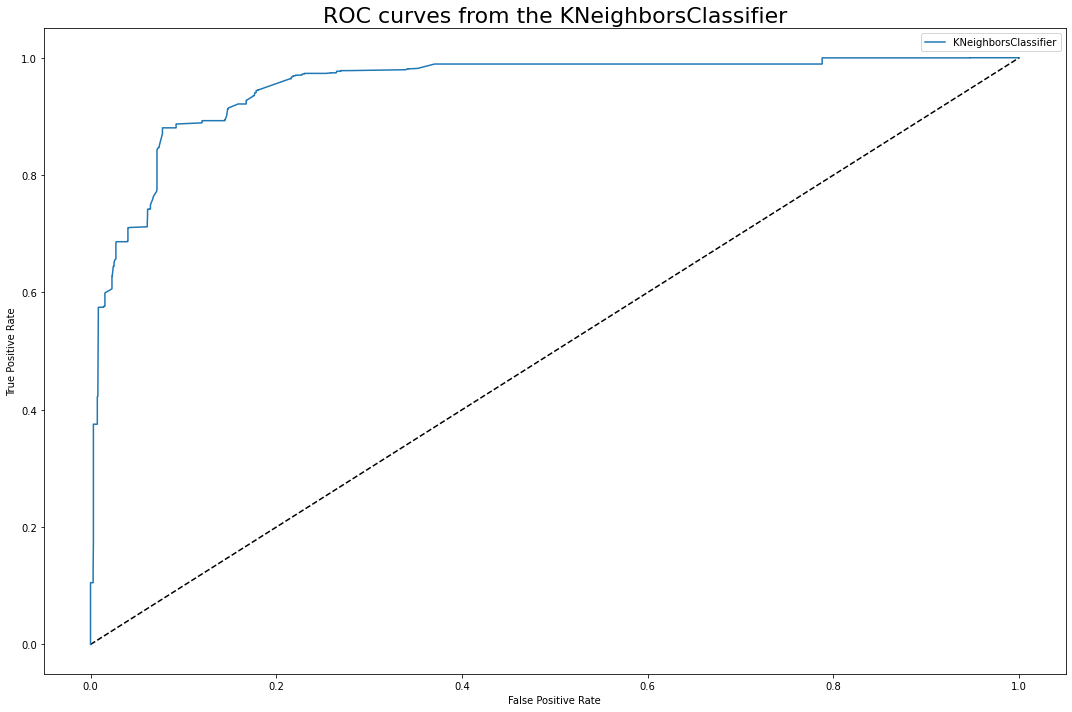

Cross Validation Mean Score:
 0.98174060058166

Model Accuracy:
 0.9871659169092353

Mean squared error:  0.012834083090764753

Variance score: 0.95

Confusion matrix:
 [[3506   43]
 [  54 3955]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3549
           1       0.99      0.99      0.99      4009

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

============================== LogisticRegression Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

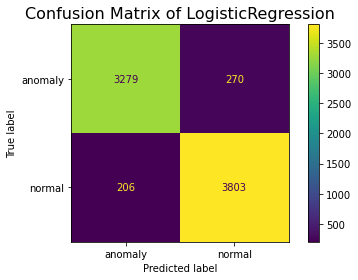

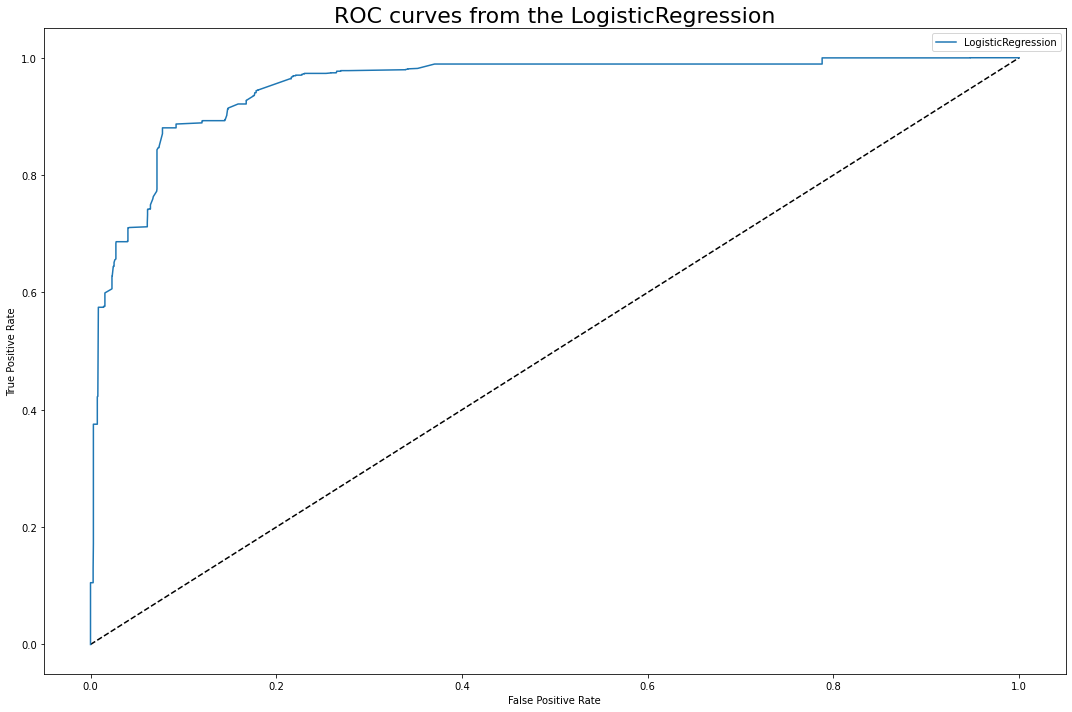

Cross Validation Mean Score:
 0.9360942920214443

Model Accuracy:
 0.9370203757607832

Mean squared error:  0.06297962423921673

Variance score: 0.75

Confusion matrix:
 [[3279  270]
 [ 206 3803]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      3549
           1       0.93      0.95      0.94      4009

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558

============================== Basic Bagging Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

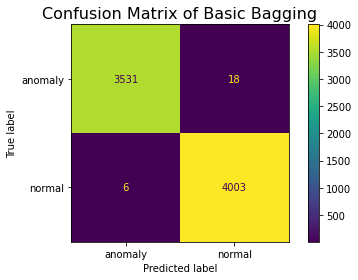

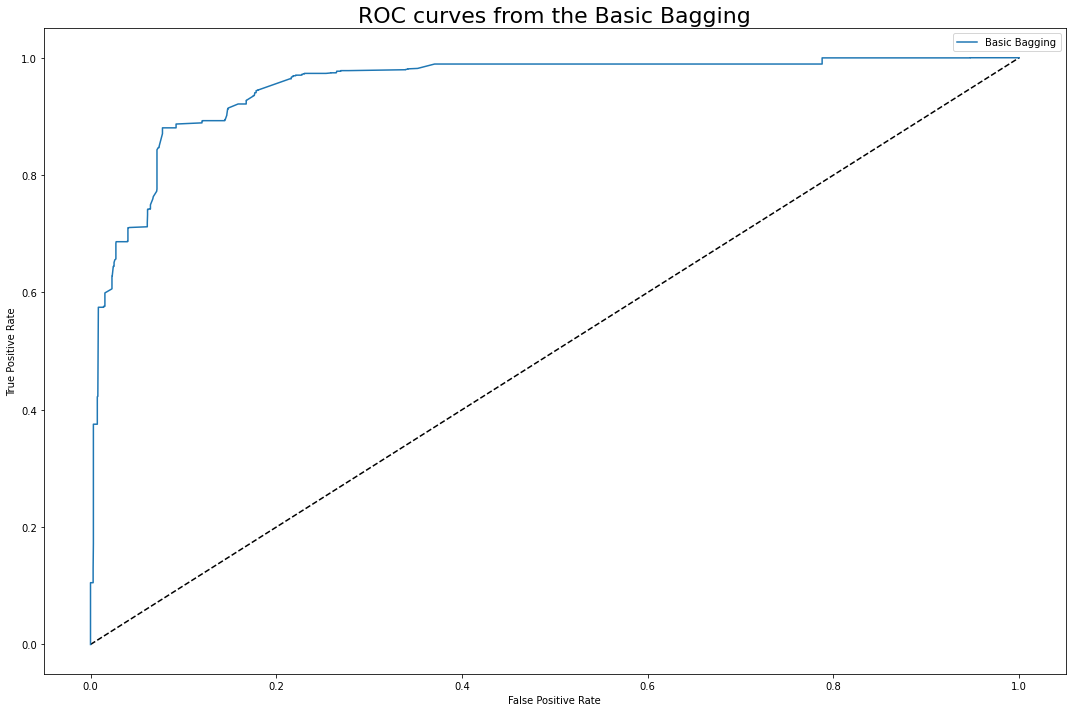

Cross Validation Mean Score:
 0.9933844913977363

Model Accuracy:
 0.9968245567610479

Mean squared error:  0.0031754432389521038

Variance score: 0.99

Confusion matrix:
 [[3531   18]
 [   6 4003]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3549
           1       1.00      1.00      1.00      4009

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

============================== Genetically Optimized Random Forest Bagging Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

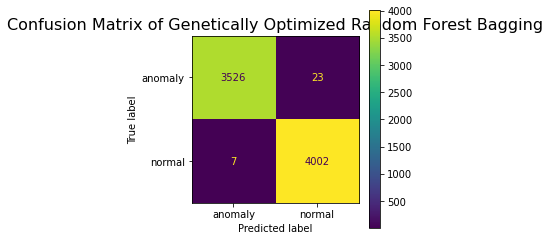

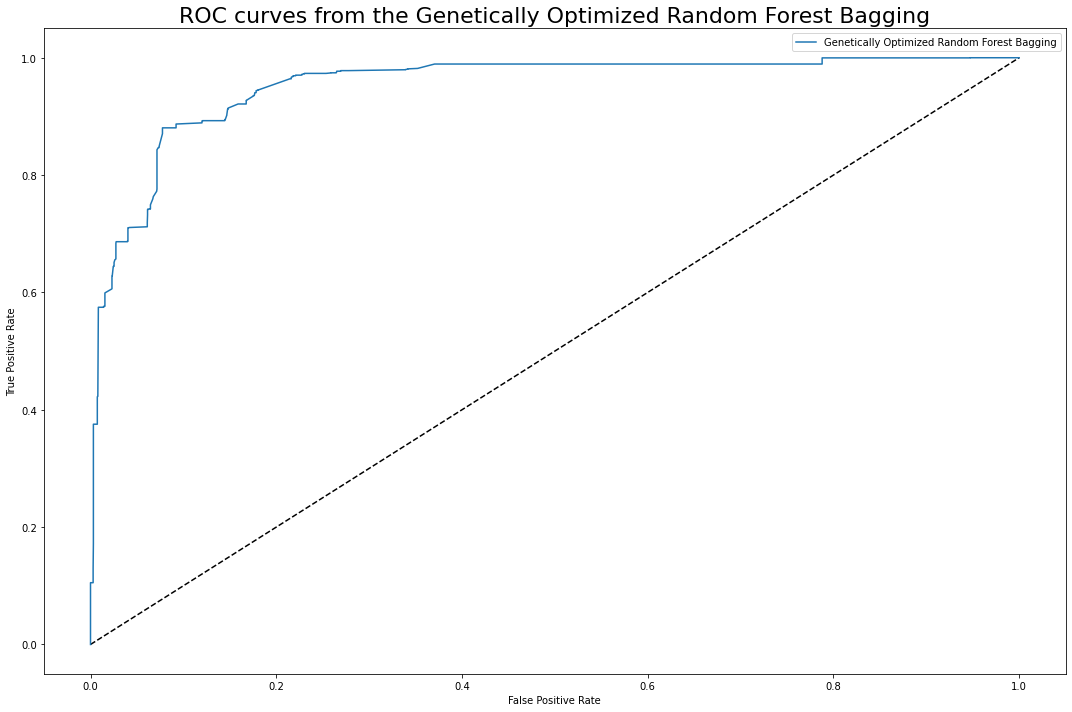

Cross Validation Mean Score:
 0.9931197659343356

Model Accuracy:
 0.9960306959513099

Mean squared error:  0.00396930404869013

Variance score: 0.98

Confusion matrix:
 [[3526   23]
 [   7 4002]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3549
           1       0.99      1.00      1.00      4009

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [ ]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('Basic Bagging', Basicbagging))
models.append(('Genetically Optimized Random Forest Bagging', Genbagging ))
accuracy_score=list()
mse_values=list()
variance_score=list()
modelnames= list()
resultscore=pd.DataFrame(columns=['Model','Cross Validation Score','Accuracy','Mean Square Error','Mean Absolute Error','Root2 Score'])
j=0
for i, v in models:
    scores,accuracy,mse,mae,rs=mlresults(i,v, Y_test,v.predict(X_test),X_test)
    accuracy_score.append(accuracy)
    mse_values.append(mse)
    variance_score.append(rs)
    resultscore.loc[j] =[i,scores,accuracy,mse,mae,rs]
    j=j+1
    modelnames.append(i)

In [ ]:
resultscore.to_csv('/content/drive/MyDrive/NetworkTrafficData/Results/Random Forest Selected Features/Resulttable.csv')
resultscore

Model  Cross Validation Score  Accuracy  Mean Square Error  Mean Absolute Error  Root2 Score
0                        Naive Baye Classifier                0.879860  0.884229           0.115771             0.115771     0.535193
1                     Decision Tree Classifier                0.990077  0.994443           0.005557             0.005557     0.977689
2                         KNeighborsClassifier                0.981741  0.987166           0.012834             0.012834     0.948473
3                           LogisticRegression                0.936094  0.937020           0.062980             0.062980     0.747145
4                                Basic Bagging                0.993384  0.996825           0.003175             0.003175     0.987251
5  Genetically Optimized Random Forest Bagging                0.993120  0.996031           0.003969             0.003969     0.984064

### Function for genesentiments the graph

In [ ]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(20, 10))

    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.ylabel('Score', size=14)
    plt.xlabel('Models', size=14)
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Random Forest Selected Features/'+title+'graph.png')

### Cross Validation Score

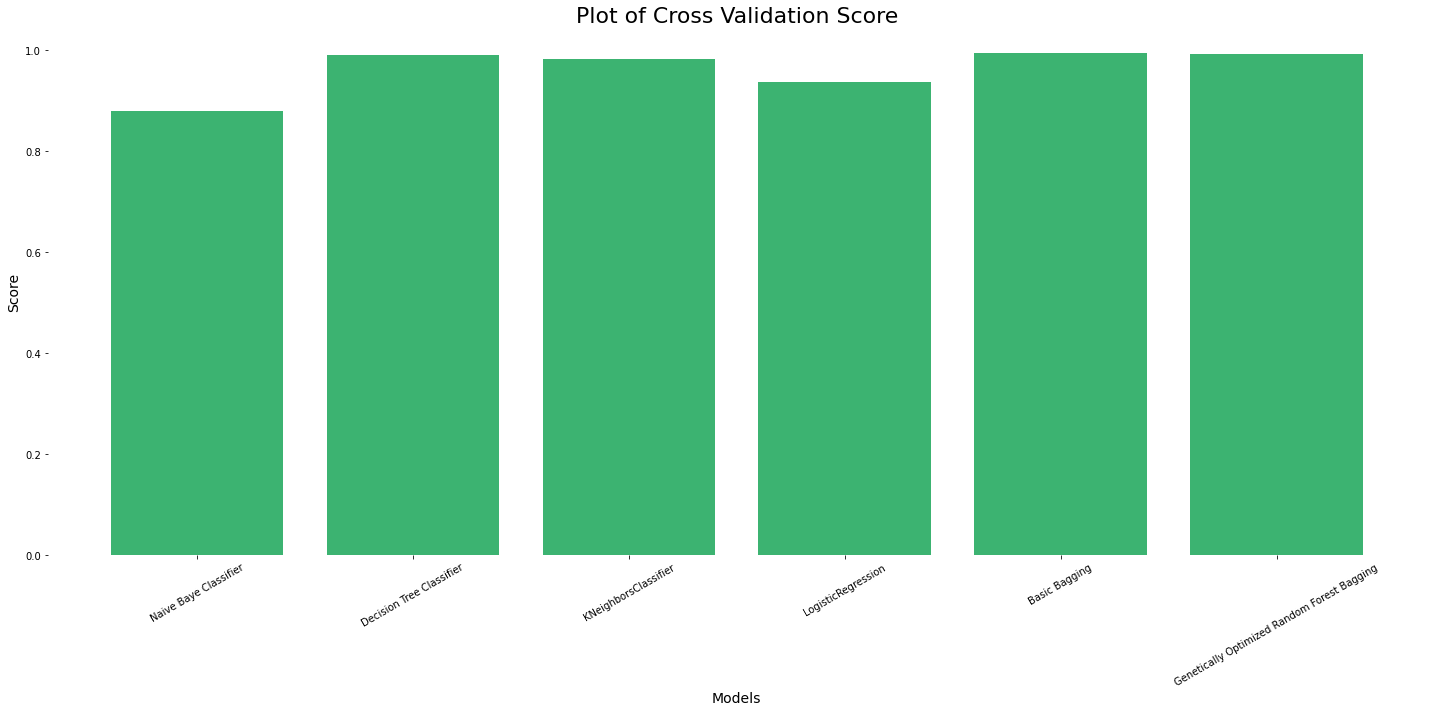

In [ ]:
ticks = modelnames
generate_plot("Plot of Cross Validation Score", ticks, resultscore['Cross Validation Score'], 1)

### Accuracy graph

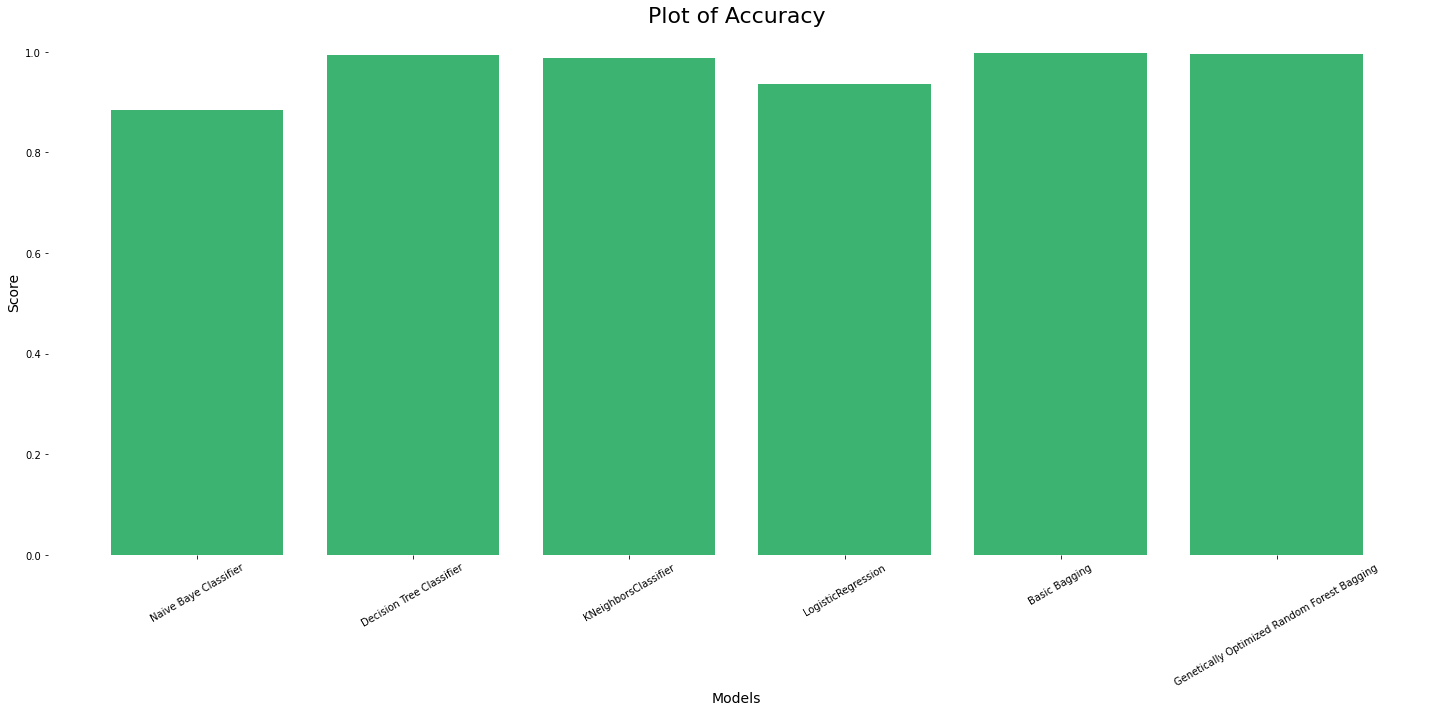

In [ ]:
ticks = modelnames
generate_plot("Plot of Accuracy", ticks, resultscore['Accuracy'], 1)

### Mean squared error graph

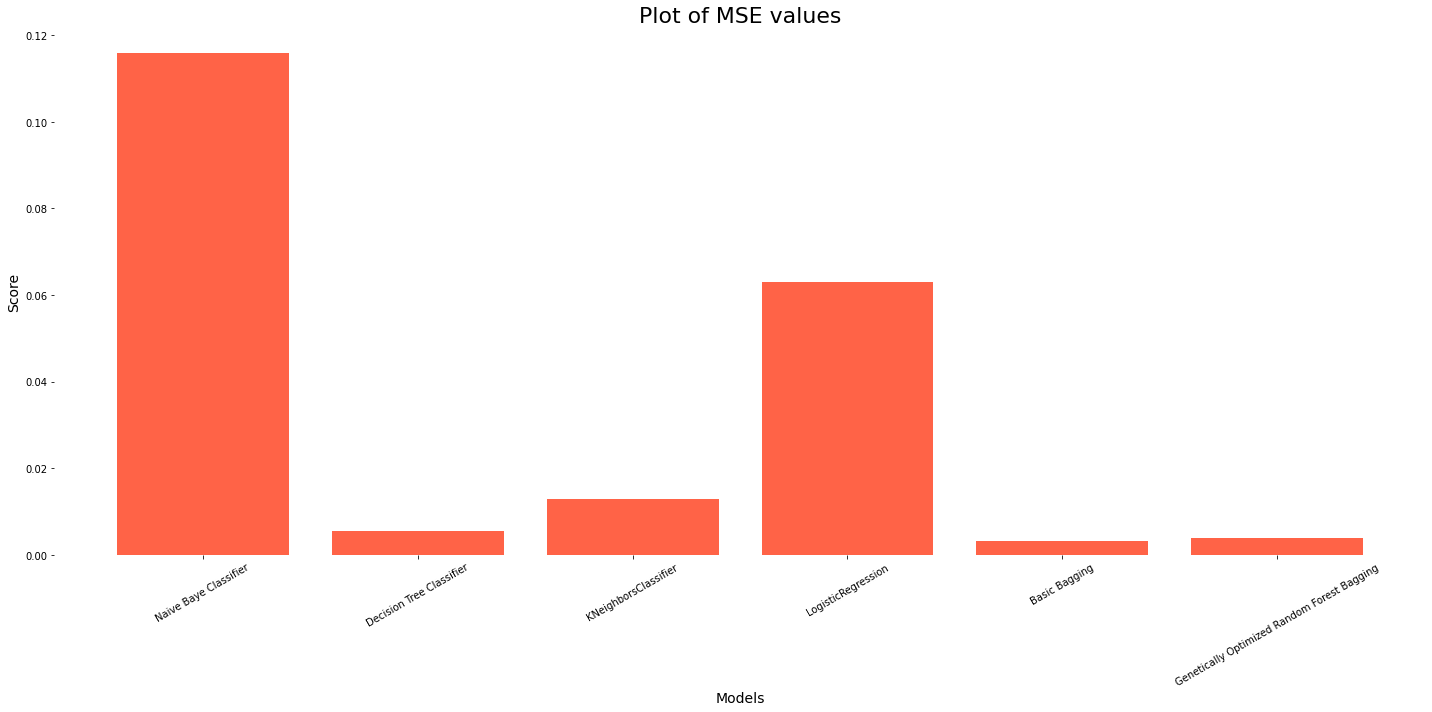

In [ ]:
ticks = modelnames
generate_plot("Plot of MSE values", ticks, resultscore['Mean Square Error'], 2)

### Mean Absolute Error graph

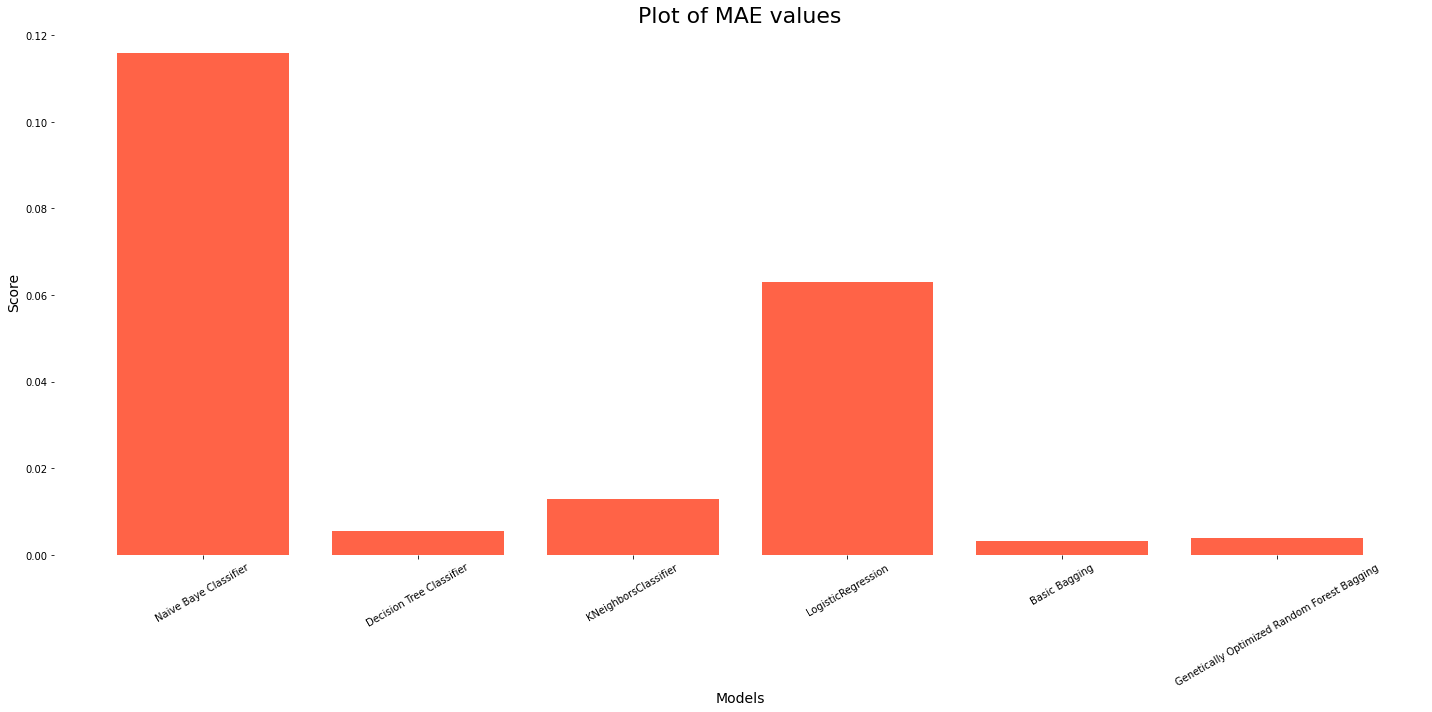

In [ ]:
ticks = modelnames
generate_plot("Plot of MAE values", ticks, resultscore['Mean Absolute Error'], 2)

### Root Square score graph

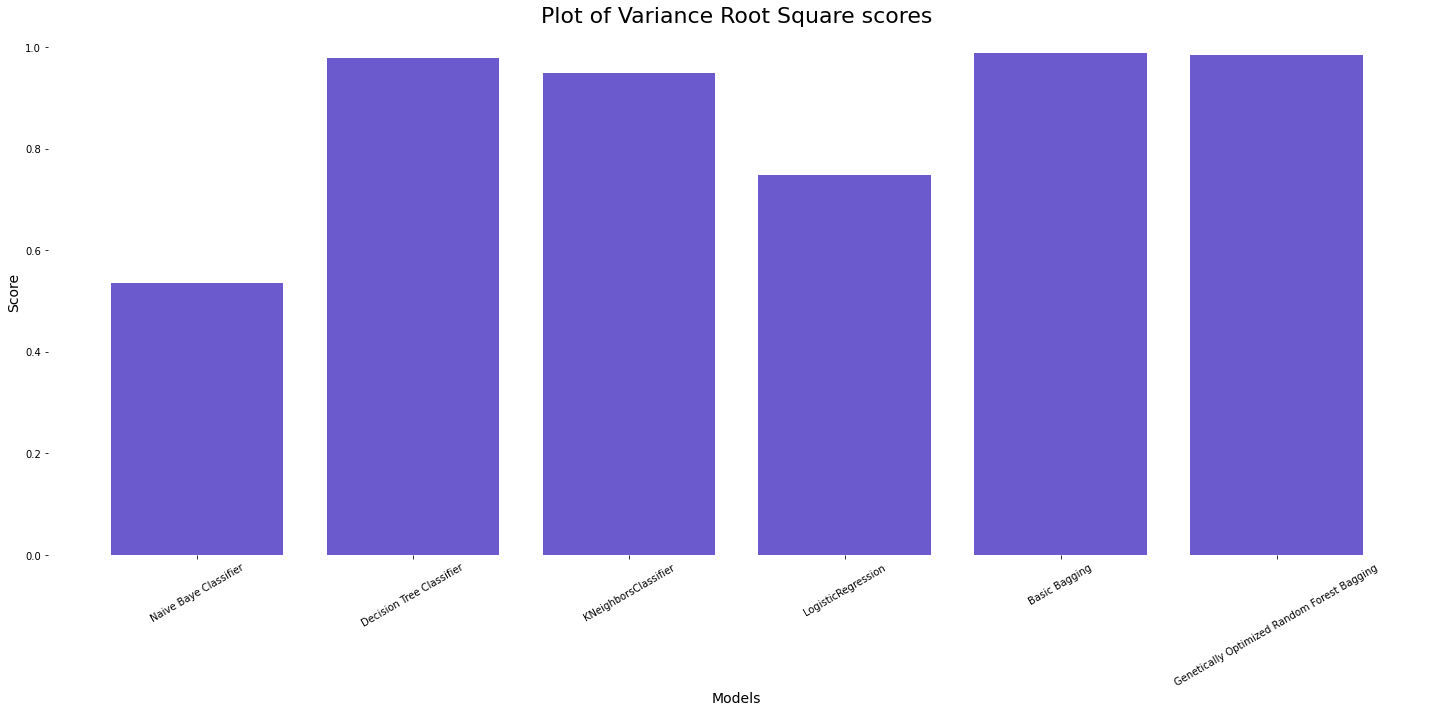

In [ ]:
ticks = modelnames
generate_plot("Plot of Variance Root Square scores", ticks, resultscore['Root2 Score'],0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
# Logistic regression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_test=le.fit_transform(Y_test)
classes= list(le.classes_)
y_pred_prob_lr = BNB_Classifier.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(Y_test, y_pred_prob_lr)

# SVM with rbf
y_pred_prob_SVMrbf = DTC_Classifier.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(Y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(Y_test, y_pred_prob_SVMrbf)

# SVM with linear
y_pred_prob_SVMlinear = KNN_Classifier.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(Y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(Y_test, y_pred_prob_SVMlinear)

# KNN
y_pred_prob_KNN = LGR_Classifier.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(Y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(Y_test, y_pred_prob_KNN)


# Decision Tree
y_pred_prob_Tree = DTC_Classifier.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(Y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(Y_test, y_pred_prob_Tree)

# Random forest
y_pred_prob_rf = KNN_Classifier.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(Y_test, y_pred_prob_rf)


# Naive Bayes

y_pred_prob_nb = Genbagging.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(Y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(Y_test, y_pred_prob_nb)


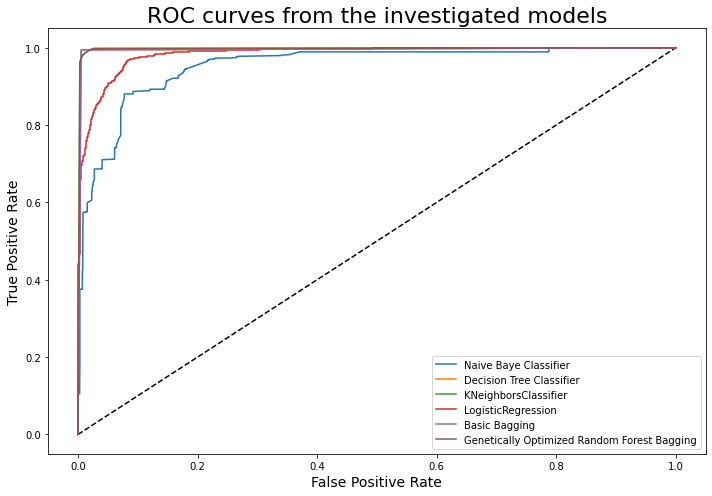

In [ ]:
ticks = ['Naive Baye Classifier','Decision Tree Classifier', 'KNeighborsClassifier','LogisticRegression','Basic Bagging','Genetically Optimized Random Forest Bagging']
# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label=ticks[0] % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label=ticks[1] % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label=ticks[2] % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label=ticks[3] % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label=ticks[4] % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label=ticks[5] % roc_auc_rf)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('ROC curves from the investigated models', fontsize = 22)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Random Forest Selected Features/comparisonrocgraph.png')
plt.show()

# CORRELATION MATRIX SElECTED FEATURES FITTING MODELS

In [ ]:
X_train=X_train2
Y_train=Y_train2
X_test=X_test2
Y_test=Y_test2
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train);

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
!pip install pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from random import randint
from colorama import init, Fore, Style
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import scikitplot as skplt
import numpy as np
from sklearn.metrics import accuracy_score

def majority_voting_score(X, y, estimators, classes):
    voting_matrix = np.zeros((X.shape[0], len(classes)))
    for estimator in estimators:
        predictions = estimator.predict(X)
        for i in range(X.shape[0]):
            voting_matrix[i, predictions[i]] += 1
    voting_score = classes.take(np.argmax(voting_matrix, axis=1))
    return accuracy_score(y, voting_score)

def get_individual_score(individual, estimators, X, y, classes):
    selected_estimators = [estimator for estimator, isSelected in zip(estimators, individual) if isSelected]
    individual_score = majority_voting_score(X, y, selected_estimators, classes)
    return individual_score

def _get_population_scores(pop_slice, estimators, X, y, classes):
    return [get_individual_score(individual, estimators, X, y, classes) for individual in pop_slice]

class GeneticOptimizer(object):
    """
    Class to wrap evolutionary genetic optimization operations
    """
    def __init__(self,
                 estimators,
                 classes,
                 data,
                 target,
                 val,
                 temp,
                 temp2,
                 pop_size=30,
                 mutation_rate=0.1,
                 crossover_rate=0.9,
                 iterations=1000,
                 elitism=False,
                 n_point_crossover=False,
                 n_jobs=1):
        self.estimators = estimators
        self.classes = classes
        self.X = data
        self.y = target
        self.val = val
        self.y_test=temp2
        self.pop_size = pop_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.iteration = iterations
        self.n_jobs = n_jobs
        self.elitism = elitism
        self.n_point_crossover = n_point_crossover
        self.no_score_change = 0
        self.duplicates_count = 0
        self.y_val=temp
        self.pop_history = []
        self.best_so_far = (0.0, [])
        self.individual_list =[]
        self.best_so_far_generation = 1



        self.__generate_random_population()




    def __generate_random_population(self):

        print("\nGenerating random population")
        print("Population size = %d" % self.pop_size)
        print("Individual size (genes) = %d" % len(self.estimators))
        self.pop = []
        for _ in range(self.pop_size):
            individual = []
            for _ in range(len(self.estimators)):
                individual.append(randint(0, 1))
            self.pop.append(individual)
            self.__update_pop_history(individual)

    def __compute_starts(self):
        n_individuals_per_job = (len(self.pop) // self.n_jobs) * np.ones(self.n_jobs, dtype=np.int)
        n_individuals_per_job[:len(self.pop) % self.n_jobs] += 1
        starts = np.cumsum(n_individuals_per_job)
        return ([0] + starts.tolist())

    def __parallel_score_processing(self):
        starts = self.__compute_starts()
        scores = Parallel(
            n_jobs=self.n_jobs, verbose=0)(
            delayed(_get_population_scores)(self.pop[starts[i]:starts[i + 1]],
                                            self.estimators,
                                            self.X,
                                            self.y,
                                            self.classes) for i in range(self.n_jobs))
        scores = [score for score_list in scores for score in score_list]
        return scores

    def __calculate_fitness_probabilities(self, scores):
        scores_mean = np.mean(scores)
        scores_std = np.std(scores)

        new_scores = [((score + (score - scores_mean) * 1000)**((score - scores_mean)/scores_std)) if ((score + (score - scores_mean) * 1000)**((score - scores_mean)/scores_std)) > 0 else 0.1 for score in scores]
        print("New Score:",new_scores)
        scores_sum = np.sum(new_scores)
        reproduction_prob = [score/scores_sum for score in new_scores]
        return reproduction_prob

    def __generate_child(self, pair, n_point_crossover):
        parent_1 = pair[0]
        parent_2 = pair[1]
        if n_point_crossover:
            n_cuts = randint(1, len(self.estimators) // 2)
            cut_indexes = sorted([randint(1, len(parent_1[1])-2) for i in list(range(n_cuts))] + [0, len(parent_1[1])])
            child_lists = [parent_1[1][cut_indexes[cut_indexes.index(i)-1]:i] if (cut_indexes[1:].index(i) % 2 == 0) else parent_2[1][cut_indexes[cut_indexes.index(i)-1]:i] for i in cut_indexes[1:]]
            child = [e for sublist in child_lists for e in sublist]
        else:
            cut_index = randint(1, len(pair[0][1]) - 2)
            child = parent_1[1][:cut_index] + parent_2[1][cut_index:]
        return child

    def __crossover(self, pair, n_point_crossover, crossover_pop=None):
        if np.random.rand() <= self.crossover_rate:
            child = self.__generate_child(pair, n_point_crossover)
            original_child = child[:]
            while child in self.pop_history:
            # while child in crossover_pop:
                self.children_rejected += 1
                child = self.__soft_mutate(child)
            if original_child != child:
                self.forced_mutations += 1
        else:
            self.skipped_crossover += 1
            r = np.random.rand()
            if r < 0.5:
                child = pair[0][1]
            else:
                child = pair[1][1]
        self.__update_pop_history(child)
        return child

    def __soft_mutate(self, individual):
        index_mutation = randint(0, len(individual) - 1)
        individual[index_mutation] ^= 1
        return individual

    def __mutate(self, individual):
        if np.random.rand() <= self.mutation_rate:
            self.natural_mutations += 1
            n_mutations = randint(1, len(individual) // 2)
            index_history = []
            for _ in range(n_mutations):
                index_mutation = randint(0, len(individual) - 1)
                while index_mutation in index_history:
                    index_mutation = randint(0, len(individual) - 1)
                index_history.append(index_mutation)
                individual[index_mutation] ^= 1
        return individual

    def __random_selection(self, sorted_pop, sel_prob):
        pair_indexes = np.random.choice(len(sorted_pop), 2, replace=False, p=sel_prob).tolist()
        pair = [sorted_pop[pair_indexes[0]], sorted_pop[pair_indexes[1]]]
        while pair[0][1] == pair[1][1]:
            pair_indexes = np.random.choice(len(sorted_pop), 2, replace=False, p=sel_prob).tolist()
            pair = [sorted_pop[pair_indexes[0]], sorted_pop[pair_indexes[1]]]
        return pair

    def __adjust_sel_sensivity(self, sel_sensivity):
        return min(sel_sensivity + (self.no_score_change * 0.010), 0.950)

    def __reproduce_population(self, fitness_prob, n_point_crossover=False, sel_sensivity=None, elitism=False):
        sorted_pop = [pop for _, pop in sorted(zip(fitness_prob, self.pop))]
        sorted_pop = [(idx, ind) for idx, ind in zip(list(range(len(sorted_pop))), sorted_pop)]

        if sel_sensivity:
            sel_sensivity = self.__adjust_sel_sensivity(sel_sensivity)
            print("** sel_sensivity = %f" % sel_sensivity)
            a = np.arange(1, len(sorted_pop) + 1)
            sel_prob = [((sel_sensivity - 1) / ((sel_sensivity**len(a)) - (1))) * (sel_sensivity**(len(a)-i)) for i in a]
        else:
            sel_prob = sorted(fitness_prob)

        if elitism:
            n_promoted = 1
            elite = [e[1][:] for e in sorted_pop[-n_promoted:]]
        else:
            n_promoted = 0

        new_pop = []
        crossover_pop = []

        if elitism:
            for e in elite:
                if e not in self.pop_history:
                    self.__update_pop_history(e)

        for i in range(len(self.pop) - n_promoted):
            pair = self.__random_selection(sorted_pop, sel_prob)
            child = self.__crossover(pair, n_point_crossover, crossover_pop)
            crossover_pop.append(child)

        new_pop = [self.__mutate(individual) for individual in crossover_pop]
        if elitism:
            new_pop += elite
        return new_pop

    def __update_duplicates(self):
        duplicates = dict(Counter([''.join([str(s) for s in i]) for i in self.pop]))
        self.duplicates_count = np.sum([duplicates[k] - 1 for k in duplicates.keys()])

    def __get_population_diversity(self):
        return ((len(self.pop) - self.duplicates_count) / len(self.pop))

    def __rank_population(self):
        scores = self.__parallel_score_processing()
        sorted_pop = [individual for _, individual in sorted(zip(scores, self.pop), reverse=True)]
        return sorted_pop, scores

    def __remove_outperformers(self, scores):
        mean_score = np.mean(scores)
        i = 0
        new_pop = []
        for individual in self.pop:
            if scores[i] < mean_score:
                new_individual = []
                for _ in range(len(self.estimators)):
                    new_individual.append(randint(0, 1))
                self.pop[i] = new_individual
            i += 1


    def __calculate_population_stats(self, initial_score, prev_score):
        sorted_pop, scores = self.__rank_population()
        best_individual = sorted_pop[0]
        best_score = get_individual_score(best_individual, self.estimators, self.X, self.y, self.classes)
        improvement = False
        if best_score > self.best_so_far[0]:
            improvement = True
            self.best_so_far = (best_score, best_individual)
            self.best_so_far_generation = self.global_step
        score_diff = (best_score - initial_score) * 100
        if best_score > prev_score:
            self.no_score_change = 0
            print("Best in population: " + Fore.GREEN + Style.BRIGHT + "%f%%" % (best_score * 100) + Style.RESET_ALL + " (%f%%)" % (score_diff) + " (%d) " % self.no_score_change)
        elif best_score < prev_score:
            print("Best in population: " + Fore.RED + Style.BRIGHT + "%f%%" % (best_score * 100) + Style.RESET_ALL + " (%f%%)" % (score_diff) + " (%d) " % self.no_score_change)
        else:
            self.no_score_change += 1
            print("Best in population: " + Fore.CYAN + Style.BRIGHT + "%f%%" % (best_score * 100) + Style.RESET_ALL + " (%f%%)" % (score_diff) + " (%d) " % self.no_score_change)

        print("Average score:      %f%%" % (np.mean(scores) * 100))
        print("Standard dev.:       %f%%" % (np.std(scores) * 100))
        pop_diversity = self.__get_population_diversity()
        print("Chromossomes:       %d" % len(self.pop_history))
        print("Pop. diversity:     %.2f%%" % (pop_diversity * 100) + " (%d duplicates)" % self.duplicates_count)
        # print("Best score so far:  %f%%" % (self.best_so_far[0] * 100) + " (%f%%)" % ((self.best_so_far[0] - initial_score)*100))

        if improvement:
            print("Best score so far:  " + Fore.GREEN + Style.BRIGHT + "%f%%" % (self.best_so_far[0] * 100) + Style.RESET_ALL + " (%f%%)" % ((self.best_so_far[0] - initial_score)*100) + " (%d) " % self.best_so_far_generation)
        else:
            if best_individual:
                print("Best score so far:  " + Fore.CYAN + Style.BRIGHT + "%f%%" % (self.best_so_far[0] * 100) + Style.RESET_ALL + " (%f%%)" % ((self.best_so_far[0] - initial_score)*100) + " (%d) " % self.best_so_far_generation)
            else:
                print("Accurate")
        print("Score (validation): %f%%" % ((self.best_so_far[0] - self.val[0]) * 100))


        # self.__remove_outperformers(scores)

        return best_score, scores, best_individual

    def __update_pop_history(self, individual):
        self.pop_history += [individual]

    def run_genetic_evolution(self):
        # self.weights = get_weights(self.X, self.y, self.estimators, self.classes)
        initial_score = majority_voting_score(self.X, self.y, self.estimators, self.classes)
        print("\nInitial score = %f%%" % (initial_score * 100))
        self.best_so_far = (initial_score, [])
        # input()
        prev_score = 0

        print("\n________________________________________________________________________________")
        print("Generation: 0")
        scores = self.__parallel_score_processing()
        #plt.ion()  # something about plotting
        #x = np.linspace(*self.y, 200)
        #print("x",x)
        #plt.plot(x, F(x))

        fitness_list=list()
        individual_list=list()
        for i in range(self.iteration):

            try:
                fitness_prob = self.__calculate_fitness_probabilities(scores)
                fitness_list.append(fitness_prob)
                print("\nReproducing population...        ")
                self.natural_mutations = 0
                self.forced_mutations = 0
                self.skipped_crossover = 0
                self.children_rejected = 0
                self.global_step = i


                # self.pop = self.__reproduce_population(fitness_prob, sel_sensivity=0.95, elitism=True)
                self.pop = self.__reproduce_population(fitness_prob, n_point_crossover=self.n_point_crossover, elitism=self.elitism)
                self.__update_duplicates()
                print("Natural mutations: %d" % (self.natural_mutations) + " (%.2f%%)" % ((self.natural_mutations / len(self.pop)) * 100))
                print("Forced mutations:  %d" % (self.forced_mutations) + " (%.2f%%)" % ((self.forced_mutations / len(self.pop)) * 100))
                print("Skipped crossover: %d" % (self.skipped_crossover) + " (%.2f%%)" % ((self.skipped_crossover / len(self.pop)) * 100))
                print("Children rejected: %d" % (self.children_rejected))

                print("\nCalculating statistics...   ")
                prev_score, scores, best_individual = self.__calculate_population_stats(initial_score, prev_score)
                individual_list.append(best_individual)
               # skplt.metrics.plot_confusion_matrix(
                #    self.y_val,
                #    best_individual,
                #    figsize=(10, 6), title="Confusion matrix\n after Gentic optimization")
                #plt.xlim(-0.5, len(np.unique(self.y_val)) - 0.5)
                #plt.ylim(len(np.unique(self.y_val)) - 0.5, -0.5)
                #plt.show()


                print("\n")
                print("Generation: %d" % (i + 1))
            except KeyboardInterrupt:
                break


        self.individual_list=np.asarray(individual_list)
        print("Best individual shape:",len(individual_list))

        print("\n\n\n================================================================================")
        print("\nFinished genetic optimization")

        print("\n\n=======================================================================")
        print("Optimization  Results")
        print("=======================================================================")

        return self.best_so_far, initial_score


In [ ]:

import numpy as np
import string
import pickle
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
import sys
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier  # For Classification
from sklearn.ensemble import GradientBoostingRegressor  # For Regression

import seaborn as sns
import numpy
import math
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
numpy.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 2000)

import numpy as np
from sklearn.metrics import accuracy_score

def majority_voting_score(X, y, estimators, classes):
    voting_matrix = np.zeros((X.shape[0], len(classes)))
    for estimator in estimators:
        predictions = estimator.predict(X)
        for i in range(X.shape[0]):
            voting_matrix[i, predictions[i]] += 1
    voting_score = classes.take(np.argmax(voting_matrix, axis=1))
    return accuracy_score(y, voting_score)


X_train= X_train
y_train= Y_train
X_test= X_test
X_val = X_test
y_test=Y_test
y_val=Y_test
n_estimators = 10
pop_size = n_estimators // 2
iterations = 20
mutation_rate = 0.1
crossover_rate = 1
n_jobs = 8
elitism = True
n_point_crossover = False

max_samples_ratio = 0.9
print("\nGenerating estimators from Bagging method...")
#bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)
bagging.fit(X_train, y_train)
predictions = bagging.predict(X_test)
basicbagging=bagging
print("Bagging Score:", bagging.score)
val_initial_score= 80
gen_opt = GeneticOptimizer(estimators=bagging.estimators_,
                           classes=bagging.classes_,
                           data=X_test,
                           target=y_test,
                           val=(val_initial_score, X_val, y_val),
                           pop_size=pop_size,
                           mutation_rate=mutation_rate,
                           crossover_rate=crossover_rate,
                           iterations=iterations,
                           elitism=elitism,
                           n_point_crossover=n_point_crossover,
                           n_jobs=n_jobs,
                           temp=y_val,temp2=y_test)

best_found, test_initial_score= gen_opt.run_genetic_evolution()

print()
print("Best individual score found: %f%% (Gain: %f%%)" % (best_found[0] * 100, (best_found[0] - test_initial_score) * 100))
# print("Estimators combination for the best score:")
# print(best_found[1])
print("Number of estimators: %d" % (len([estimator for estimator in best_found[1] if estimator])))

print("\nTesting best combination on validation set...")
final_score = get_individual_score(best_found[1], bagging.estimators_, X_val, y_val, bagging.classes_)
print("Final score: %f%% (Gain: %f%%)" % (final_score * 100, (final_score - val_initial_score) * 100))

filename = 'optimized_model_%d.ens' % int(time.time())
pickle.dump((bagging, best_found[1]), open(filename, 'wb'))
print("\nSaved optimized model as [%s]" % filename)
Genbagging=bagging
print("\n================================================================================")


Generating estimators from Bagging method...
Bagging Score: <bound method ClassifierMixin.score of BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.9)>

Generating random population
Population size = 5
Individual size (genes) = 10

Initial score = 94.985446%

________________________________________________________________________________
Generation: 0
New Score: [0.1, 1.00215239254815, 1.1102761398875345, 1.5246267040794146, 1.5246267040794146]

Reproducing population...        
Natural mutations: 1 (20.00%)
Forced mutations:  2 (40.00%)
Skipped crossover: 0 (0.00%)
Children rejected: 2

Calculating statistics...   
Best in population: 95.078063% (0.092617%) (0) 
Average score:      94.951045%
Standard dev.:       0.109937%
Chromossomes:       9
Pop. diversity:     100.00% (0 duplicates)
Best score so far:  95.078063% (0.092617%) (0) 
Score (validation): -7904.921937%


Generation: 1
New Score: [1.0052717232673969, 0.1, 2.514097271273113, 1.046379062946137, 1.

In [ ]:
test_initial_score

0.9498544588515481

In [ ]:
Basicbagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)
Basicbagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.9)

In [ ]:
import joblib

def save_model(model,modelname):
  model_path = '/content/drive/MyDrive/NetworkTrafficData/model/'
  modelfilename=modelname+'_model.sav'
  joblib.dump(model, model_path+modelfilename)

save_model(KNN_Classifier,'KNN_Classifier')
save_model(LGR_Classifier,'LGR_Classifier')
save_model(BNB_Classifier, 'BNB_Classifier')
save_model(DTC_Classifier , 'DTC_Classifier')
save_model(Basicbagging, 'Basic_Bagging')
save_model(Genbagging, 'Genetic_Bagging')

# EVALUATE MODELS

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

def mlresults(modelname ,v, y_test,pred,X_test):
  scores = cross_val_score(v, X_test, Y_test, cv=10)
  le = preprocessing.LabelEncoder()
  target=le.fit_transform(y_test)
  predicted = le.fit_transform(pred)
  accuracy = metrics.accuracy_score(target, predicted)
  confusion_matrix = metrics.confusion_matrix(target, predicted)
  print('============================== {} Model Test Results =============================='.format(modelname))
  print()
  # Plot ROC curve
  plt.figure(figsize=(15,15))
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(y_test))
  cm_display.plot()
  plt.title('Confusion Matrix of '+modelname, fontsize = 16)
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Correlation Matrix Selected Features/Confusion Matrix/'+modelname+'confusionmatrixgraph.png')
  plt.show()
  y_pred_prob_lr = BNB_Classifier.predict_proba(X_test)[:,1]
  fpr_lr, tpr_lr, thresholds_lr = roc_curve(target, y_pred_prob_lr)
  roc_auc_lr = auc(fpr_lr, tpr_lr)
  precision_lr, recall_lr, th_lr = precision_recall_curve(target, y_pred_prob_lr)
  # Plot ROC curve
  plt.figure(figsize=(15,10))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_lr, tpr_lr, label=modelname % roc_auc_lr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves from the '+modelname, fontsize = 22)
  plt.legend(loc='best')
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Correlation Matrix Selected Features/Rocs of Models/'+modelname+'rocgraph.png')
  plt.show()
  classification = metrics.classification_report(target, predicted)
  accuracy = metrics.accuracy_score(target, predicted)
  mse=mean_squared_error(target, predicted)
  mae = metrics.mean_absolute_error(target, predicted)
  rs=r2_score(target, predicted)
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Mean squared error: ", mse)
  print()
  print('Variance score: %.2f' % rs)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification)

  return scores.mean(),accuracy,mse,mae,rs

============================== Naive Baye Classifier Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

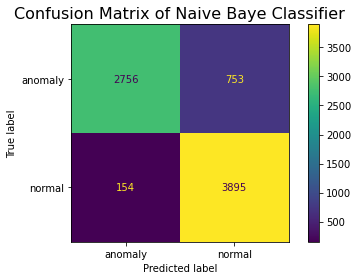

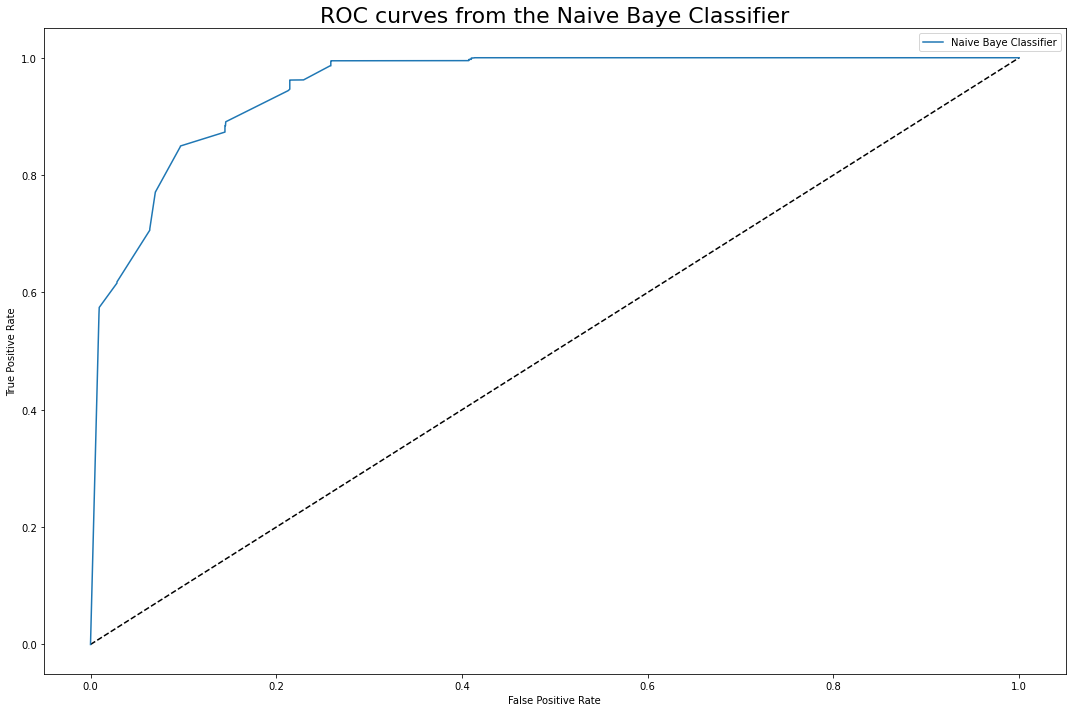

Cross Validation Mean Score:
 0.8799959704264338

Model Accuracy:
 0.8799947075946017

Mean squared error:  0.12000529240539826

Variance score: 0.52

Confusion matrix:
 [[2756  753]
 [ 154 3895]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86      3509
           1       0.84      0.96      0.90      4049

    accuracy                           0.88      7558
   macro avg       0.89      0.87      0.88      7558
weighted avg       0.89      0.88      0.88      7558

============================== Decision Tree Classifier Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

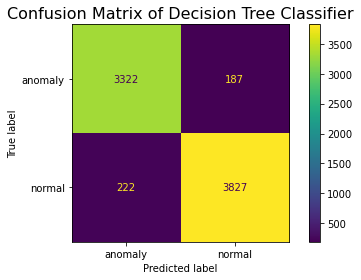

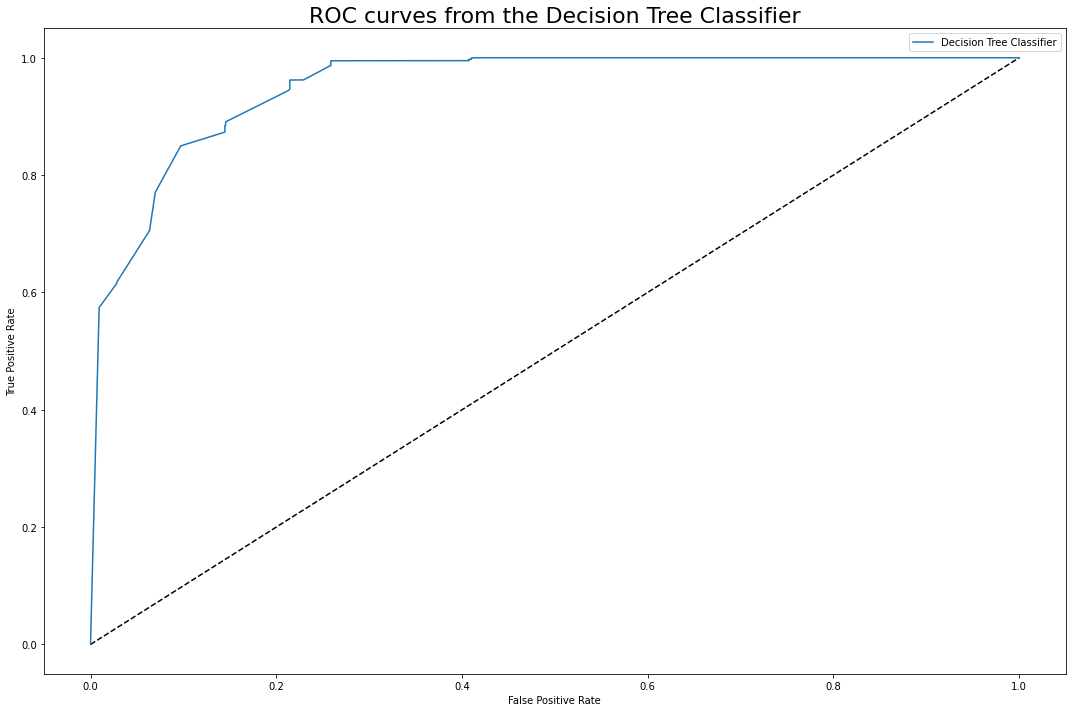

Cross Validation Mean Score:
 0.9372840674165177

Model Accuracy:
 0.945885154802858

Mean squared error:  0.0541148451971421

Variance score: 0.78

Confusion matrix:
 [[3322  187]
 [ 222 3827]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      3509
           1       0.95      0.95      0.95      4049

    accuracy                           0.95      7558
   macro avg       0.95      0.95      0.95      7558
weighted avg       0.95      0.95      0.95      7558

============================== KNeighborsClassifier Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

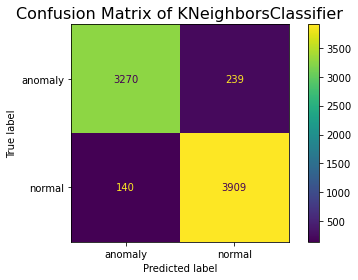

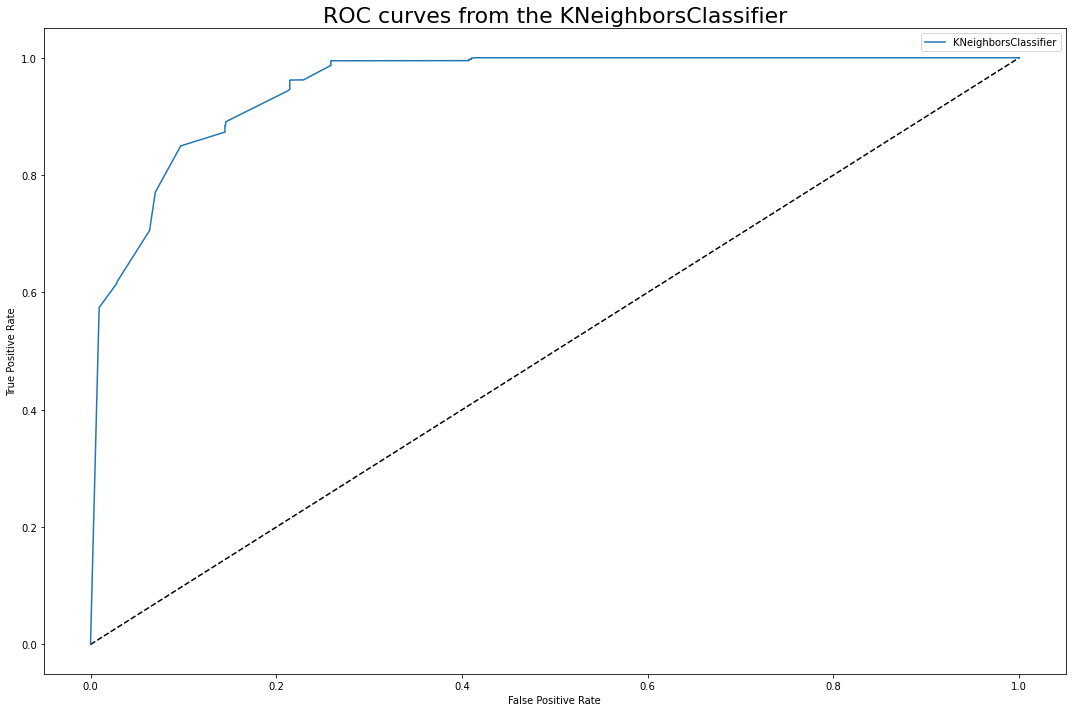

Cross Validation Mean Score:
 0.9395344966537019

Model Accuracy:
 0.9498544588515481

Mean squared error:  0.050145541148451975

Variance score: 0.80

Confusion matrix:
 [[3270  239]
 [ 140 3909]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      3509
           1       0.94      0.97      0.95      4049

    accuracy                           0.95      7558
   macro avg       0.95      0.95      0.95      7558
weighted avg       0.95      0.95      0.95      7558

============================== LogisticRegression Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

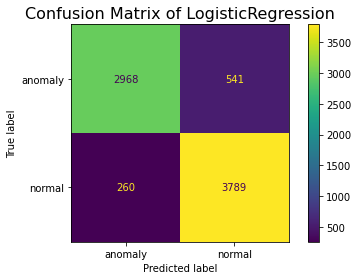

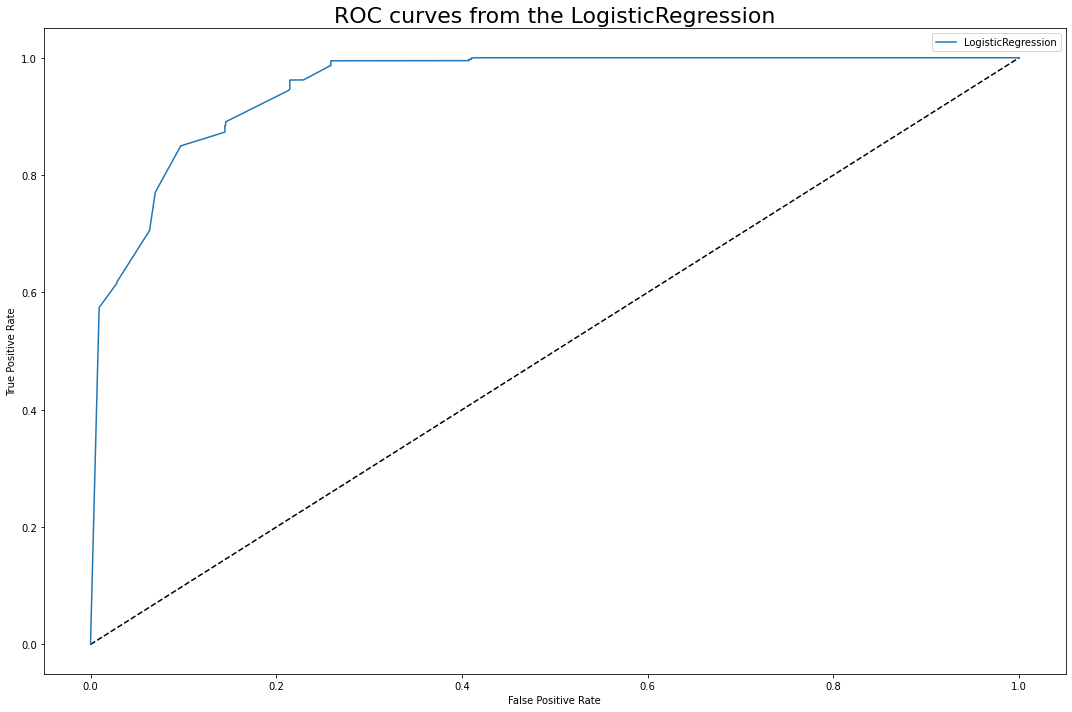

Cross Validation Mean Score:
 0.8944172886225866

Model Accuracy:
 0.8940195818999735

Mean squared error:  0.10598041810002647

Variance score: 0.57

Confusion matrix:
 [[2968  541]
 [ 260 3789]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      3509
           1       0.88      0.94      0.90      4049

    accuracy                           0.89      7558
   macro avg       0.90      0.89      0.89      7558
weighted avg       0.90      0.89      0.89      7558

============================== Basic Bagging Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

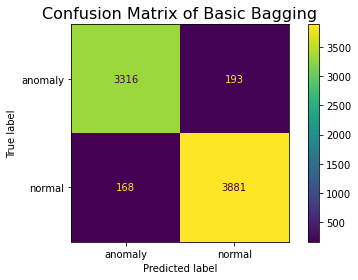

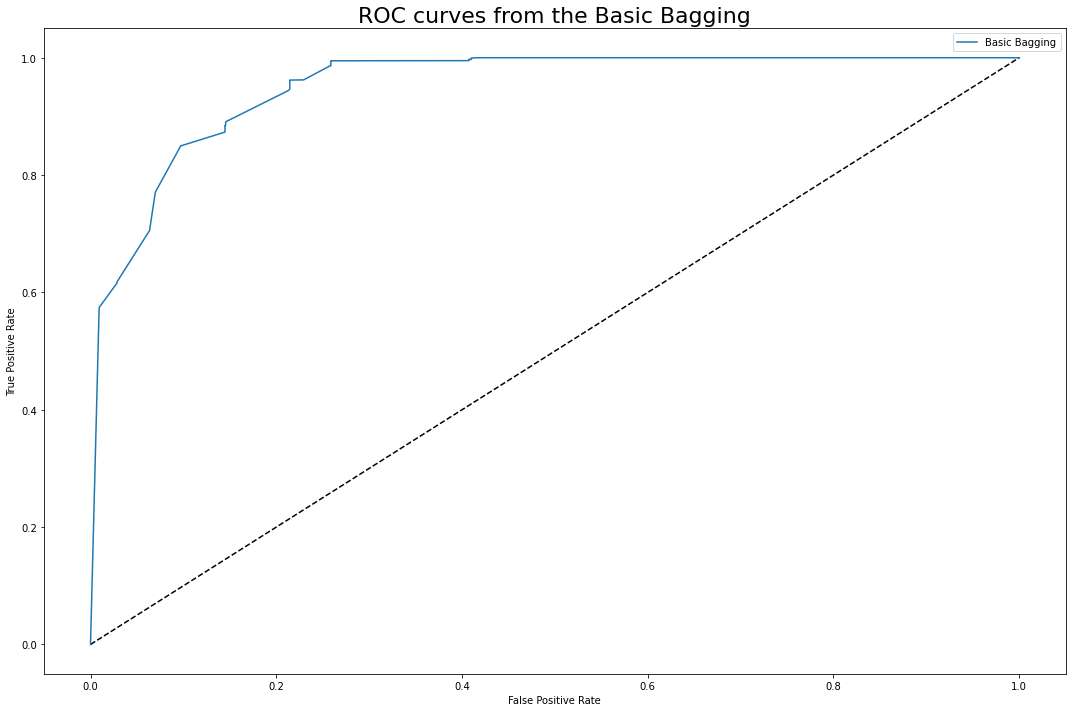

Cross Validation Mean Score:
 0.9483983321069414

Model Accuracy:
 0.9522360412807621

Mean squared error:  0.047763958719237894

Variance score: 0.81

Confusion matrix:
 [[3316  193]
 [ 168 3881]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      3509
           1       0.95      0.96      0.96      4049

    accuracy                           0.95      7558
   macro avg       0.95      0.95      0.95      7558
weighted avg       0.95      0.95      0.95      7558

============================== Genetically Optimized Random Forest Bagging Model Test Results ==============================



<Figure size 1080x1080 with 0 Axes>

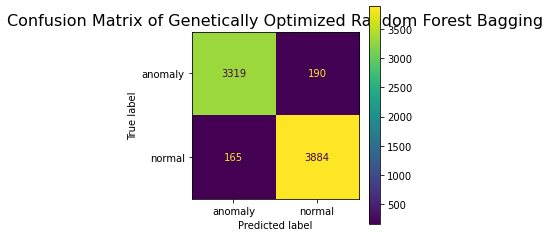

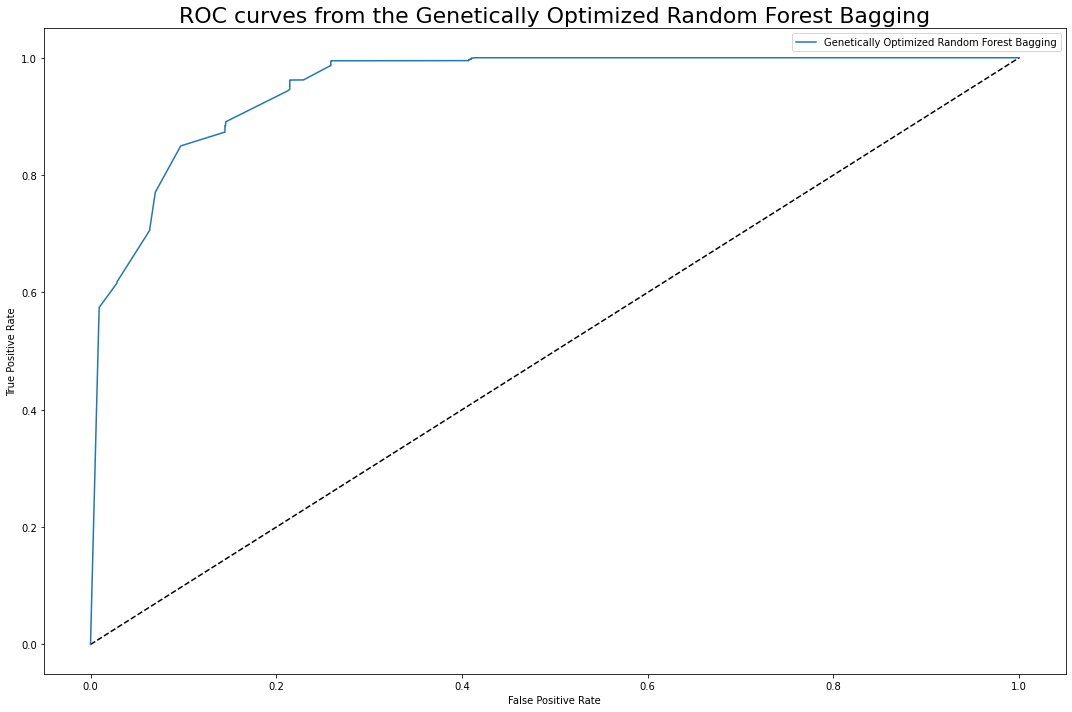

Cross Validation Mean Score:
 0.9462814043939872

Model Accuracy:
 0.9530299020905001

Mean squared error:  0.04697009790949987

Variance score: 0.81

Confusion matrix:
 [[3319  190]
 [ 165 3884]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3509
           1       0.95      0.96      0.96      4049

    accuracy                           0.95      7558
   macro avg       0.95      0.95      0.95      7558
weighted avg       0.95      0.95      0.95      7558



In [ ]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('Basic Bagging', Basicbagging))
models.append(('Genetically Optimized Random Forest Bagging', Genbagging ))
accuracy_score=list()
mse_values=list()
variance_score=list()
modelnames= list()
resultscore=pd.DataFrame(columns=['Model','Cross Validation Score','Accuracy','Mean Square Error','Mean Absolute Error','Root2 Score'])
j=0
for i, v in models:
    scores,accuracy,mse,mae,rs=mlresults(i,v, Y_test,v.predict(X_test),X_test)
    accuracy_score.append(accuracy)
    mse_values.append(mse)
    variance_score.append(rs)
    resultscore.loc[j] =[i,scores,accuracy,mse,mae,rs]
    j=j+1
    modelnames.append(i)

In [ ]:
resultscore.to_csv('/content/drive/MyDrive/NetworkTrafficData/Results/Correlation Matrix Selected Features/Resulttable.csv')
resultscore

Model  Cross Validation Score  Accuracy  Mean Square Error  Mean Absolute Error  Root2 Score
0                        Naive Baye Classifier                0.879996  0.879995           0.120005             0.120005     0.517516
1                     Decision Tree Classifier                0.937284  0.945885           0.054115             0.054115     0.782430
2                         KNeighborsClassifier                0.939534  0.949854           0.050146             0.050146     0.798389
3                           LogisticRegression                0.894417  0.894020           0.105980             0.105980     0.573903
4                                Basic Bagging                0.948398  0.952236           0.047764             0.047764     0.807964
5  Genetically Optimized Random Forest Bagging                0.946281  0.953030           0.046970             0.046970     0.811156

### Function for genesentiments the graph

In [ ]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(20, 10))

    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.ylabel('Score', size=14)
    plt.xlabel('Models', size=14)
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Correlation Matrix Selected Features/'+title+'graph.png')

### Cross Validation Score

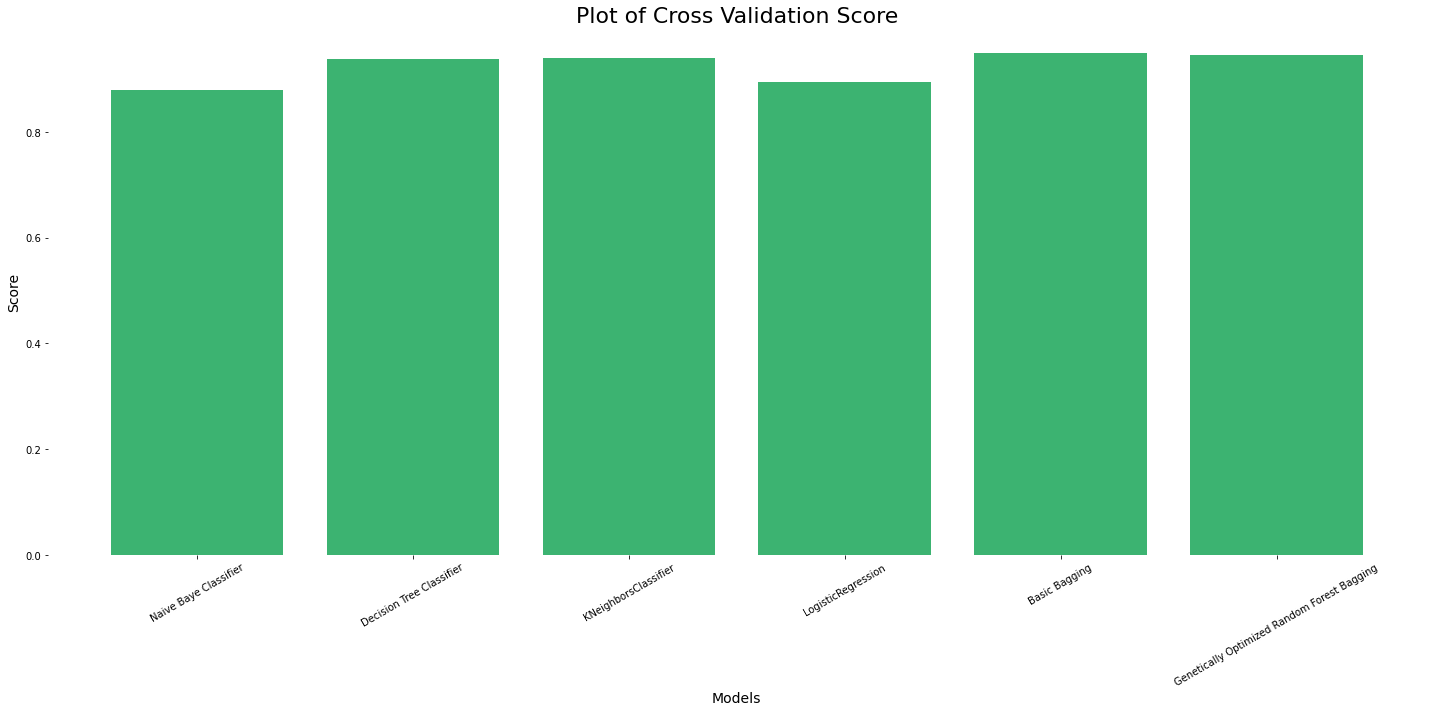

In [ ]:
ticks = modelnames
generate_plot("Plot of Cross Validation Score", ticks, resultscore['Cross Validation Score'], 1)

### Accuracy graph

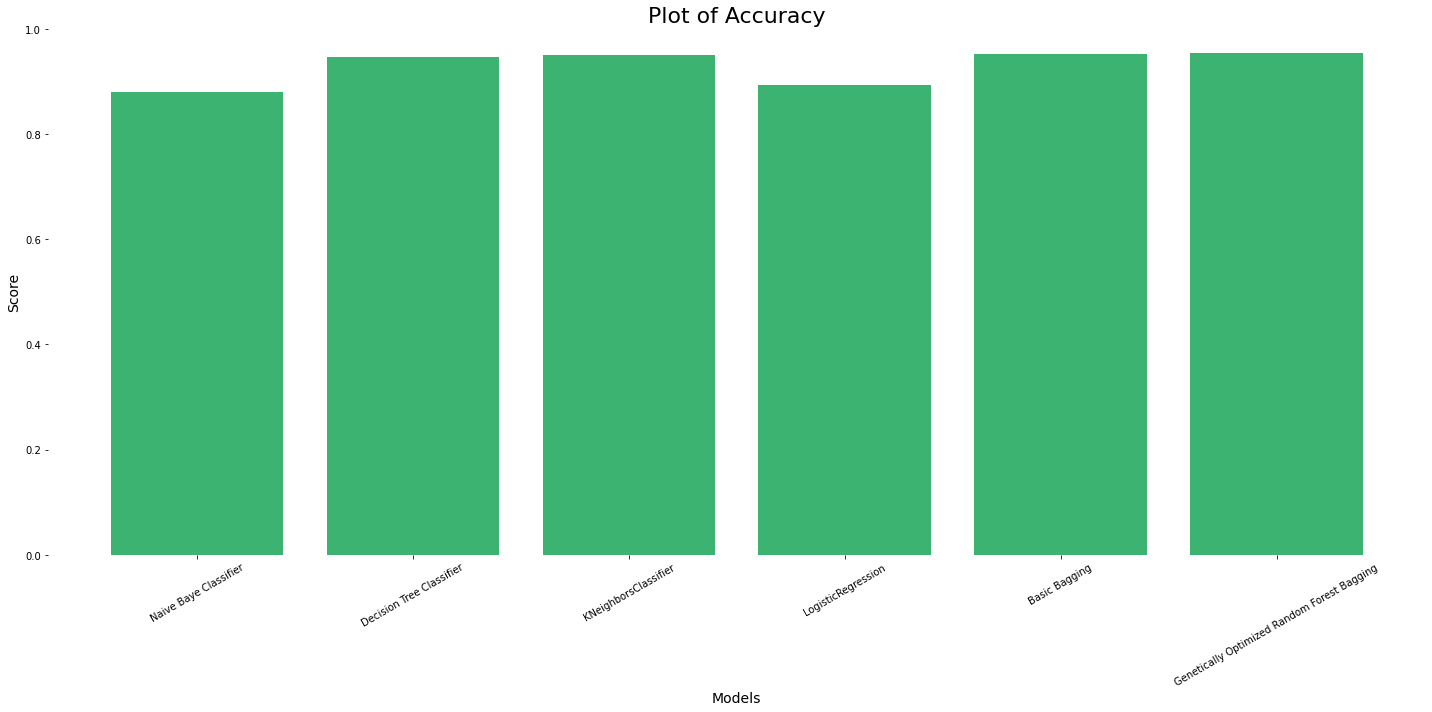

In [ ]:
ticks = modelnames
generate_plot("Plot of Accuracy", ticks, resultscore['Accuracy'], 1)

### Mean squared error graph

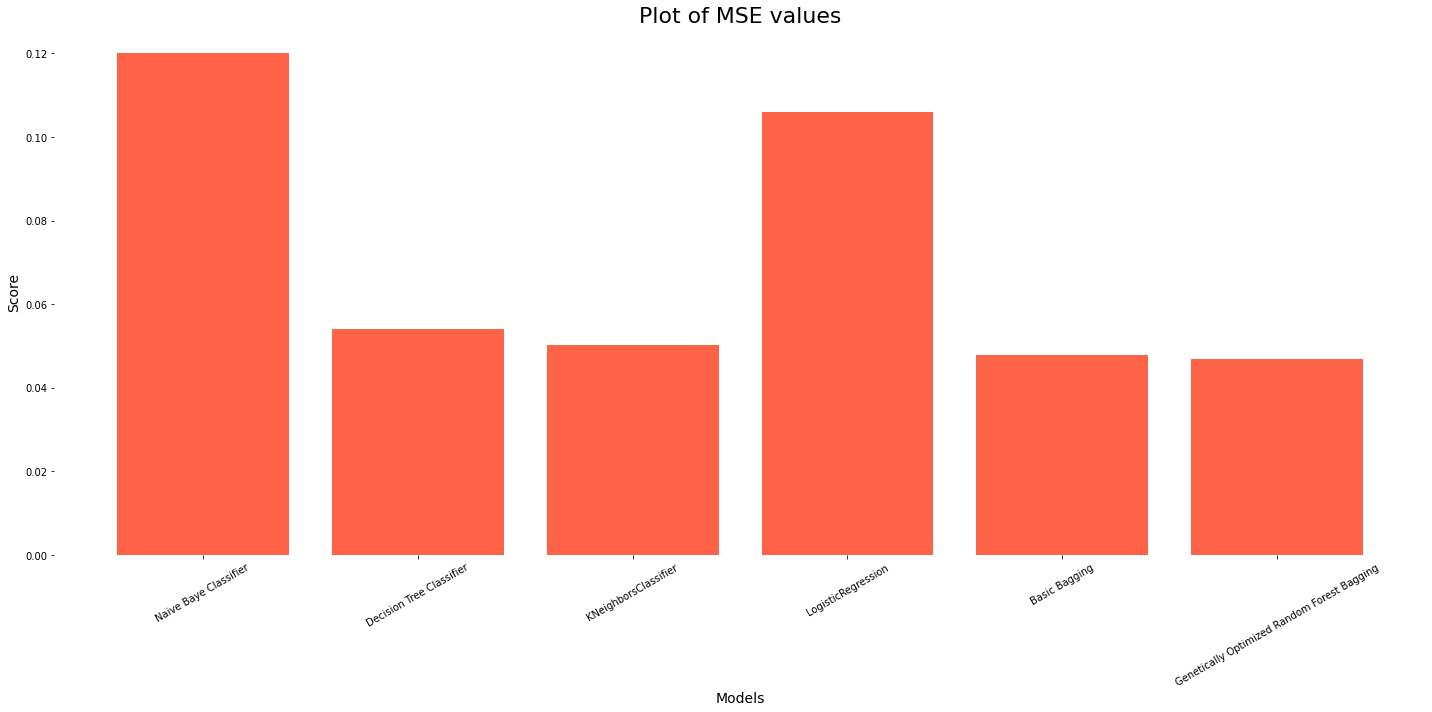

In [ ]:
ticks = modelnames
generate_plot("Plot of MSE values", ticks, resultscore['Mean Square Error'], 2)

### Mean Absolute Error graph

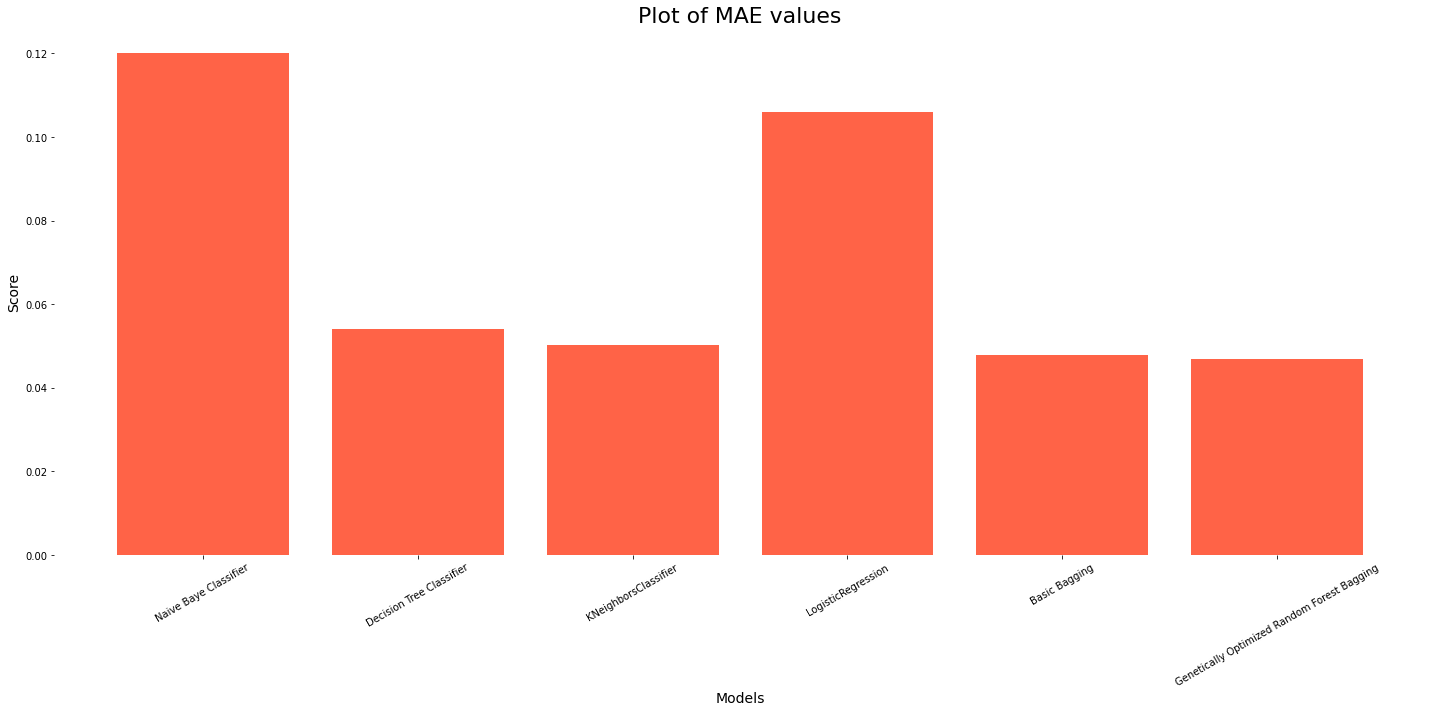

In [ ]:
ticks = modelnames
generate_plot("Plot of MAE values", ticks, resultscore['Mean Absolute Error'], 2)

### Root Square score graph

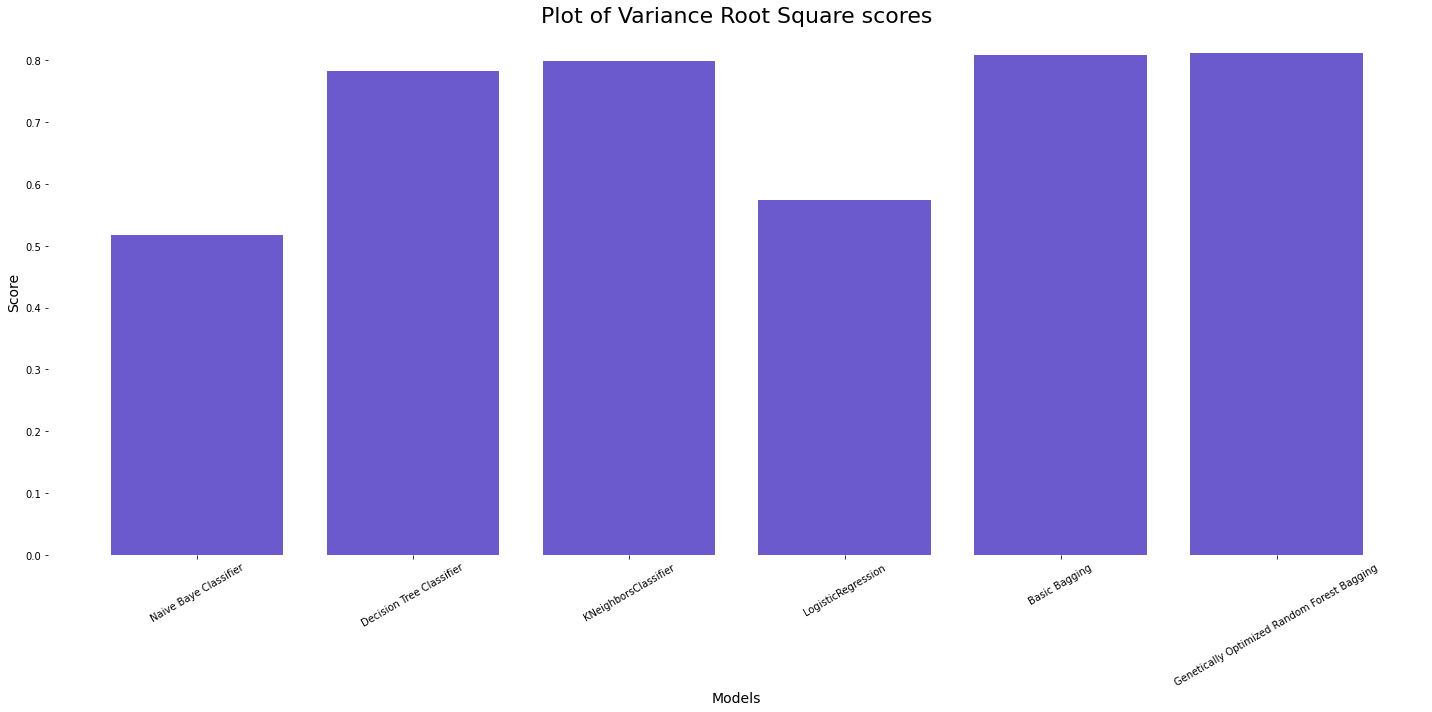

In [ ]:
ticks = modelnames
generate_plot("Plot of Variance Root Square scores", ticks, resultscore['Root2 Score'],0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
# Logistic regression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_test=le.fit_transform(Y_test)
classes= list(le.classes_)
y_pred_prob_lr = BNB_Classifier.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(Y_test, y_pred_prob_lr)

# SVM with rbf
y_pred_prob_SVMrbf = DTC_Classifier.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(Y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(Y_test, y_pred_prob_SVMrbf)

# SVM with linear
y_pred_prob_SVMlinear = KNN_Classifier.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(Y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(Y_test, y_pred_prob_SVMlinear)

# KNN
y_pred_prob_KNN = LGR_Classifier.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(Y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(Y_test, y_pred_prob_KNN)


# Decision Tree
y_pred_prob_Tree = DTC_Classifier.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(Y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(Y_test, y_pred_prob_Tree)

# Random forest
y_pred_prob_rf = KNN_Classifier.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(Y_test, y_pred_prob_rf)


# Naive Bayes

y_pred_prob_nb = Genbagging.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(Y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(Y_test, y_pred_prob_nb)


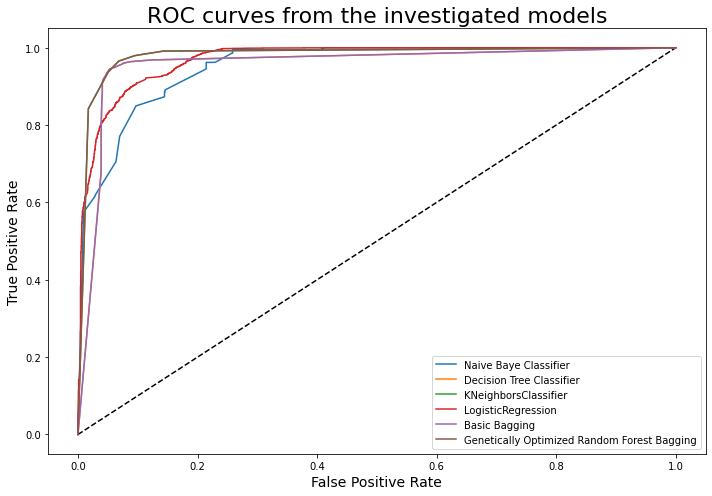

In [ ]:
ticks = ['Naive Baye Classifier','Decision Tree Classifier', 'KNeighborsClassifier','LogisticRegression','Basic Bagging','Genetically Optimized Random Forest Bagging']
# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label=ticks[0] % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label=ticks[1] % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label=ticks[2] % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label=ticks[3] % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label=ticks[4] % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label=ticks[5] % roc_auc_rf)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('ROC curves from the investigated models', fontsize = 22)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/NetworkTrafficData/Results/Correlation Matrix Selected Features/comparisonrocgraph.png')
plt.show()